Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 42

In [1]:
num_days_R_prediction=42

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

In [4]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=24 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020

### Load Data from Github - John Hopkins Institute 

In [5]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [6]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.939110   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -27.469800   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -42.882100   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.025885   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  17.189900   
238                               NaN                    Laos  19.856270   
239                               NaN                   Libya  26.335100   
240                               NaN      West Bank and Gaza  31.952200   
241                               NaN           Guinea-Bissau  11.803700   
242                               NaN                    Mali  17.570692   
243                               NaN   Saint Kitts and Nevis  17.357822   
244             Northwest Territories                  Canada  64.825500   
245                             Yukon                  Canada  64.282300   
246                               NaN                  Kosovo  42.602636   
247                               NaN                   Burma  21.916200   
248                          Anguilla          United Kingdom  18.220600   
249            British Virgin Islands          United Kingdom  18.420700   
250          Turks and Caicos Islands          United Kingdom  21.694000   
251                               NaN              MS Zaandam   0.000000   
252                               NaN                Botswana -22.328500   
253                               NaN                 Burundi  -3.373100   
254                               NaN            Sierra Leone   8.460555   
255  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
256                               NaN                  Malawi -13.25430

## Get Population

In [7]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [8]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.939110   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -27.469800   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -42.882100   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.025885   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  17.189900   
240                               NaN                    Laos  19.856270   
241                               NaN                   Libya  26.335100   
242                               NaN      West Bank and Gaza  31.952200   
243                               NaN           Guinea-Bissau  11.803700   
244                               NaN                    Mali  17.570692   
245                               NaN   Saint Kitts and Nevis  17.357822   
246             Northwest Territories                  Canada  64.825500   
247                             Yukon                  Canada  64.282300   
248                               NaN                  Kosovo  42.602636   
249                               NaN                   Burma  21.916200   
250                          Anguilla          United Kingdom  18.220600   
251            British Virgin Islands          United Kingdom  18.420700   
252          Turks and Caicos Islands          United Kingdom  21.694000   
253                               NaN              MS Zaandam   0.000000   
254                               NaN                Botswana -22.328500   
255                               NaN                 Burundi  -3.373100   
256                               NaN            Sierra Leone   8.460555   
257  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
258                               NaN                  Malawi -13.25430

In [9]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region        Lat        Long  \
185            NaN                            Poland  51.919400   19.145100   
186            NaN                          Portugal  39.399900   -8.224500   
187            NaN                             Qatar  25.354800   51.183900   
188            NaN                           Romania  45.943200   24.966800   
189            NaN                            Russia  61.524010  105.318756   
190            NaN                            Rwanda  -1.940300   29.873900   
191            NaN                       Saint Lucia  13.909400  -60.978900   
192            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
193            NaN                        San Marino  43.942400   12.457800   
194            NaN                      Saudi Arabia  23.885942   45.079162   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  8/3/20  \
185        0        0        0        0        0        0  ...    1732   
186        0        0        0        0        0        0  ...    1738   
187        0        0        0        0        0        0  ...     177   
188        0        0        0        0        0        0  ...    2432   
189        0        0        0        0        0        0  ...   14183   
190        0        0        0        0        0        0  ...       5   
191        0        0        0        0        0        0  ...       0   
192        0        0        0        0        0        0  ...       0   
193        0        0        0        0        0        0  ...      42   
194        0        0        0        0        0        0  ...    2949   

     8/4/20  8/5/20  8/6/20  8/7/20  8/8/20  8/9/20  8/10/20   Population   \
185    1738    1756    1774    1787    1800    1807     1809    37,980,000   
186    1739    1740    1743    1746    1750    1756     1759    10,290,000   
187     177     178     178     180     182     184      188     2,870,256   
188    2480    2521    2566    2616    2659    2700     2729    19,530,000   
189   14327   14465   14579   14698   14827   14903    14973   144,500,000   
190       5       5       5       5       6       7        7           NaN   
191       0       0       0       0       0       0        0           NaN   
192       0       0       0       0       0       0        0           NaN   
193      42      42      42      42      42      42       42        33,916   
194    2984    3020    3055    3093    3130    3167     3199    34,695,447   

                                   region  
185                            Poland_nan  
186                          Portugal_nan  
187                             Qatar_nan  
188                           Romania_nan  
189                            Russia_nan  
190                            Rwanda_nan  
191                       Saint Lucia_nan  
192  Saint Vincent and the Grenadines_nan  
193                        San Marino_nan  
194                      Saudi Arabia_nan  

[10 rows x 208 columns]

In [10]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
175            NaN              Oman  21.512583   55.923255        0        0   
176            NaN          Pakistan  30.375300   69.345100        0        0   
177            NaN            Panama   8.538000  -80.782100        0        0   
178            NaN  Papua New Guinea  -6.314993  143.955550        0        0   
179            NaN          Paraguay -23.442500  -58.443800        0        0   
180            NaN              Peru  -9.190000  -75.015200        0        0   
181            NaN       Philippines  12.879721  121.774017        0        0   
182            NaN            Poland  51.919400   19.145100        0        0   
183            NaN          Portugal  39.399900   -8.224500        0        0   
184            NaN             Qatar  25.354800   51.183900        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  8/3/20  8/4/20  8/5/20  8/6/20  \
175        0        0        0        0  ...   61421   61421   69803   70910   
176        0        0        0        0  ...  249397  249397  254286  256058   
177        0        0        0        0  ...   42093   43330   44792   45658   
178        0        0        0        0  ...      34      34      44      53   
179        0        0        0        0  ...    4249    4645    4839    4974   
180        0        0        0        0  ...  298091  302457  306430  310337   
181        0        0        0        0  ...   65821   66049   66270   66837   
182        0        0        0        0  ...   34881   35056   35321   35642   
183        0        0        0        0  ...   37111   37318   37565   37840   
184        0        0        0        0  ...  108002  108254  108539  108831   

     8/7/20  8/8/20  8/9/20  8/10/20   Population                 region  
175   72263   73481   74691    76124     4,636,000              Oman_nan  
176  258099  259604  260248   260764   197,000,000          Pakistan_nan  
177   46675   47484   48748    49510     4,299,739            Panama_nan  
178      53      53      53       53           NaN  Papua New Guinea_nan  
179    5123    5181    5222     5276     7,111,652          Paraguay_nan  
180  314332  319171  324020   324020    32,870,710              Peru_nan  
181   66852   67117   67673    68159   104,900,000       Philippines_nan  
182   36041   36403   36691    36877    37,980,000            Poland_nan  
183   38087   38364   38511    38600    10,290,000          Portugal_nan  
184  109142  109438  109709   109993     2,870,256             Qatar_nan  

[10 rows x 208 columns]

In [11]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region        Lat        Long  \
185            NaN                            Poland  51.919400   19.145100   
186            NaN                          Portugal  39.399900   -8.224500   
187            NaN                             Qatar  25.354800   51.183900   
188            NaN                           Romania  45.943200   24.966800   
189            NaN                            Russia  61.524010  105.318756   
190            NaN                            Rwanda  -1.940300   29.873900   
191            NaN                       Saint Lucia  13.909400  -60.978900   
192            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
193            NaN                        San Marino  43.942400   12.457800   
194            NaN                      Saudi Arabia  23.885942   45.079162   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  8/3/20  \
185        0        0        0        0        0        0  ...   47469   
186        0        0        0        0        0        0  ...   51569   
187        0        0        0        0        0        0  ...  111322   
188        0        0        0        0        0        0  ...   54009   
189        0        0        0        0        0        0  ...  854641   
190        0        0        0        0        0        0  ...    2092   
191        0        0        0        0        0        0  ...      25   
192        0        0        0        0        0        0  ...      55   
193        0        0        0        0        0        0  ...     699   
194        0        0        0        0        0        0  ...  280093   

     8/4/20  8/5/20  8/6/20  8/7/20  8/8/20  8/9/20  8/10/20   Population   \
185   48149   48789   49515   50324   51167   51791    52410    37,980,000   
186   51681   51848   52061   52351   52537   52668    52825    10,290,000   
187  111538  111805  112092  112383  112650  112947   113262     2,870,256   
188   55241   56550   57895   59273   60623   61768    62547    19,530,000   
189  859762  864948  870187  875378  880563  885718   890799   144,500,000   
190    2099    2104    2111    2128    2134    2140     2152           NaN   
191      25      25      25      25      25      25       25           NaN   
192      55      56      56      56      56      57       57           NaN   
193     699     699     699     699     699     699      699        33,916   
194  281456  282824  284226  285793  287262  288690   289947    34,695,447   

                                   region  
185                            Poland_nan  
186                          Portugal_nan  
187                             Qatar_nan  
188                           Romania_nan  
189                            Russia_nan  
190                            Rwanda_nan  
191                       Saint Lucia_nan  
192  Saint Vincent and the Grenadines_nan  
193                        San Marino_nan  
194                      Saudi Arabia_nan  

[10 rows x 208 columns]

In [12]:
confirmed.iloc[220:230,:]

Province/State  Country/Region        Lat        Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.313300  -81.254600        0        0   
221  Channel Islands  United Kingdom  49.372300   -2.364400        0        0   
222        Gibraltar  United Kingdom  36.140800   -5.353600        0        0   
223      Isle of Man  United Kingdom  54.236100   -4.548100        0        0   
224       Montserrat  United Kingdom  16.742498  -62.187366        0        0   
225              NaN  United Kingdom  55.378100   -3.436000        0        0   
226              NaN         Uruguay -32.522800  -55.765800        0        0   
227              NaN   United States  40.000000 -100.000000        1        1   
228              NaN      Uzbekistan  41.377491   64.585262        0        0   
229              NaN       Venezuela   6.423800  -66.589700        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   8/3/20   8/4/20   8/5/20  \
220        0        0        0        0  ...      203      203      203   
221        0        0        0        0  ...      591      595      596   
222        0        0        0        0  ...      188      189      189   
223        0        0        0        0  ...      336      336      336   
224        0        0        0        0  ...       13       13       13   
225        0        0        0        0  ...   305623   306293   307184   
226        0        0        0        0  ...     1291     1300     1309   
227        2        2        5        5  ...  4713540  4771080  4823890   
228        0        0        0        0  ...    26066    27047    27793   
229        0        0        0        0  ...    20754    21438    22299   

      8/6/20   8/7/20   8/8/20   8/9/20  8/10/20   Population   \
220      203      203      203      203      203           NaN   
221      597      597      597      597      599       173,519   
222      190      190      197      201      201        33,693   
223      336      336      336      336      336        84,939   
224       13       13       13       13       13         4,991   
225   308134   309005   309763   310825   311641    66,440,000   
226     1318     1325     1335     1353     1364     3,471,150   
227  4883582  4941755  4997929  5044864  5094400   327,200,000   
228    28315    29057    29652    30609    31304    33,363,556   
229    23280    24166    24961    25805    26800           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 208 columns]

## Create Time Series + Plots

In [13]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [14]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [15]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

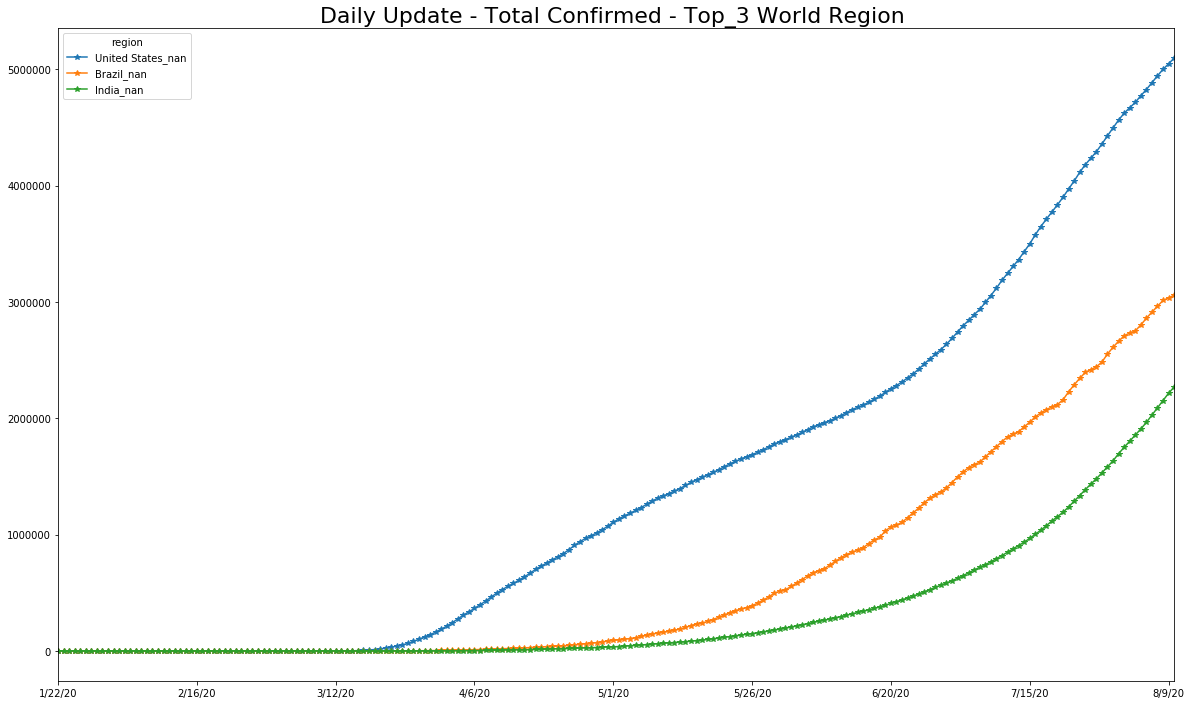

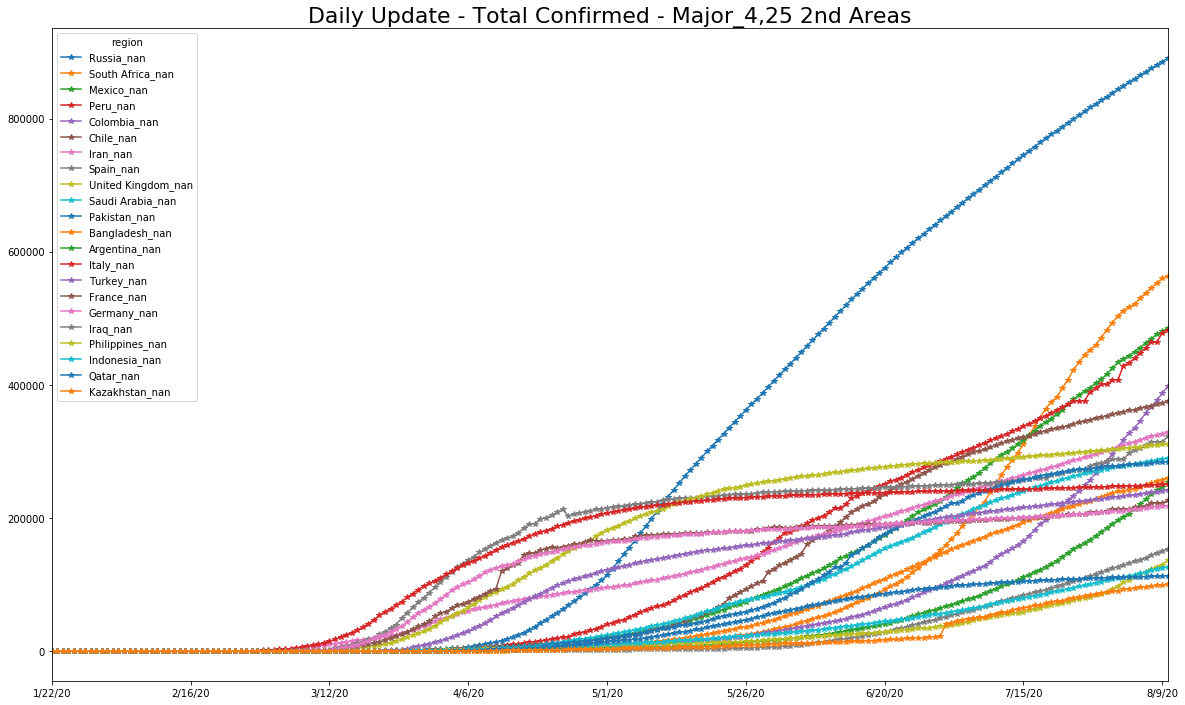

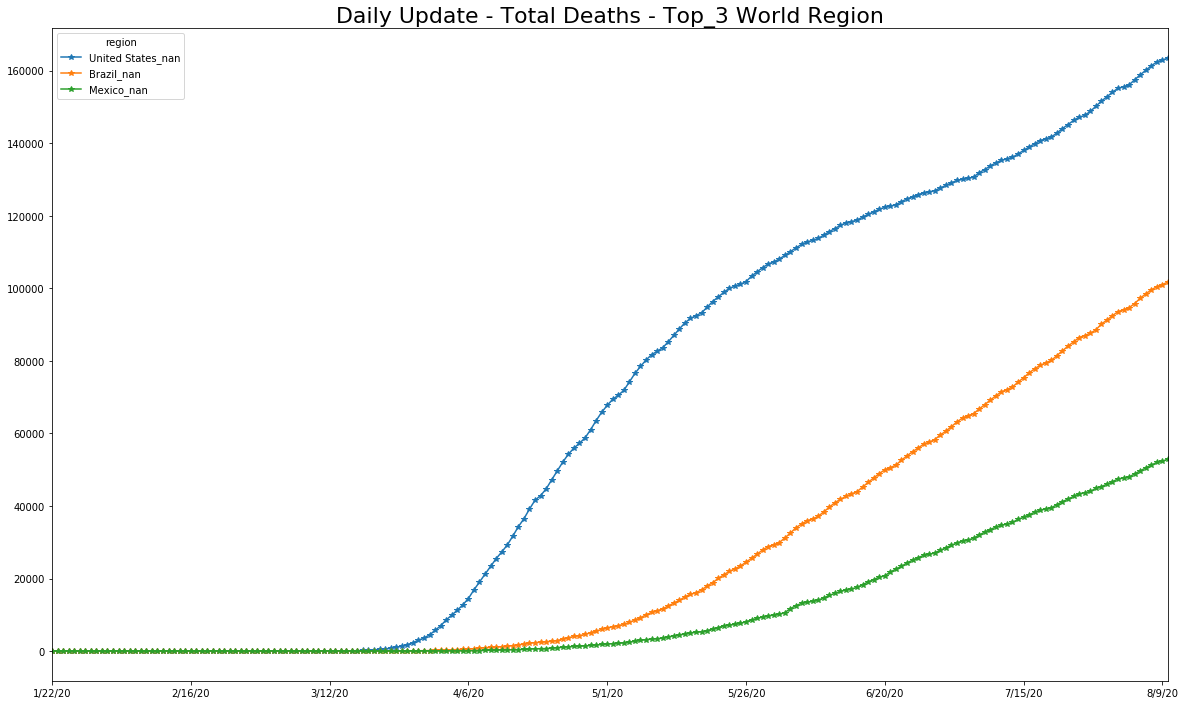

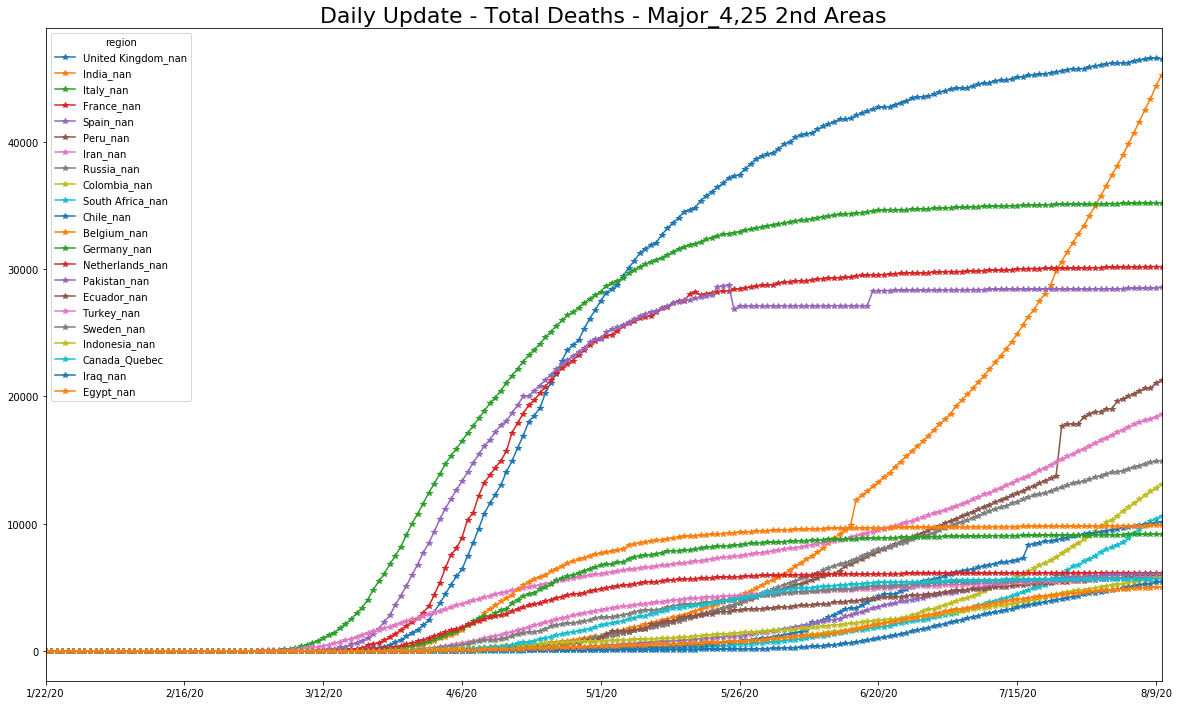

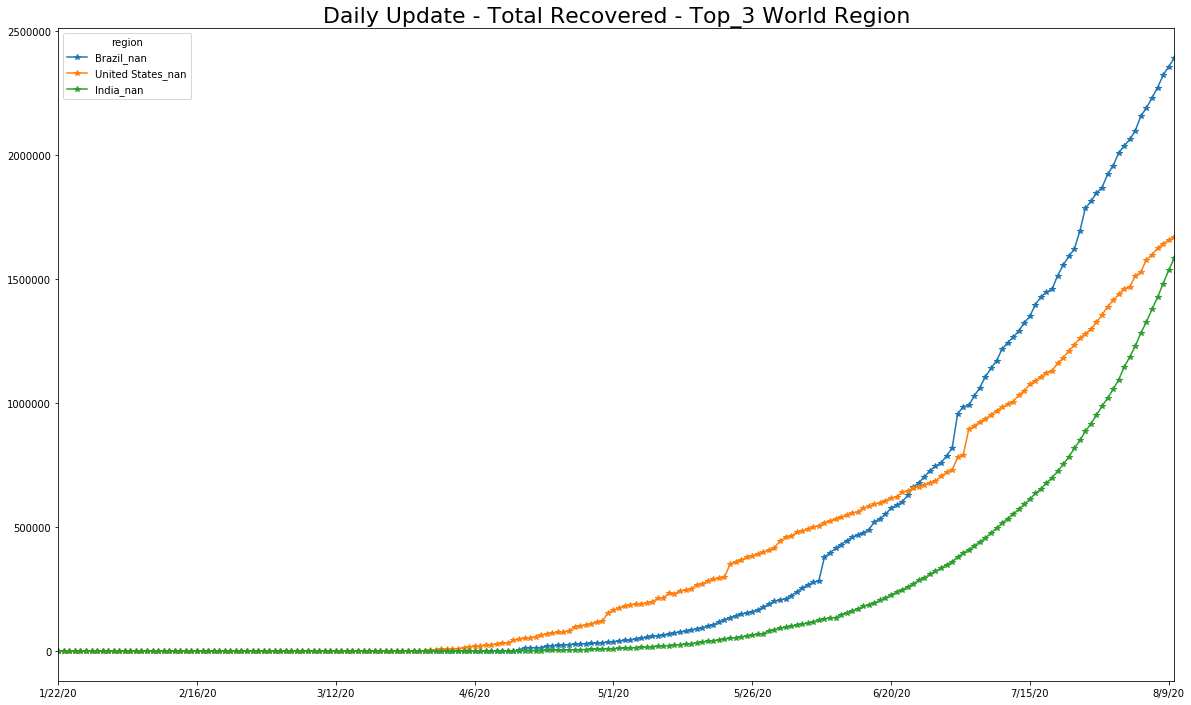

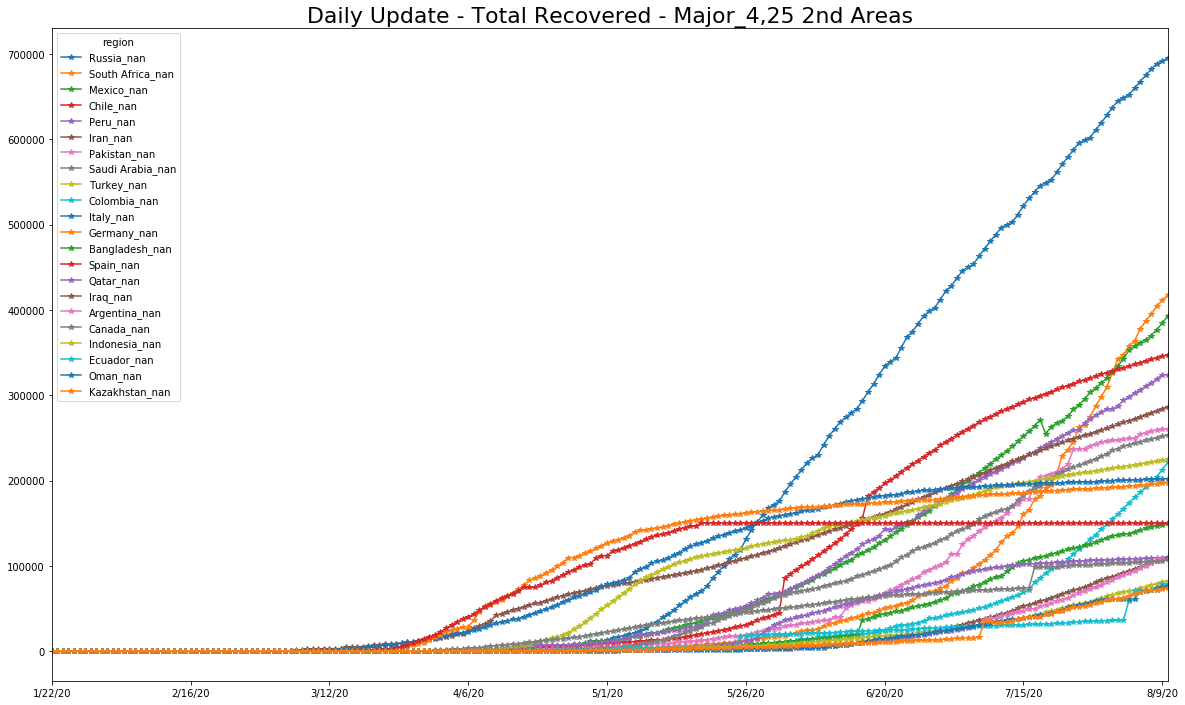

In [16]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [17]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [18]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [19]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/08/11


In [20]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [21]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [22]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!

ts=ts[15:]
ts_d=ts_d[15:]
ts_rec=ts_rec[15:]

In [23]:
ts[:3]

region  Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/6/20                0            0            0            0           0   
2/7/20                0            0            0            0           0   
2/8/20                0            0            0            0           0   

region  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/6/20                        0              0            0   
2/7/20                        0              0            0   
2/8/20                        0              0            0   

region  Australia_Australian Capital Territory  Australia_New South Wales  \
2/6/20                                       0                          4   
2/7/20                                       0                          4   
2/8/20                                       0                          4   

region  ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
2/6/20  ...                 11            0               0              0   
2/7/20  ...                 11            0               0              0   
2/8/20  ...                 11            0               0              0   

region  Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
2/6/20           10                       0                   0          0   
2/7/20           10                       0                   0          0   
2/8/20           13                       0                   0          0   

region  Zambia_nan  Zimbabwe_nan  
2/6/20           0             0  
2/7/20           0             0  
2/8/20           0             0  

[3 rows x 266 columns]

In [24]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
8/7/20             37015         6151        34155          955        1538   
8/8/20             37054         6275        34693          955        1572   
8/9/20             37054         6411        35160          955        1672   
8/10/20            37162         6536        35712          963        1679   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
8/7/20                        92         235677        39985   
8/8/20                        92         241811        40185   
8/9/20                        92         246499        40410   
8/10/20                       92         253868        40433   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
8/7/20                                      113                       3851   
8/8/20                                      113                       3861   
8/9/20                                      113                       3875   
8/10/20                                     113                       3897   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
8/7/20   ...            4941755         1325           29057          24166   
8/8/20   ...            4997929         1335           29652          24961   
8/9/20   ...            5044864         1353           30609          25805   
8/10/20  ...            5094400         1364           31304          26800   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
8/7/20           789                   13722                  10       1796   
8/8/20           812                   13928                  10       1797   
8/9/20           841                   14208                  10       1804   
8/10/20          847                   14510                  10       1832   

region   Zambia_nan  Zimbabwe_nan  
8/7/20         7486          4451  
8/8/20         7903          4575  
8/9/20         8085          4649  
8/10/20        8210          4748  

[4 rows x 266 columns]

In [25]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [26]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [30]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [31]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [32]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [33]:
w_in_model.tail(2)

date       region   min   max
6899 2020-05-10  Vietnam_nan  26.9  33.0
6900 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [34]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [35]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [36]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
19    2020-02-25  Afghanistan_nan          1             1             1   
20    2020-02-26  Afghanistan_nan          1             0             1   
21    2020-02-27  Afghanistan_nan          1             0             1   
22    2020-02-28  Afghanistan_nan          1             0             0   
23    2020-02-29  Afghanistan_nan          1             0             0   
24    2020-03-01  Afghanistan_nan          1             0             0   
25    2020-03-02  Afghanistan_nan          1             0             0   
26    2020-03-03  Afghanistan_nan          1             0             0   
27    2020-03-04  Afghanistan_nan          1             0             0   
28    2020-03-05  Afghanistan_nan          1             0             0   
29    2020-03-06  Afghanistan_nan          1             0             0   
30    2020-03-07  Afghanistan_nan          1             0             0   
31    2020-03-08  Afghanistan_nan          4             0             0   
32    2020-03-09  Afghanistan_nan          4             3             3   
33    2020-03-10  Afghanistan_nan          5             0             3   
34    2020-03-11  Afghanistan_nan          7             1             4   
35    2020-03-12  Afghanistan_nan          7             2             3   
36    2020-03-13  Afghanistan_nan          7             0             3   
37    2020-03-14  Afghanistan_nan         11             0             2   
38    2020-03-15  Afghanistan_nan         16             4             4   
39    2020-03-16  Afghanistan_nan         21             5             9   
40    2020-03-17  Afghanistan_nan         22             5            14   
41    2020-03-18  Afghanistan_nan         22             1            11   
42    2020-03-19  Afghanistan_nan         22             0             6   
43    2020-03-20  Afghanistan_nan         24             0             1   
44    2020-03-21  Afghanistan_nan         24             2             2   
45    2020-03-22  Afghanistan_nan         40             0             2   
46    2020-03-23  Afghanistan_nan         40            16            18   
47    2020-03-24  Afghanistan_nan         74             0            16   
48    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
50354 2020-07-13     Zimbabwe_nan       1034             3           100   
50355 2020-07-14     Zimbabwe_nan       1064            49            92   
50356 2020-07-15     Zimbabwe_nan       1089            30            82   
50357 2020-07-16     Zimbabwe_nan       1362            25           104   
50358 2020-07-17     Zimbabwe_nan       1420           273           328   
50359 2020-07-18     Zimbabwe_nan       1478            58           356   
50360 2020-07-19     Zimbabwe_nan       1611            58           389   
50361 2020-07-20     Zimbabwe_nan       1713           133           249   
50362 2020-07-21     Zimbabwe_nan       1820           102           293   
50363 2020-07-22     Zimbabwe_nan       2034           107           342   
50364 2020-07-23     Zimbabwe_nan       2124           214           423   
50365 2020-07-24     Zimbabwe_nan       2296            90           411   
50366 2020-07-25     Zimbabwe_nan       2434           172           476   
50367 2020-07-26     Zimbabwe_nan       2512           138           400   
50368 2020-07-27     Zimbabwe_nan       2704            78           388   
50369 2020-07-28     Zimbabwe_nan       2817           192           408   
50370 2020-07-29     Zimbabwe_nan       2879           113           383   
50371 2020-07-30     Zimbabwe_nan       3092            62           367   
50372 2020-07-31     Zimbabwe_nan       3169           213           388   
50373 2020-08-01     Zimbabwe_nan       3659            77           352   
50374 2020-08-02     Zimbabwe_nan       3921           490  

In [37]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [38]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
50383 2020-08-11  Zimbabwe_nan          0            99           297   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
50383           673         102.129705         106.672882         116.515583   

       last_day  kalman_prediction  population  infected_rate  min  max  
50383      4748             4878.0    14862924       0.000003  NaN  NaN

In [39]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=ratiod['infected_rate']*1000
ratiod['delta : new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : new_cases per 1M hab']=ratiod['delta : new_cases']/ratiod['population']*1000000
ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})

ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)

ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
50381  2020-08-09  Zimbabwe_nan       4649           124           354   
50382  2020-08-10  Zimbabwe_nan       4748            74           310   
50383  2020-08-11  Zimbabwe_nan          0            99           297   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
50381           916         102.786115         108.386875         125.034436   
50382           728         101.617705         107.144734         118.566947   
50383           673         102.129705         106.672882         116.515583   

       confirmed_yesterday  confirmed_prediction  population  infected_rate  \
50381                 4575                4745.0    14862924       0.000003   
50382                 4649                4808.0    14862924       0.000003   
50383                 4748                4878.0    14862924       0.000003   

       min  max  population_percentage : infected_rate confirmed  \
50381  NaN  NaN                                         0.000308   
50382  NaN  NaN                                         0.000313   
50383  NaN  NaN                                         0.000320   

       population_percentage : factor 9/10 infected_rate confirmed  \
50381                                           0.003079             
50382                                           0.003129             
50383                                           0.003195             

       delta : new_cases  delta : new_cases per 1M hab  
50381              170.0                     11.437857  
50382              159.0                     10.697760  
50383              130.0                      8.746597

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse           mae
256  United States_nan  1.419898e+11  376815.297022  32893.721925


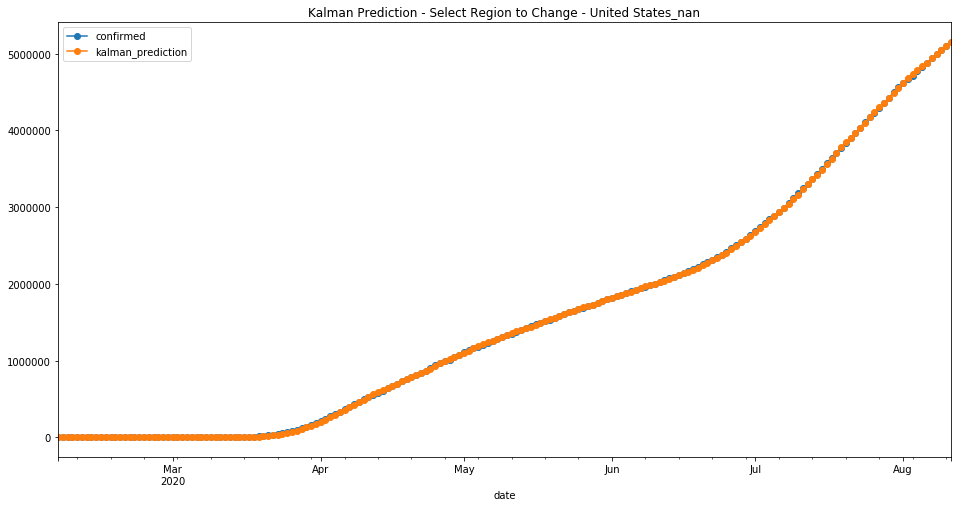

In [40]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
208  Russia_nan  4.294996e+09  65536.215592  5437.449198


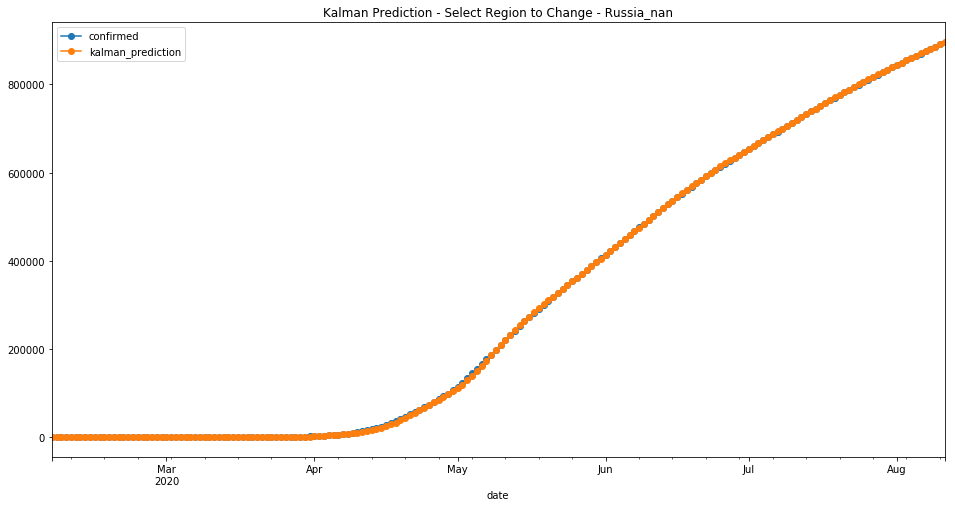

In [41]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse          mae
30  Brazil_nan  5.201529e+10  228068.604166  22936.68984


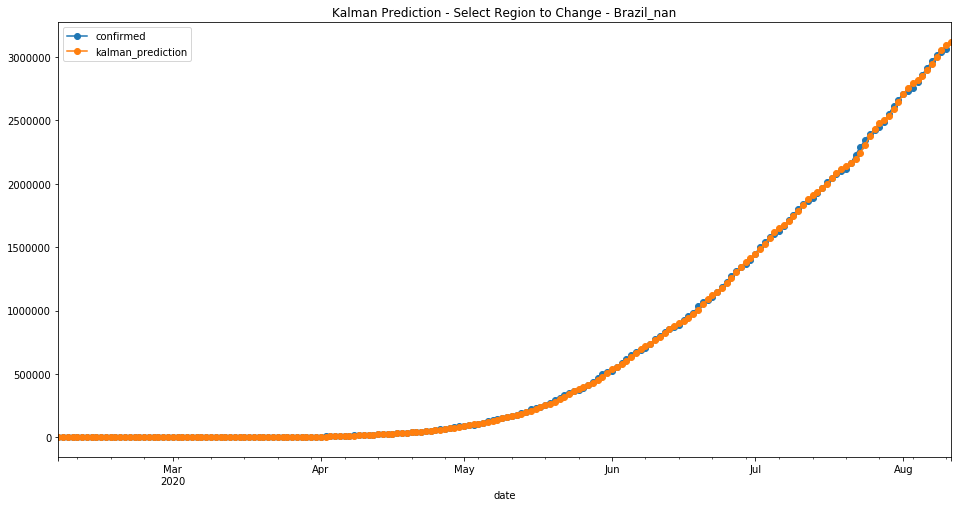

In [42]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse          rmse          mae
255  United Kingdom_nan  5.228620e+08  22866.176427  2176.037433


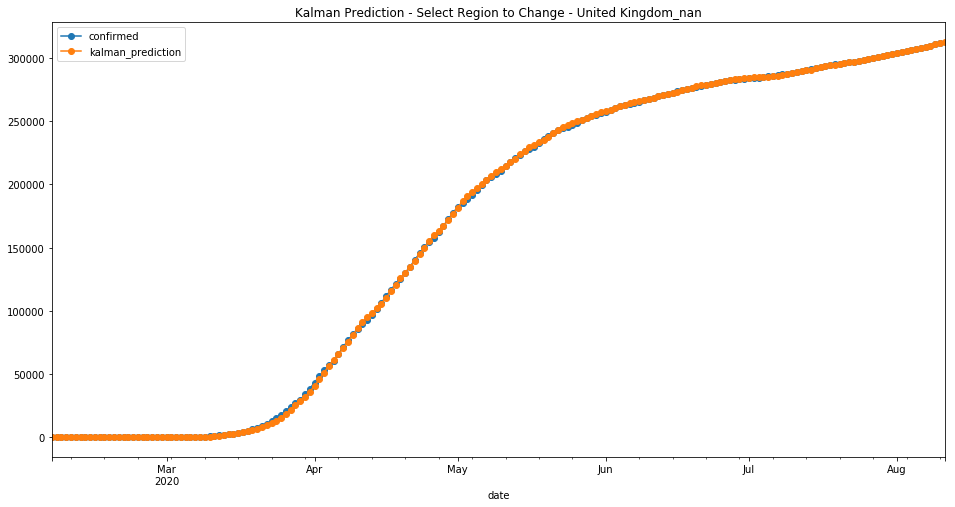

In [43]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [44]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='5G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9kjllo1c
  JVM stdout: /tmp/tmp9kjllo1c/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9kjllo1c/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 9 months and 15 days !!!
H2O cluster name:           H2O_from_python_unknownUser_go4iqx
H2O cluster total nodes:    1
H2O cluster free memory:    5 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [45]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-07-18
last_train_date= 2020-08-10
first_bootstrap_date= 2020-08-02
boost_bootstrap_date= 2020-08-07
first_test_date= 2020-08-01
last_test_date= 2020-08-11
first_valid_date= 2020-08-09


In [46]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [47]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [48]:
pred2.iloc[:25]

0  confirmed       date           region
0   36771.0      36710 2020-08-02  Afghanistan_nan
1   36734.0      36747 2020-08-03  Afghanistan_nan
2   36800.0      36782 2020-08-04  Afghanistan_nan
3   36826.0      36829 2020-08-05  Afghanistan_nan
4   36862.0      36896 2020-08-06  Afghanistan_nan
5   36939.0      37015 2020-08-07  Afghanistan_nan
6   37066.0      37054 2020-08-08  Afghanistan_nan
7   37065.0      37054 2020-08-09  Afghanistan_nan
8   37053.0      37162 2020-08-10  Afghanistan_nan
9   37238.0          0 2020-08-11  Afghanistan_nan
10   5521.0       5519 2020-08-02      Albania_nan
11   5640.0       5620 2020-08-03      Albania_nan
12   5720.0       5750 2020-08-04      Albania_nan
13   5864.0       5889 2020-08-05      Albania_nan
14   6012.0       6016 2020-08-06      Albania_nan
15   6133.0       6151 2020-08-07      Albania_nan
16   6282.0       6275 2020-08-08      Albania_nan
17   6402.0       6411 2020-08-09      Albania_nan
18   6543.0       6536 2020-08-10      Albania_nan
19   6669.0          0 2020-08-11      Albania_nan
20  31574.0      31465 2020-08-02      Algeria_nan
21  32072.0      31972 2020-08-03      Algeria_nan
22  32566.0      32504 2020-08-04      Algeria_nan
23  33099.0      33055 2020-08-05      Algeria_nan
24  33647.0      33626 2020-08-06      Algeria_nan

In [49]:
pred2.iloc[175:195]

0  confirmed       date          region
175  33428.0      33376 2020-08-07  Azerbaijan_nan
176  33537.0      33481 2020-08-08  Azerbaijan_nan
177  33622.0      33568 2020-08-09  Azerbaijan_nan
178  33679.0      33647 2020-08-10  Azerbaijan_nan
179  33740.0          0 2020-08-11  Azerbaijan_nan
180    639.0        648 2020-08-02     Bahamas_nan
181    702.0        679 2020-08-03     Bahamas_nan
182    729.0        715 2020-08-04     Bahamas_nan
183    756.0        751 2020-08-05     Bahamas_nan
184    796.0        761 2020-08-06     Bahamas_nan
185    794.0        830 2020-08-07     Bahamas_nan
186    888.0        878 2020-08-08     Bahamas_nan
187    931.0        898 2020-08-09     Bahamas_nan
188    925.0        945 2020-08-10     Bahamas_nan
189    993.0          0 2020-08-11     Bahamas_nan
190  41412.0      41536 2020-08-02     Bahrain_nan
191  41855.0      41835 2020-08-03     Bahrain_nan
192  42118.0      42132 2020-08-04     Bahrain_nan
193  42364.0      42514 2020-08-05     Bahrain_nan
194  42787.0      42889 2020-08-06     Bahrain_nan

In [50]:
pred2.iloc[220:240]

0  confirmed       date       region
220  68001.0      68067 2020-08-02  Belarus_nan
221  68116.0      68166 2020-08-03  Belarus_nan
222  68208.0      68250 2020-08-04  Belarus_nan
223  68289.0      68376 2020-08-05  Belarus_nan
224  68433.0      68503 2020-08-06  Belarus_nan
225  68555.0      68614 2020-08-07  Belarus_nan
226  68645.0      68738 2020-08-08  Belarus_nan
227  68773.0      68850 2020-08-09  Belarus_nan
228  68880.0      68947 2020-08-10  Belarus_nan
229  68971.0          0 2020-08-11  Belarus_nan
230  69894.0      69849 2020-08-02  Belgium_nan
231  70277.0      70314 2020-08-03  Belgium_nan
232  70798.0      70648 2020-08-04  Belgium_nan
233  71159.0      71158 2020-08-05  Belgium_nan
234  71714.0      72016 2020-08-06  Belgium_nan
235  72744.0      72784 2020-08-07  Belgium_nan
236  73383.0      73401 2020-08-08  Belgium_nan
237  73860.0      74152 2020-08-09  Belgium_nan
238  74758.0      74620 2020-08-10  Belgium_nan
239  75126.0          0 2020-08-11  Belgium_nan

In [51]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  19801035.63977671
# MSE on the validation data =  362730268634.4544
# R^2 on the training data =  0.9999136490936117
# R^2 on the validation data =  0.4668227104077629


In [53]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1597128854520_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 19801035.63977671
RMSE: 4449.835462101572
MAE: 841.5257958873003
RMSLE: 0.33409356913207605
Mean Residual Deviance: 19801035.63977671

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 362730268634.4544
RMSE: 602270.9262735953
MAE: 139565.29162573005
RMSLE: 6.4774848888923495
Mean Residual Deviance: 362730268634.4544
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse    validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  -----------------  ------------------  ---------------------
     2020-08-11 06:54:22  0.080 sec   0.0                nan                 nan                 nan                  nan                nan                 nan
     2020-08-11 06:54:23  0.591 sec   1.0                12089.05559306674   2445.692651553771   146145265.13225824   602533.8028998695  139957.6313696509   363046983636.9788
     2020-08-11 06:54:23  0.765 sec   2.0                20044.212242214533  2786.493106694871   401770444.4109429    593251.8590358594  138762.66467835024  351947768249.5032
     2020-08-11 06:54:23  0.898 sec   3.0                21937.58638431204   2939.1157395754162  481257696.3691529    599777.558654468   140029.9822763437   359733119865.51385
     2020-08-11 06:54:23  1.011 sec   4.0                20550.20168520286   2807.5381558516788  422310789.30251455   601966.7094645249  139782.62683077974  362363919303.54767
---  ---                  ---         ---                ---                 ---                 ---                  ---                ---                 ---
     2020-08-11 06:54:38  16.213 sec  241.0              5089.263317301437   895.6065925680587   25900601.11283003    603546.9333850531  139740.58385910877  364268900798.5017
     2020-08-11 06:54:42  20.256 sec  323.0              4670.435483853454   856.0208553864549   21812967.608837448   601786.0242216762  139625.13705923673  362146418948.5318
     2020-08-11 06:54:46  24.300 sec  403.0              4593.615300438034   859.0602923881839   21101301.52841841    601556.6656978942  139482.40130221247  361870422045.56805
     2020-08-11 06:54:50  28.341 sec  484.0              4463.280548397012   844.9219246514623   19920873.253699135   602058.4565219021  139597.13189298398  362474385069.53503
     2020-08-11 06:54:51  29.437 sec  500.0              4449.835462101572   841.5257958873003   19801035.63977671    602270.9262735953  139565.29162573005  362730268634.4544


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
last_day           2.53192e+17            1                    0.332866
kalman_prediction  2.26573e+17            0.894865             0.29787
7_day_change       1.2841e+17             0.507163             0.168817
1_day_change       6.06862e+16            0.239684             0.0797826
3_day_change       4.74417e+16            0.187374             0.0623704
region             1.8433e+16             0.0728022            0.0242334
infected_rate      1.63485e+16            0.0645695            0.021493
max                3.22973e+15            0.012756             0.00424605
min                2.40263e+15            0.00948933           0.00315867
3_day_change_rate  1.43688e+15            0.00567505           0.00188903
1_day_change_rate  1.27717e+15            0.00504427           0.00167906
7_day_change_rate  1.2133e+15             0.00479199           0.00159509

In [54]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0            last_day         2.531924e+17           1.000000    0.332866
1   kalman_prediction         2.265731e+17           0.894865    0.297870
2        7_day_change         1.284098e+17           0.507163    0.168817
3        1_day_change         6.068617e+16           0.239684    0.079783
4        3_day_change         4.744172e+16           0.187374    0.062370
5              region         1.843298e+16           0.072802    0.024233
6       infected_rate         1.634850e+16           0.064569    0.021493
7                 max         3.229735e+15           0.012756    0.004246
8                 min         2.402625e+15           0.009489    0.003159
9   3_day_change_rate         1.436880e+15           0.005675    0.001889
10  1_day_change_rate         1.277170e+15           0.005044    0.001679
11  7_day_change_rate         1.213296e+15           0.004792    0.001595

In [55]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


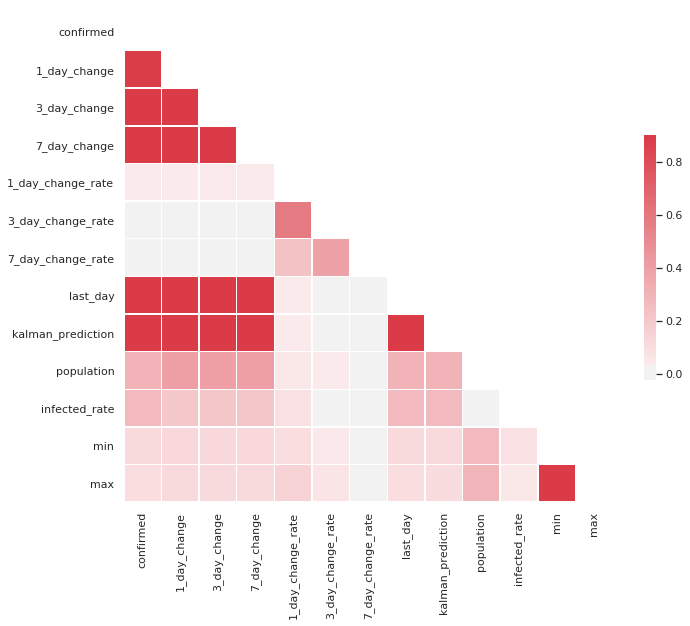

In [56]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [57]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.891924
3_day_change         0.904129
7_day_change         0.914616
1_day_change_rate    0.036590
3_day_change_rate    0.008435
7_day_change_rate   -0.008843
last_day             0.983116
kalman_prediction    0.983181
population           0.306048
infected_rate        0.266988
min                  0.120427
max                  0.107742
Name: confirmed, dtype: float64


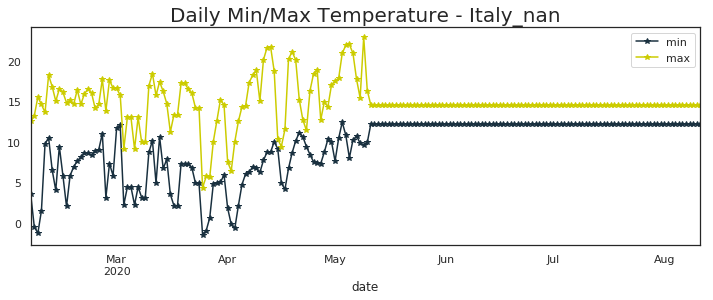

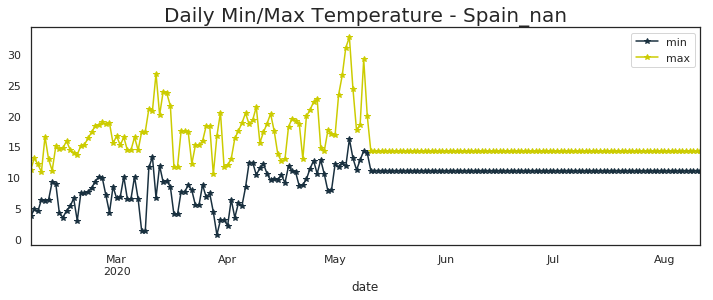

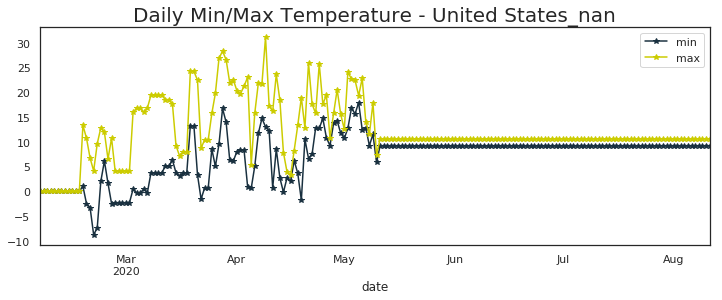

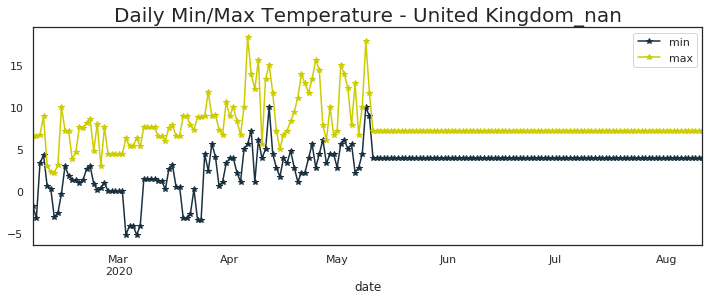

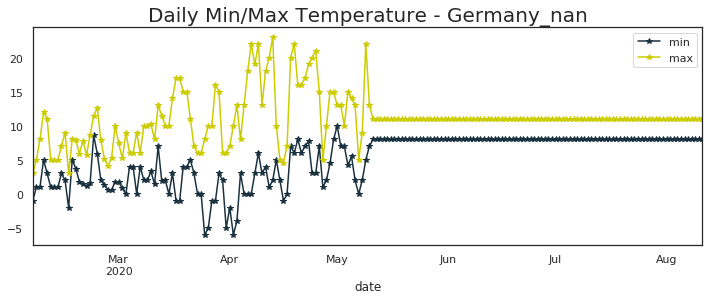

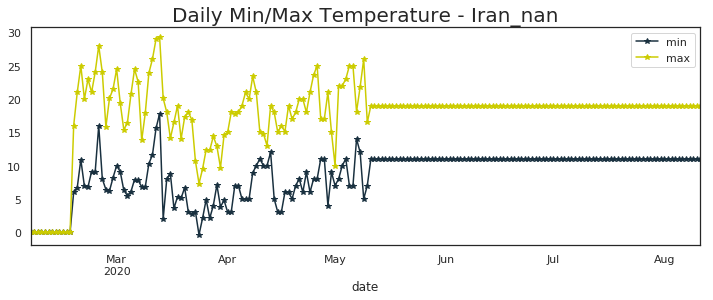

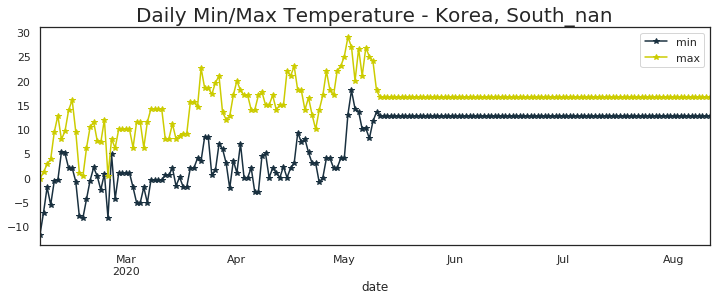

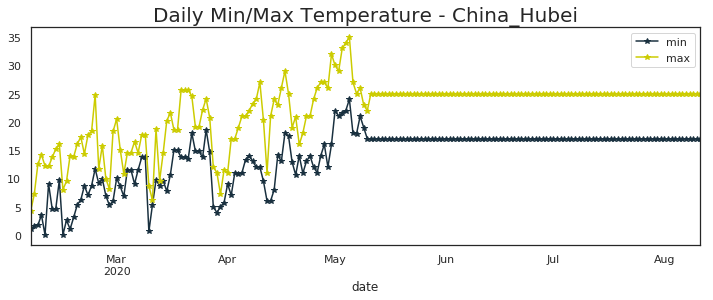

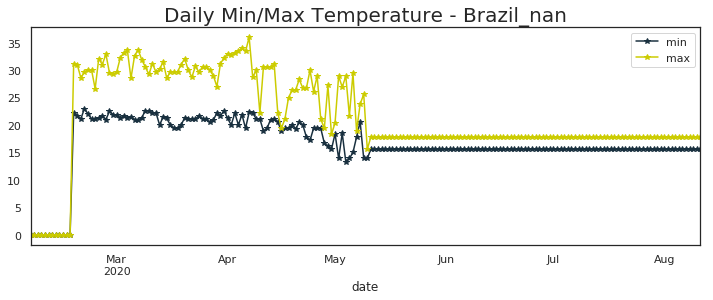

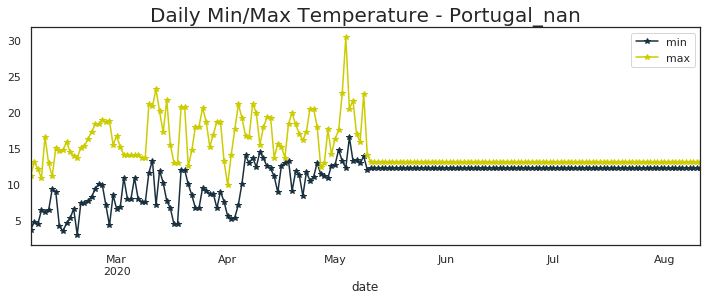

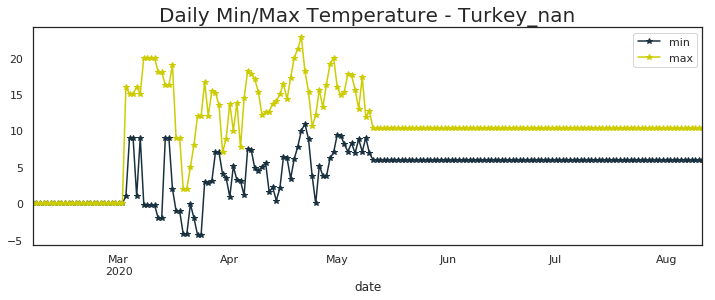

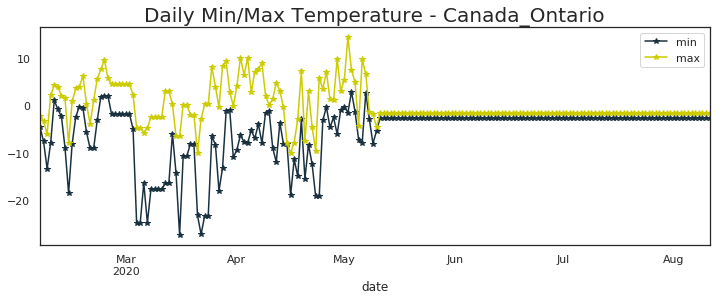

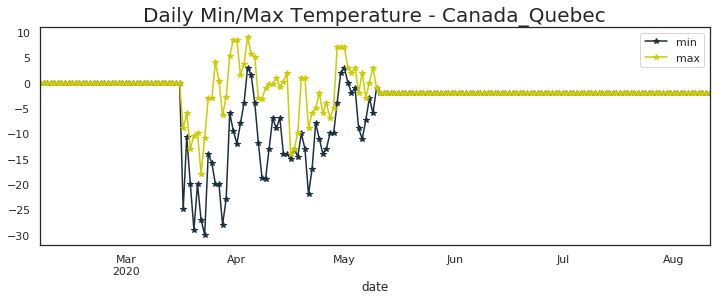

In [58]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [59]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.9  31.1
Brazil_nan                  23.0  36.0
India_nan                   30.0  43.0
Russia_nan                  13.0  30.0
South Africa_nan             0.0   0.0
Mexico_nan                   0.0   0.0
Peru_nan                     0.0   0.0
Colombia_nan                 0.0   0.0
Chile_nan                    0.0   0.0
Iran_nan                    17.8  29.3
Spain_nan                   16.2  32.7
United Kingdom_nan          10.0  18.3
Saudi Arabia_nan             0.0   0.0
Pakistan_nan                16.0  28.0
Bangladesh_nan               0.0   0.0
Argentina_nan                0.0   0.0
Italy_nan                   12.4  22.9
Turkey_nan                  10.9  22.8
France_nan                  14.2  23.8
Germany_nan                 10.0  23.0
Iraq_nan                    21.2  29.1
Philippines_nan             27.8  35.0
Indonesia_nan               

### Kalman X Days Ahead Prediction

In [60]:
%%R

#install.packages('reshape')

NULL


In [61]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [62]:
all_new=%R all_new

In [63]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

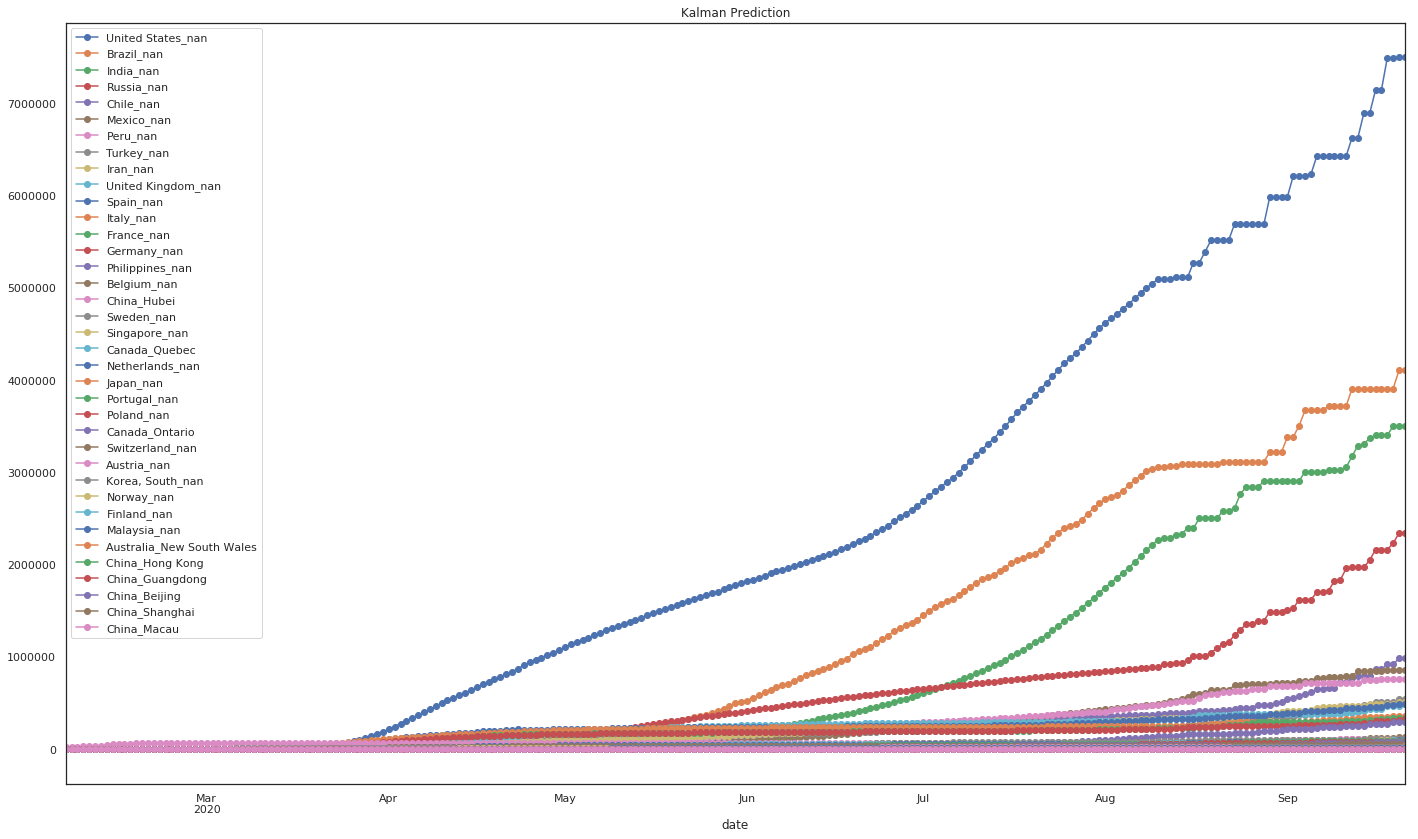

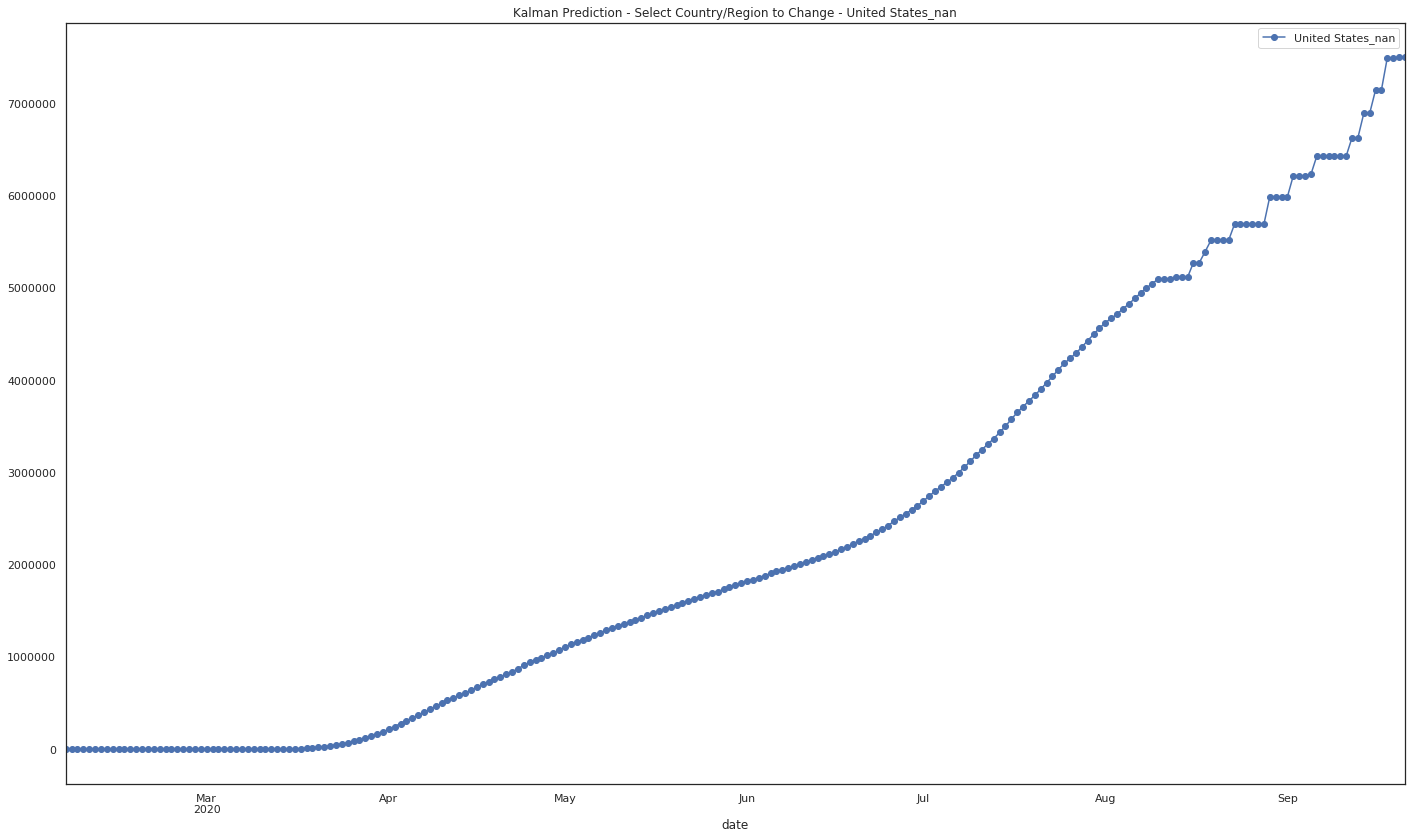

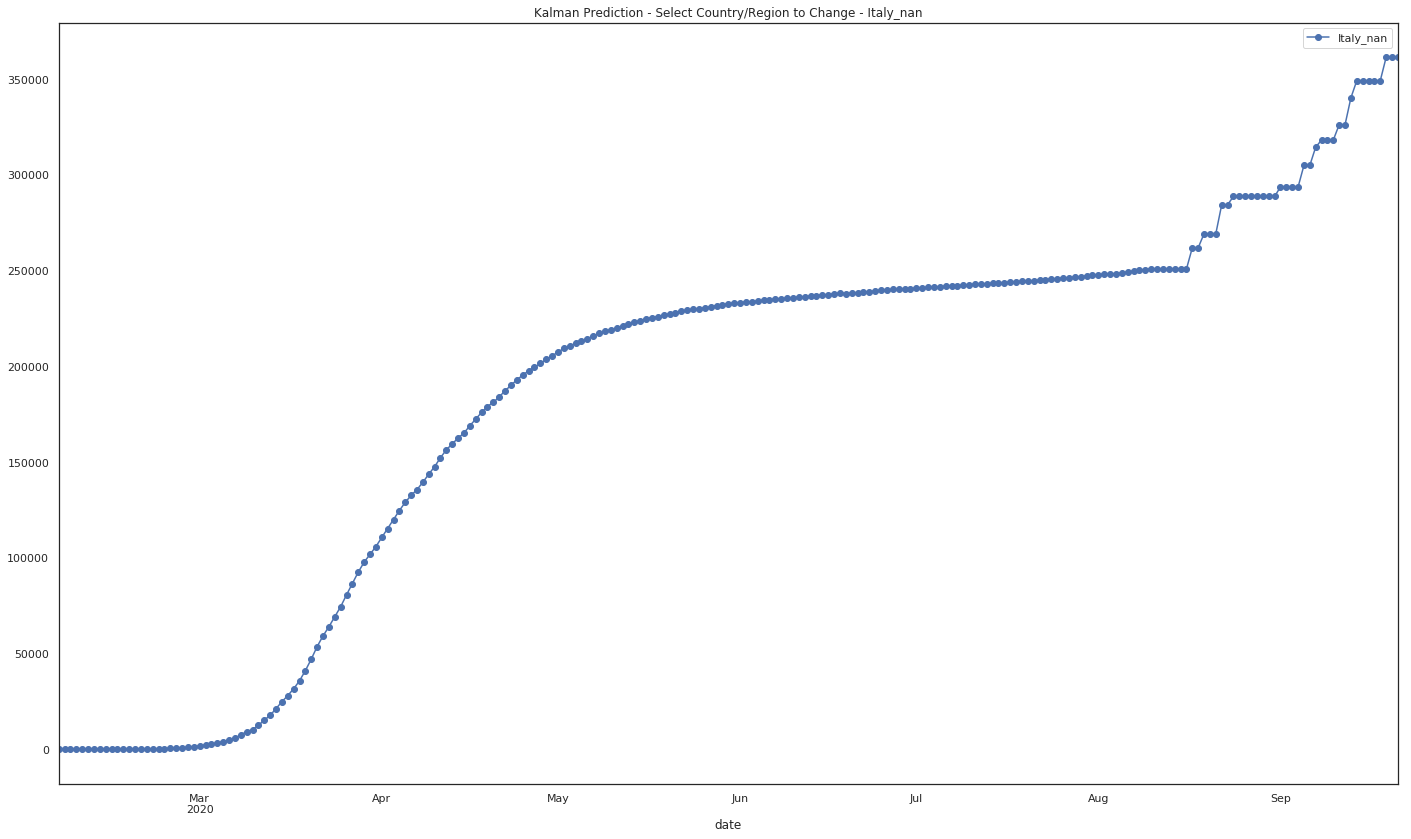

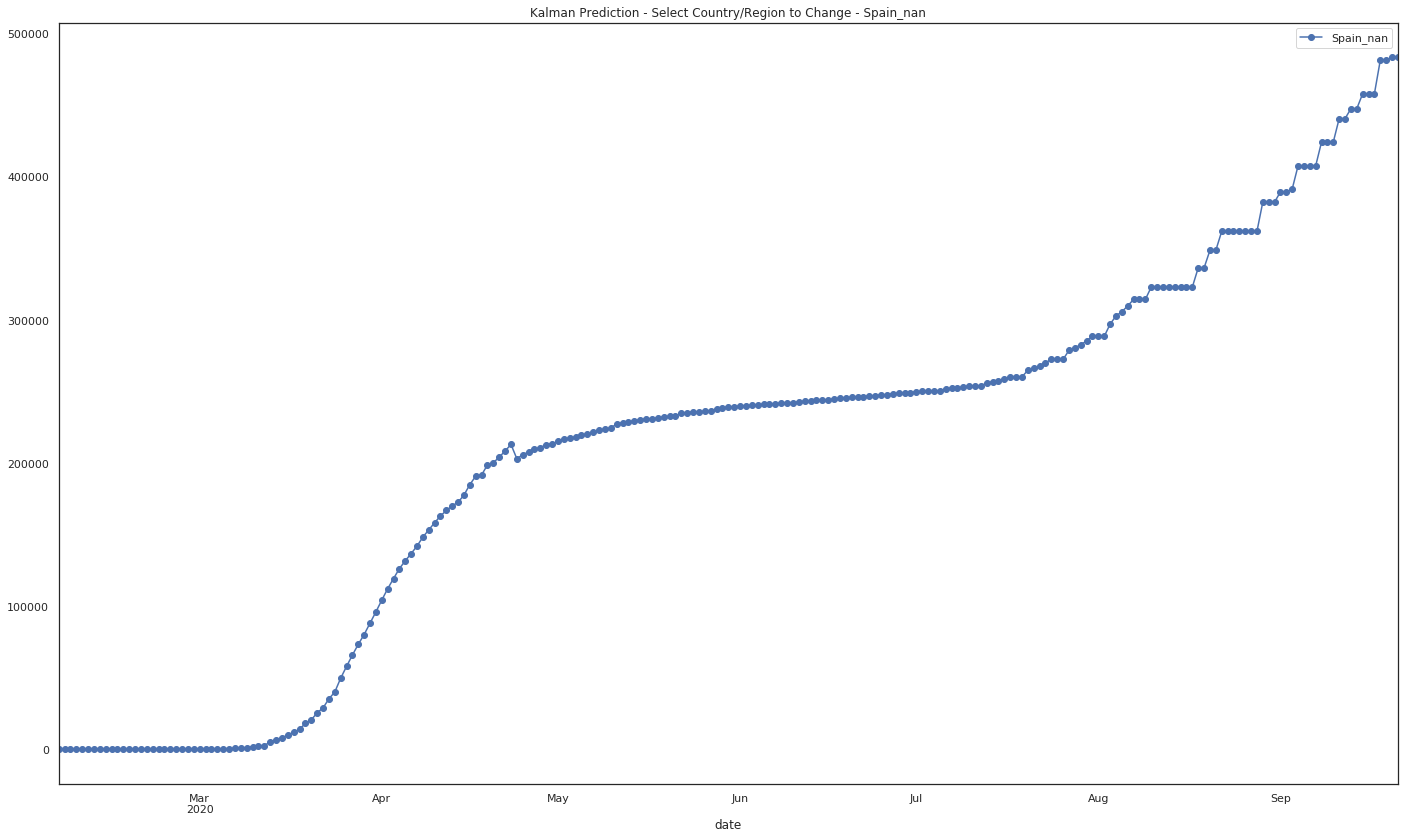

In [64]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


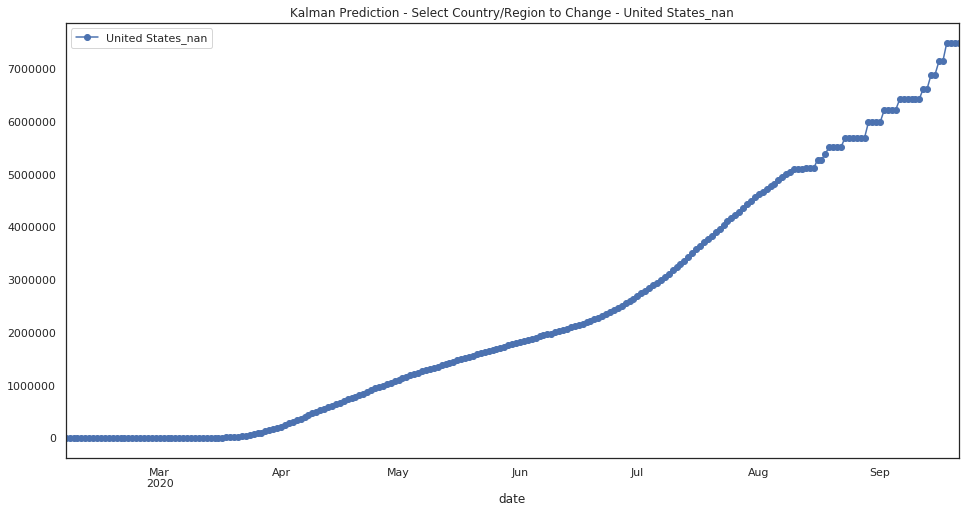

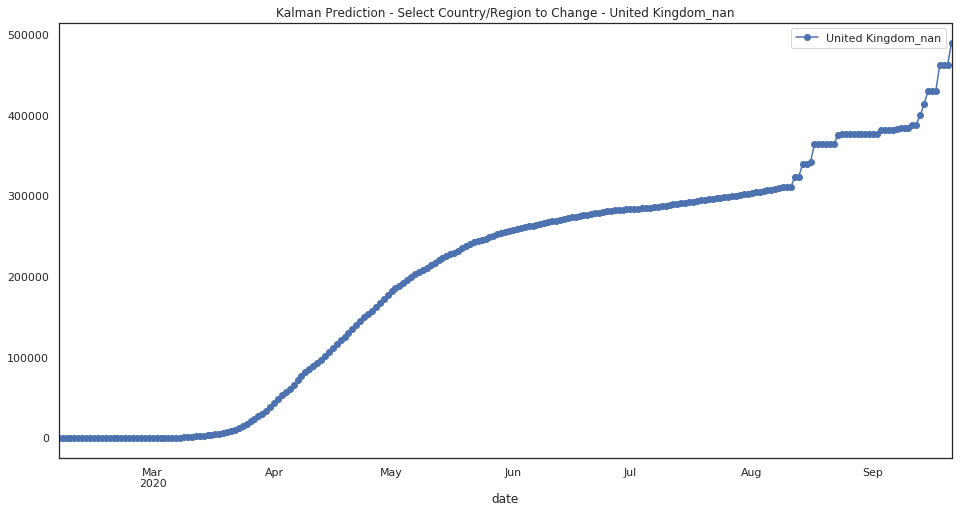

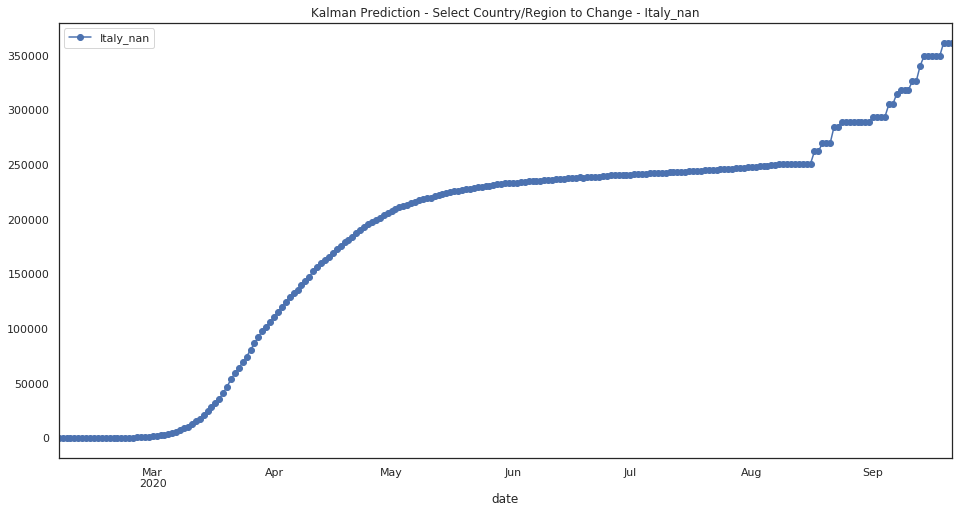

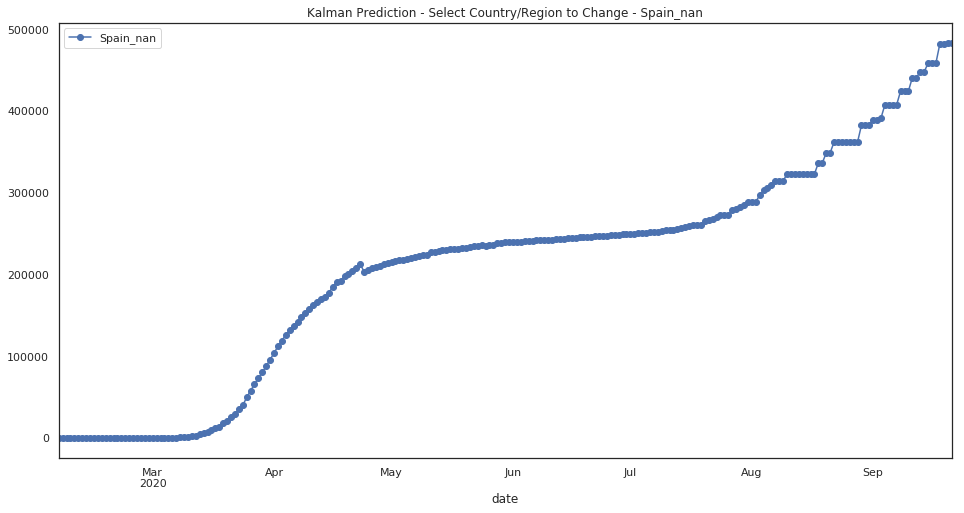

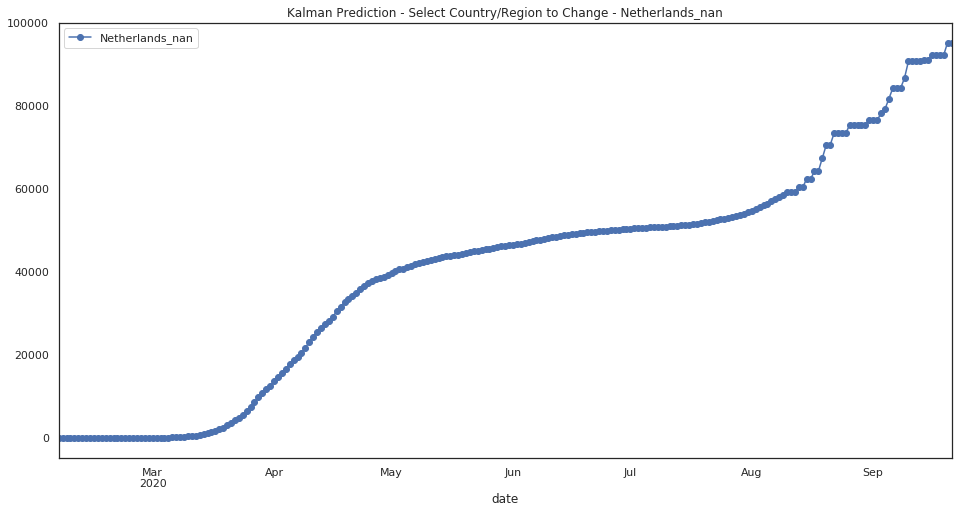

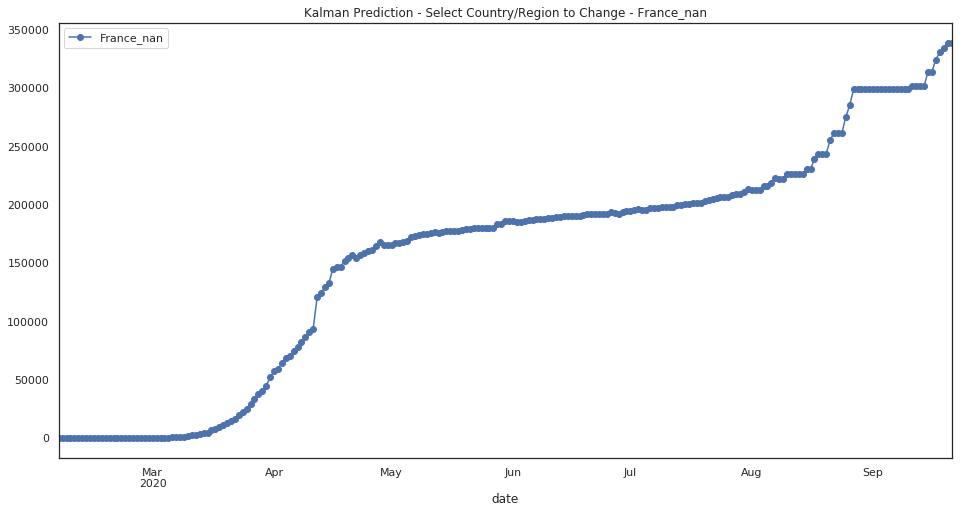

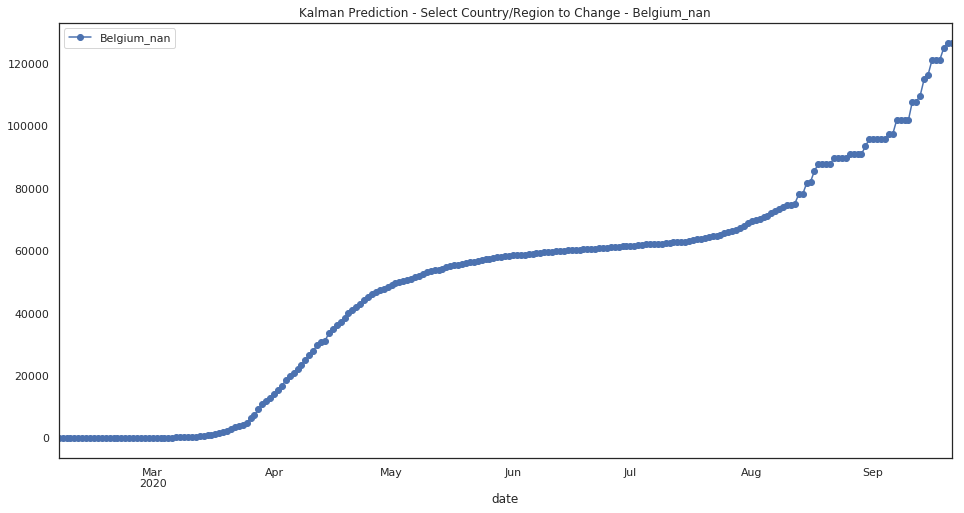

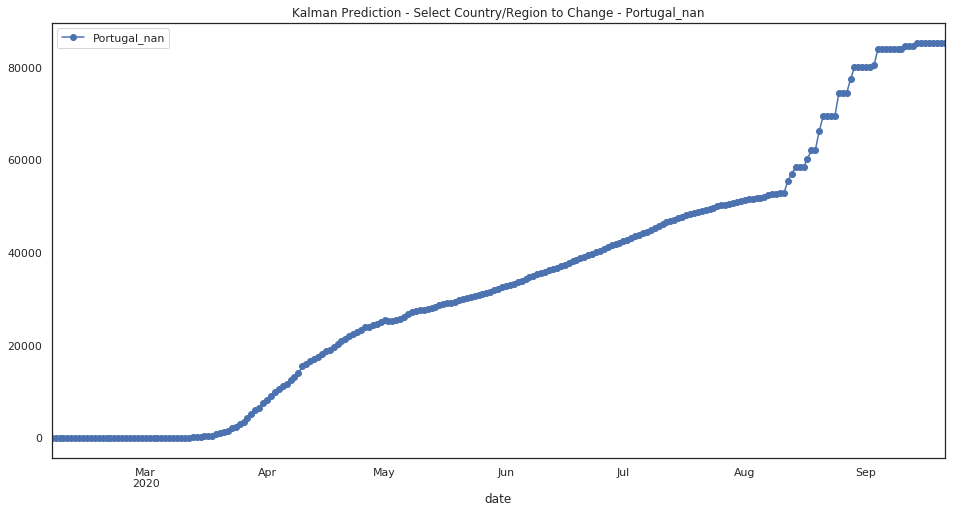

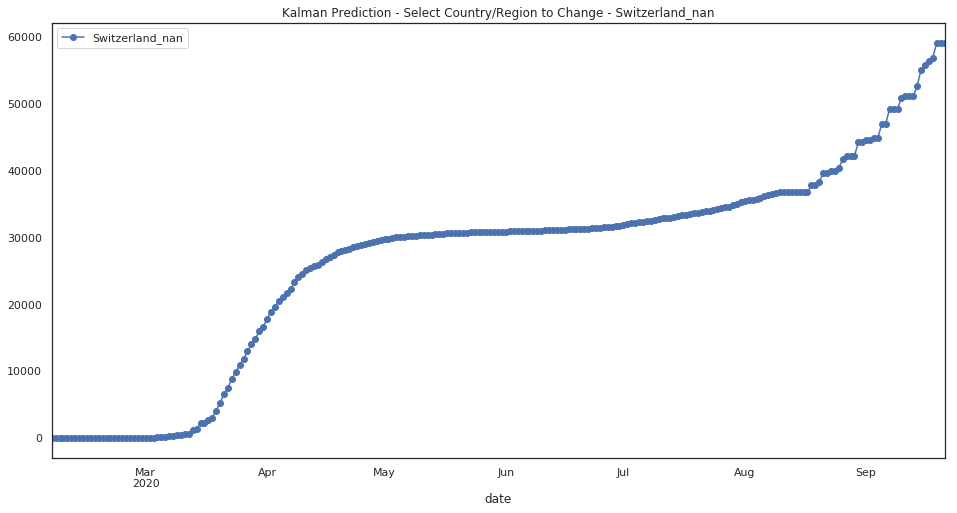

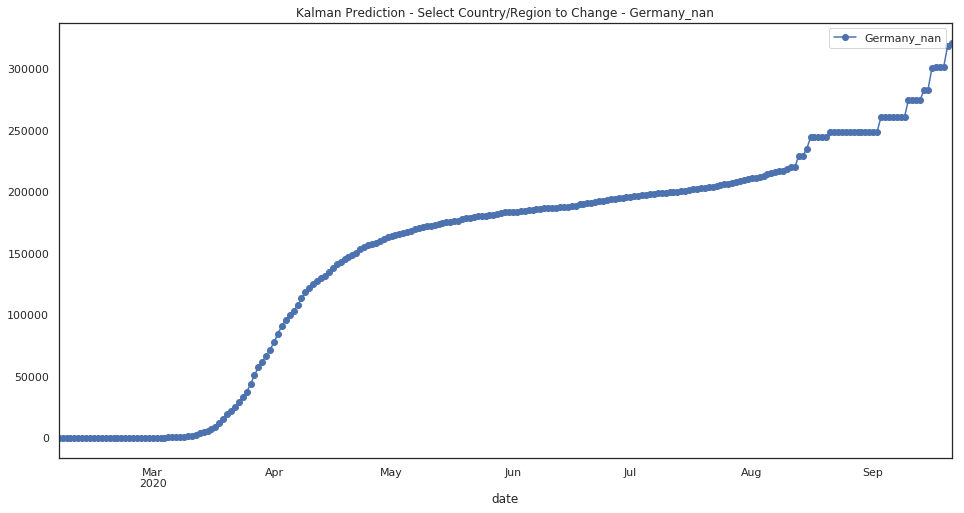

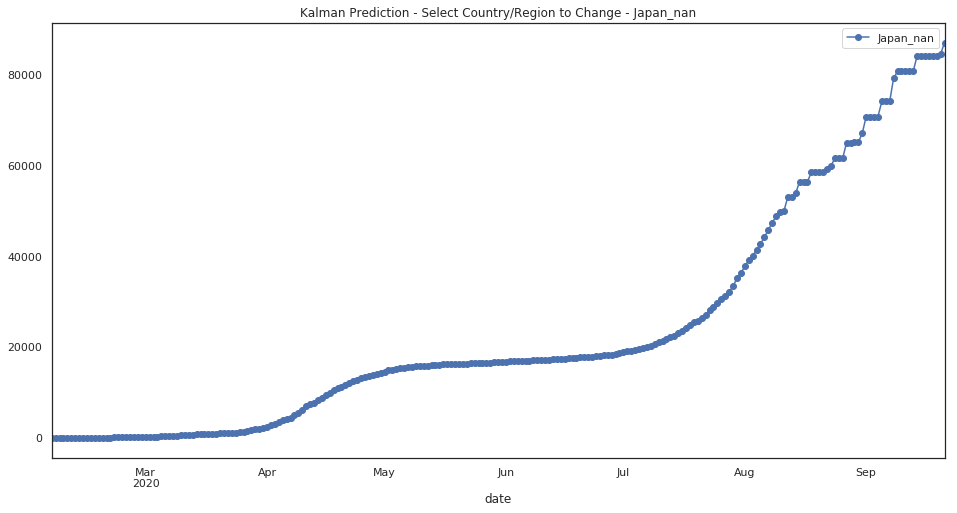

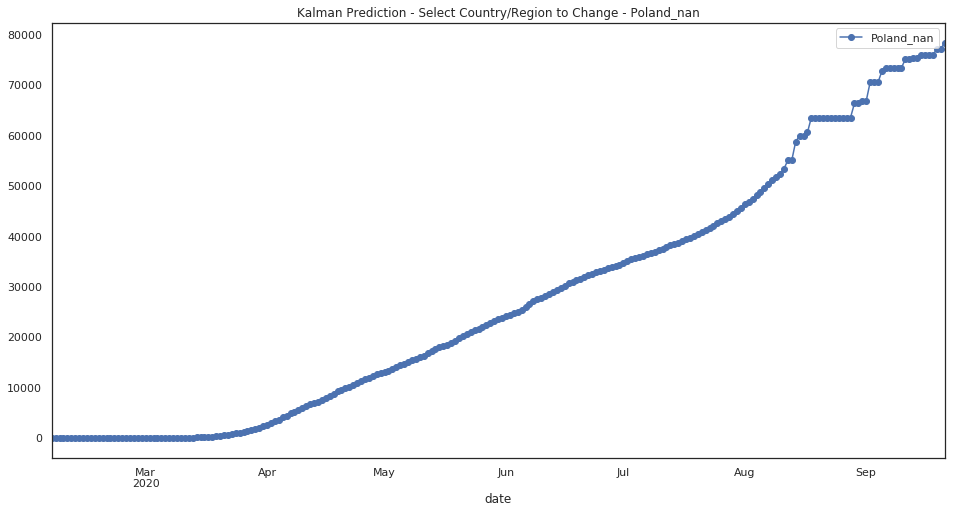

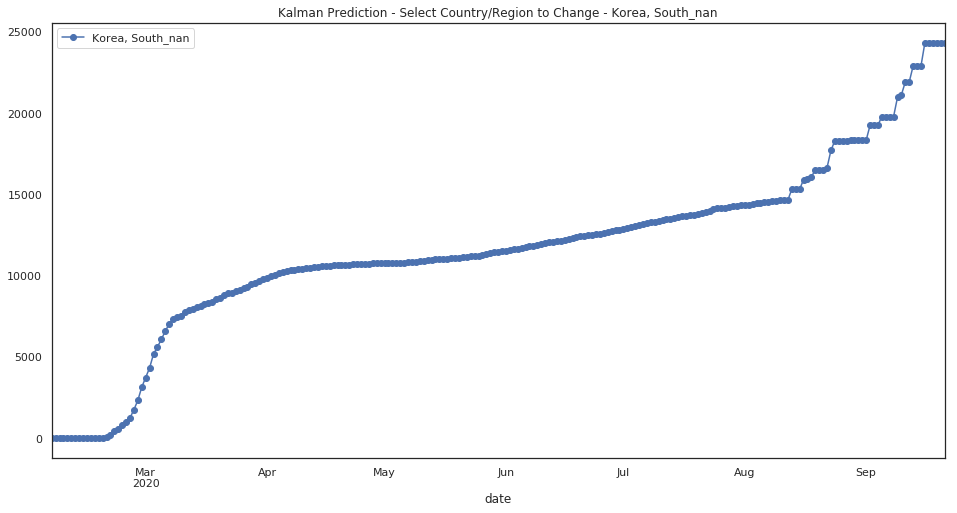

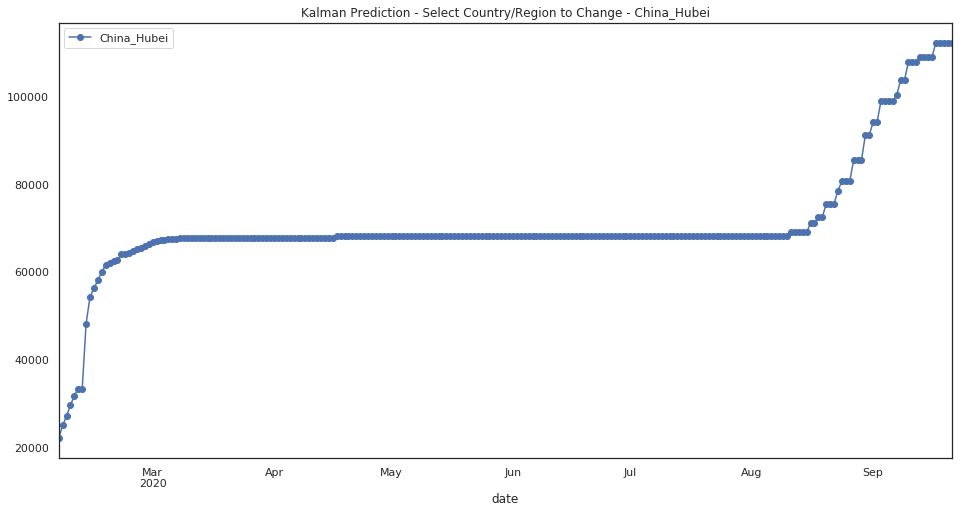

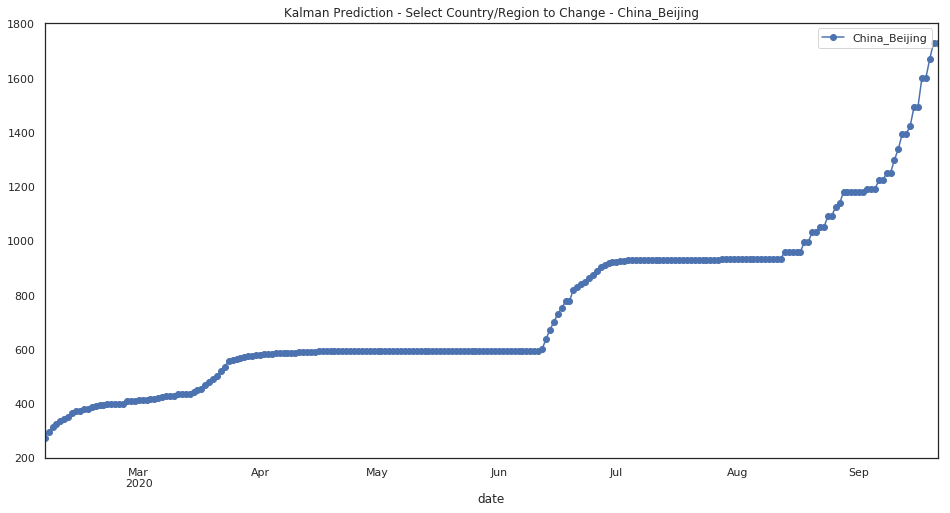

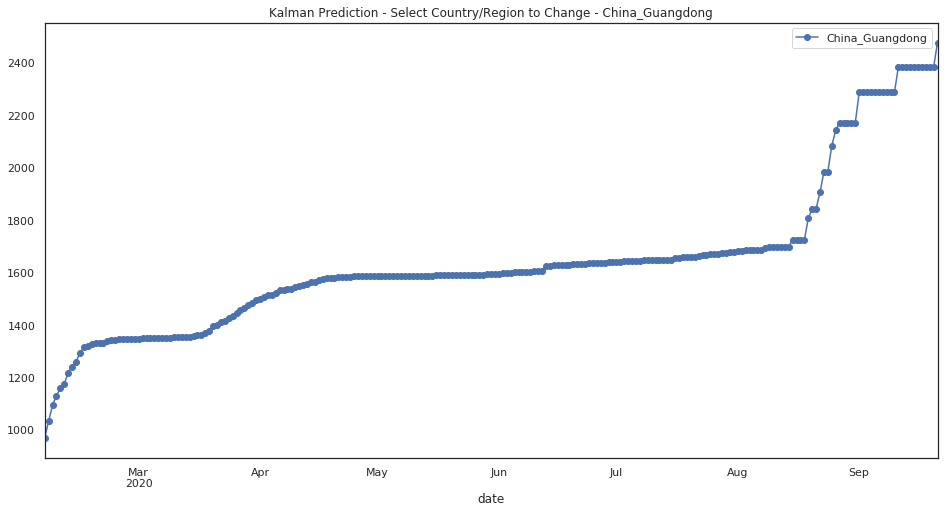

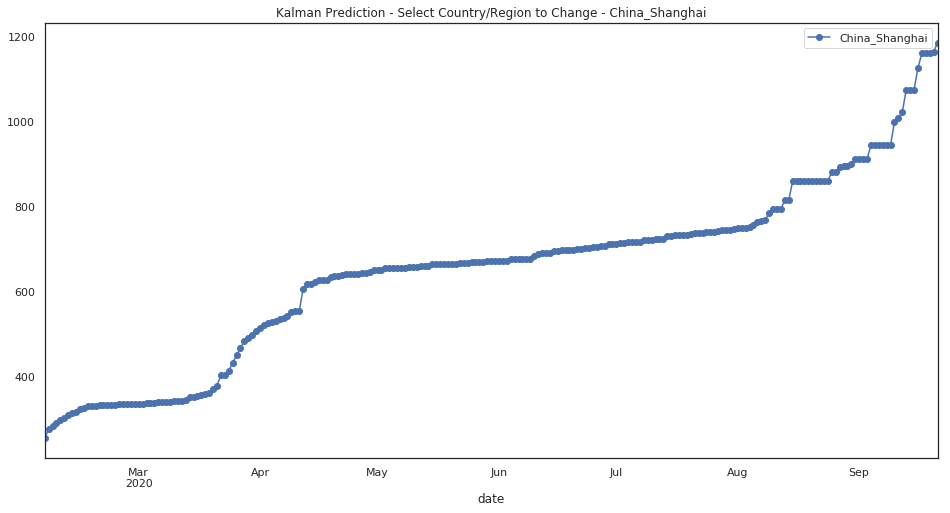

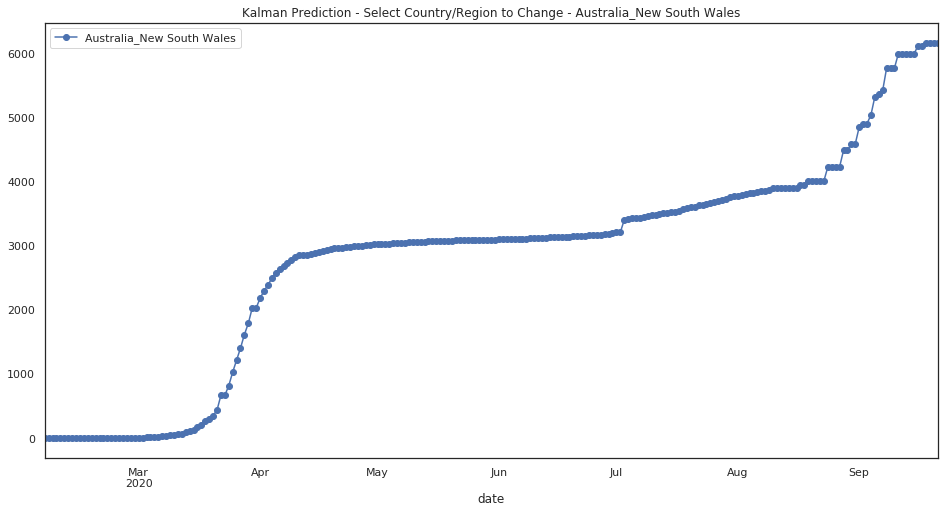

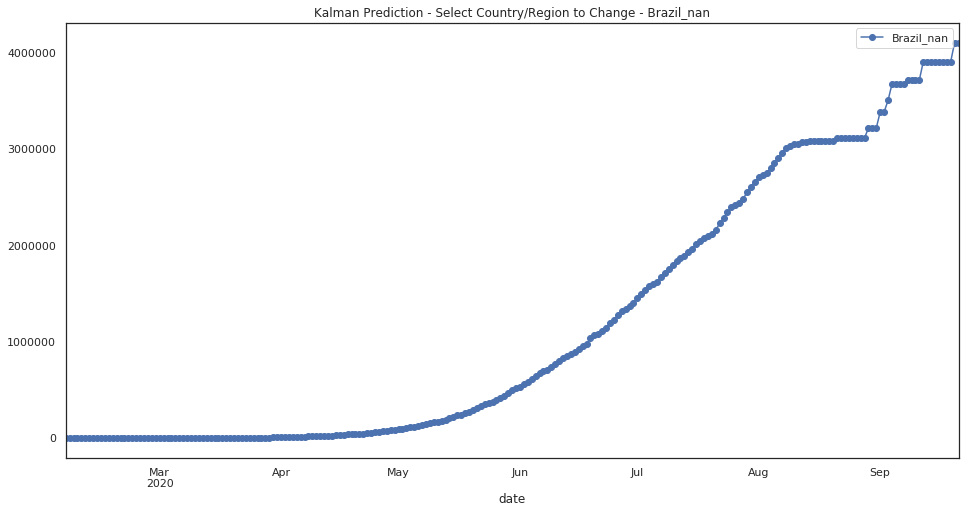

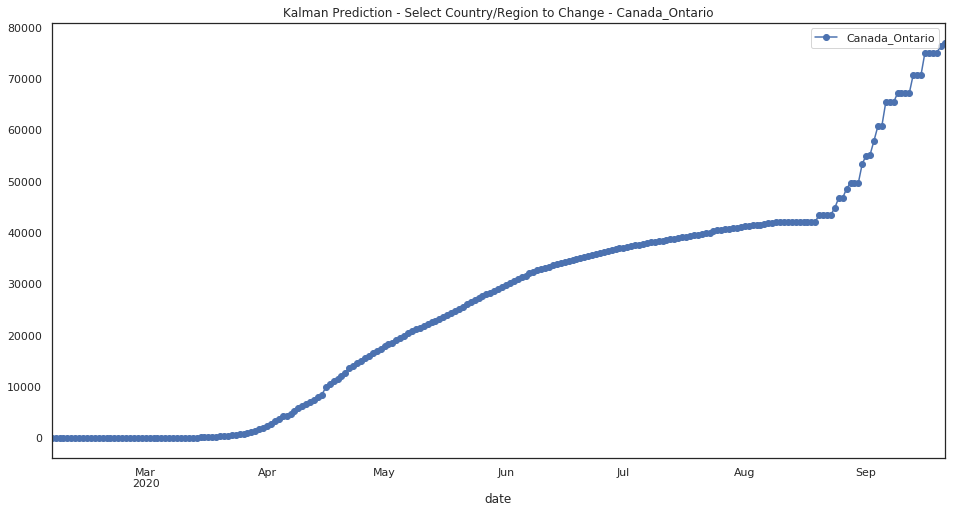

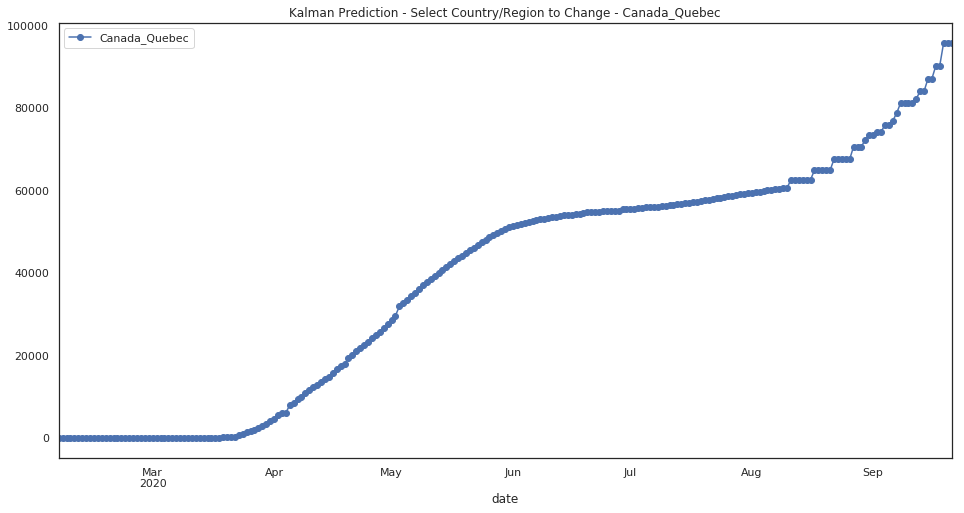

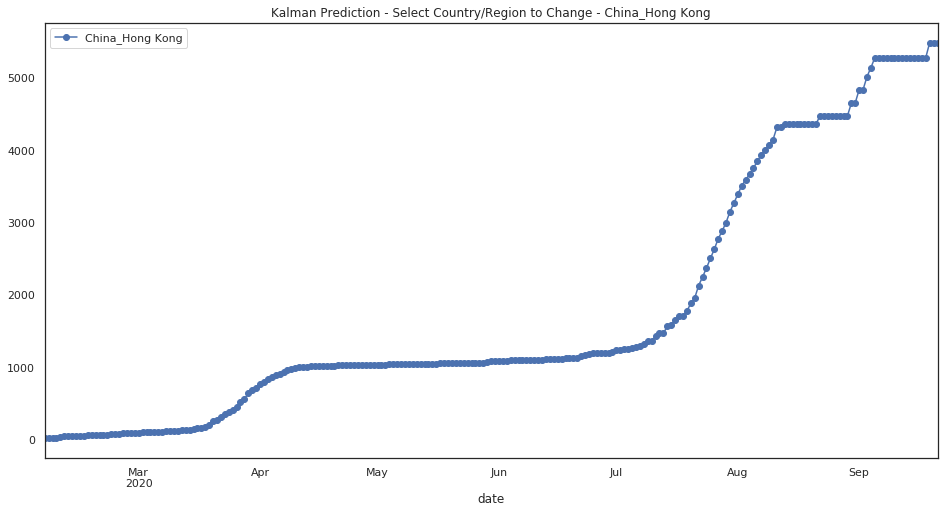

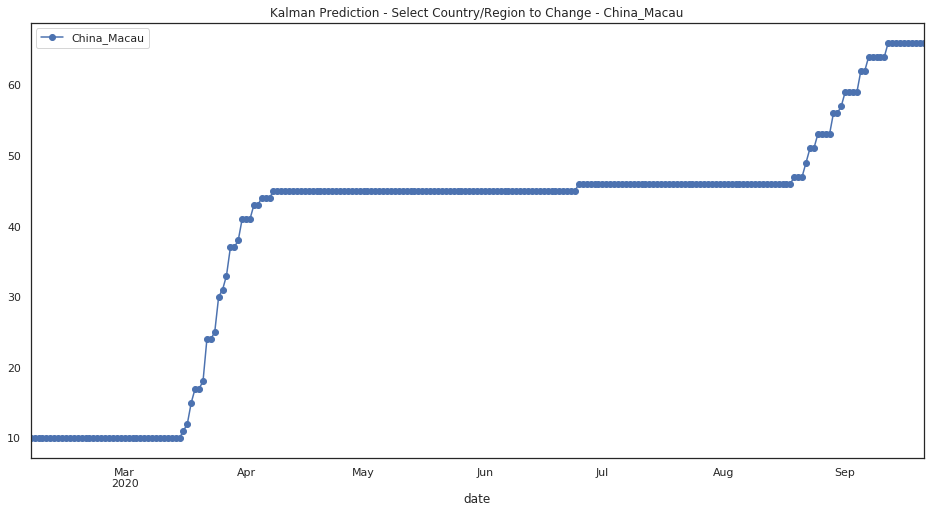

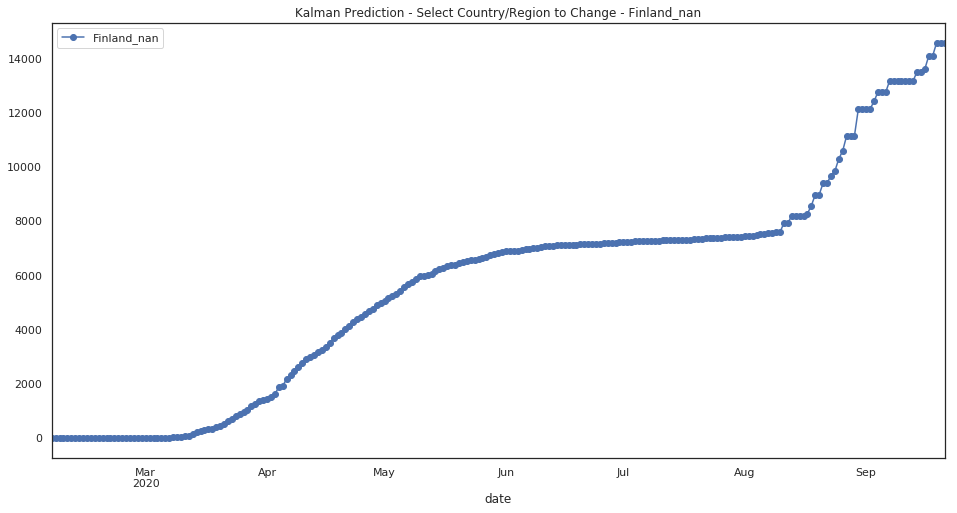

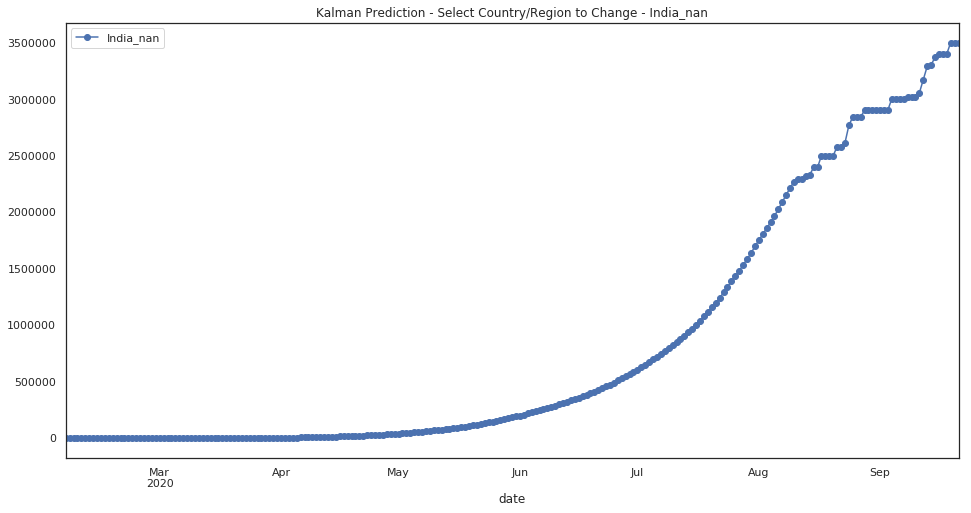

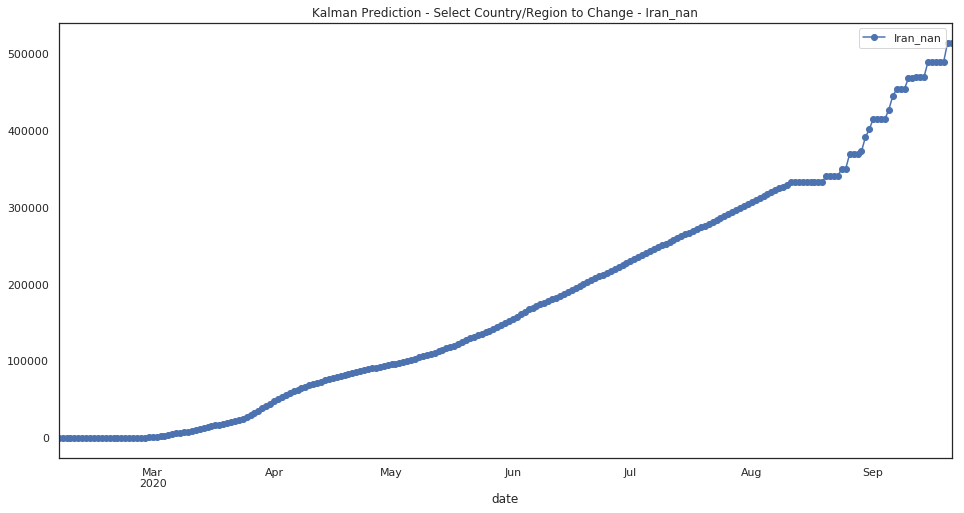

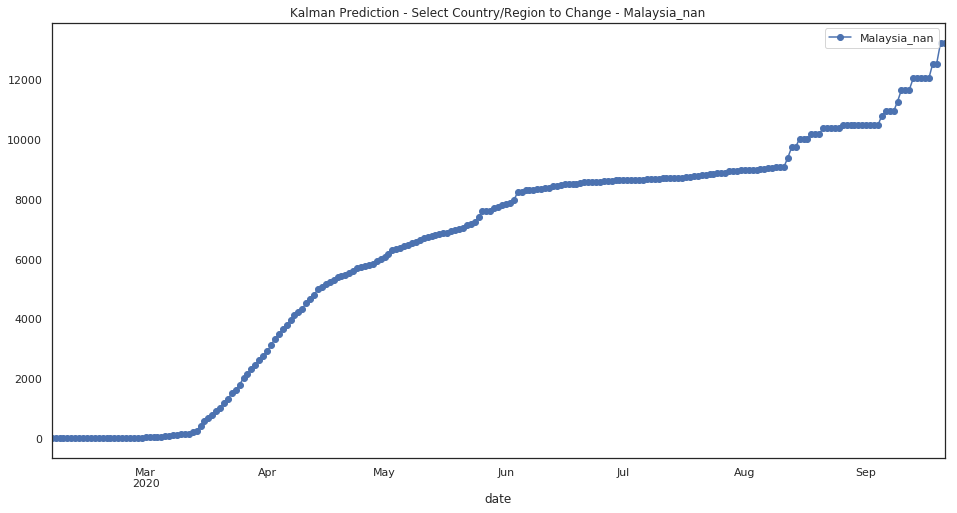

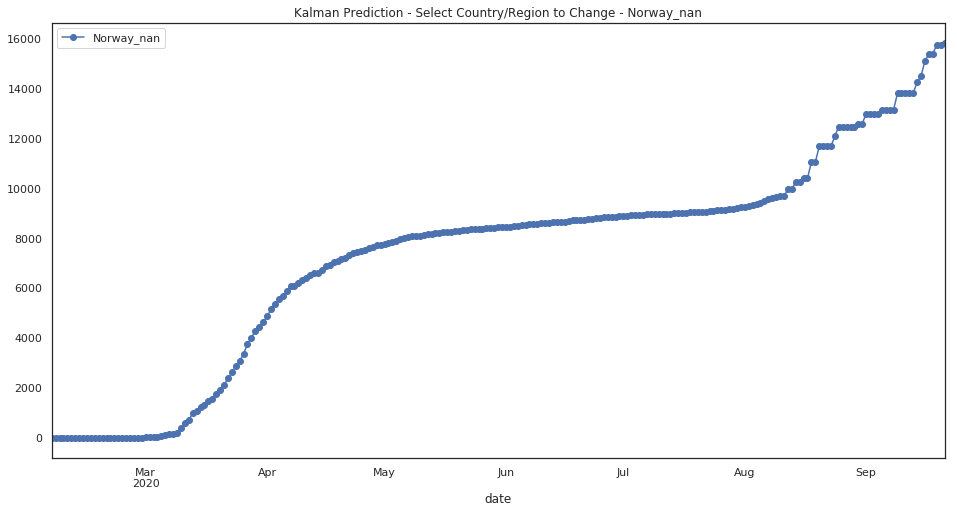

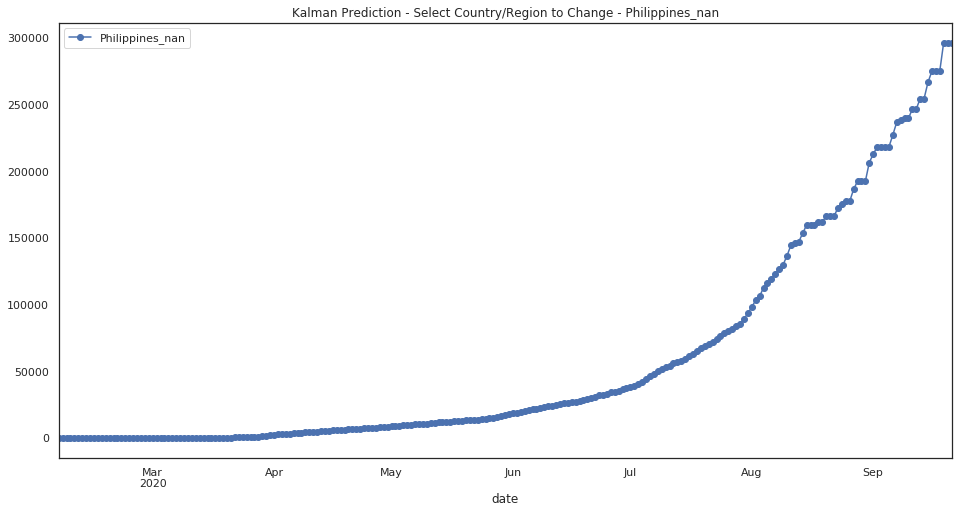

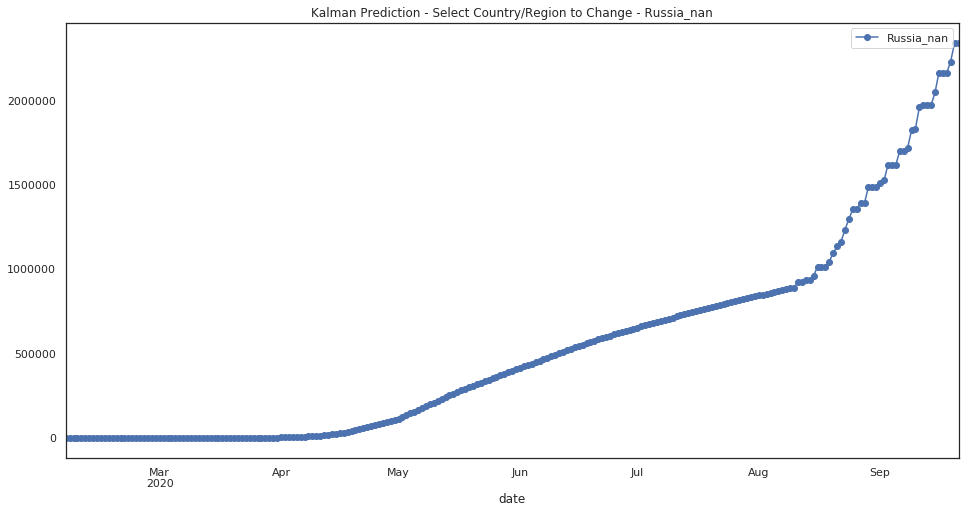

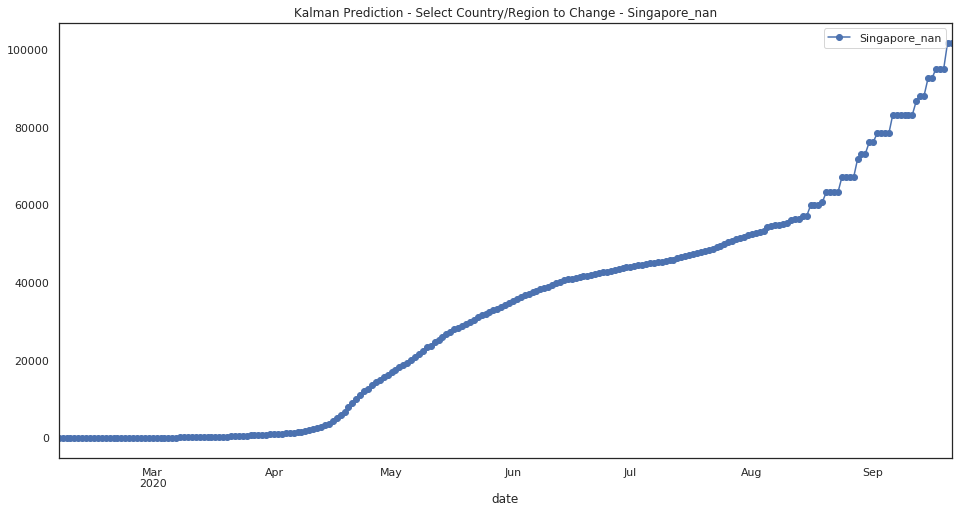

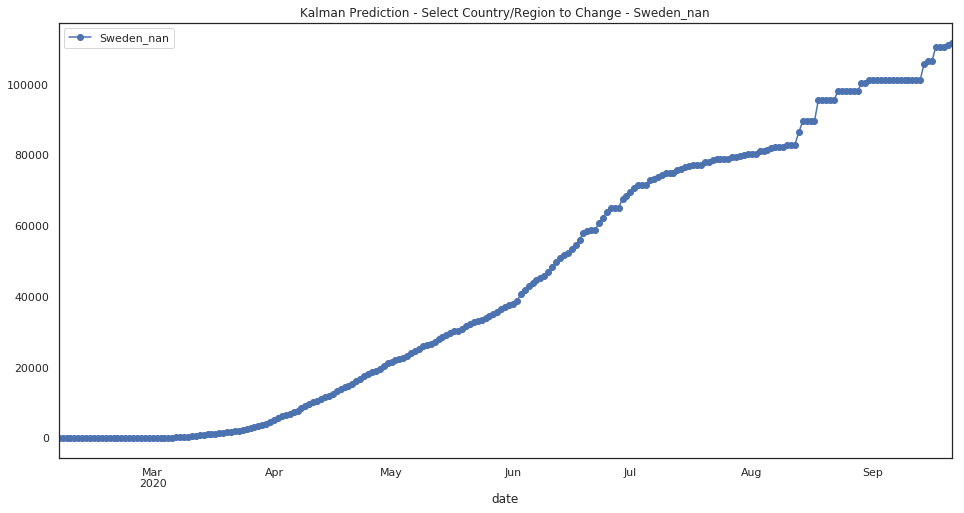

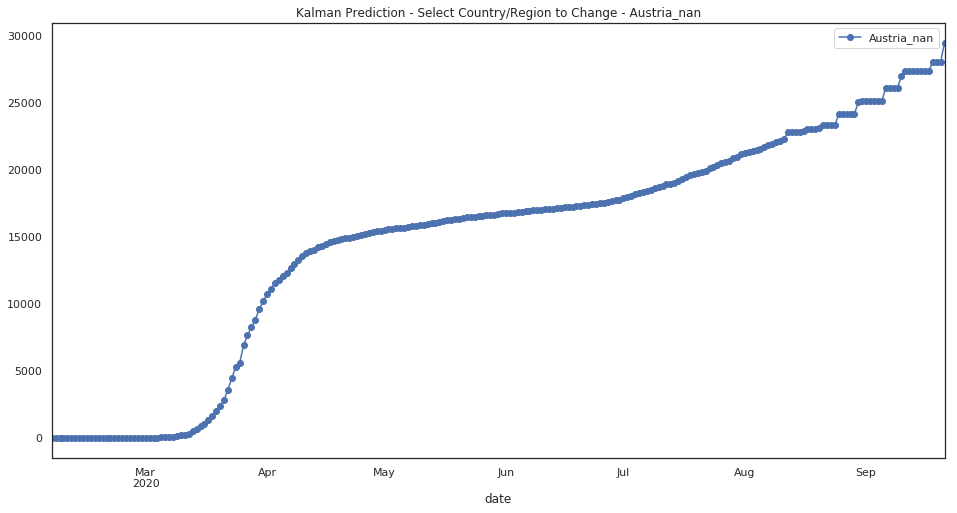

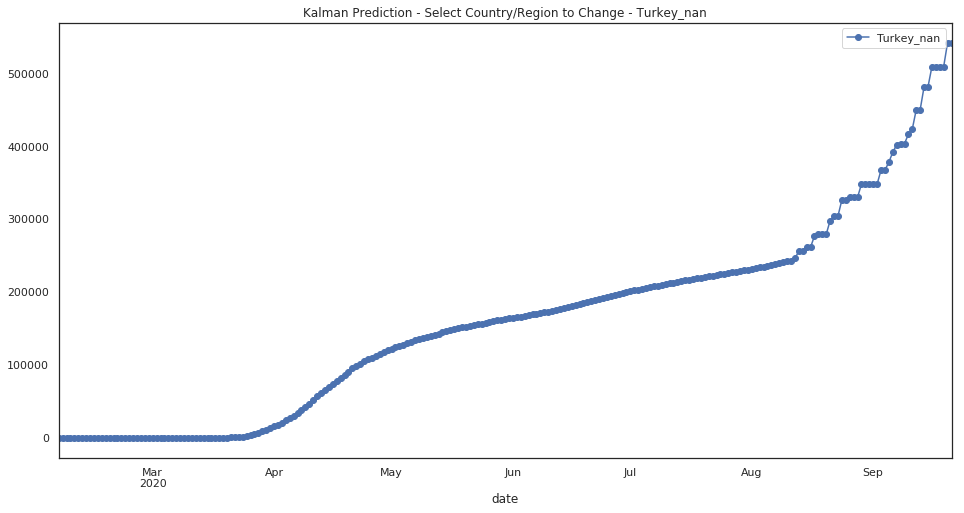

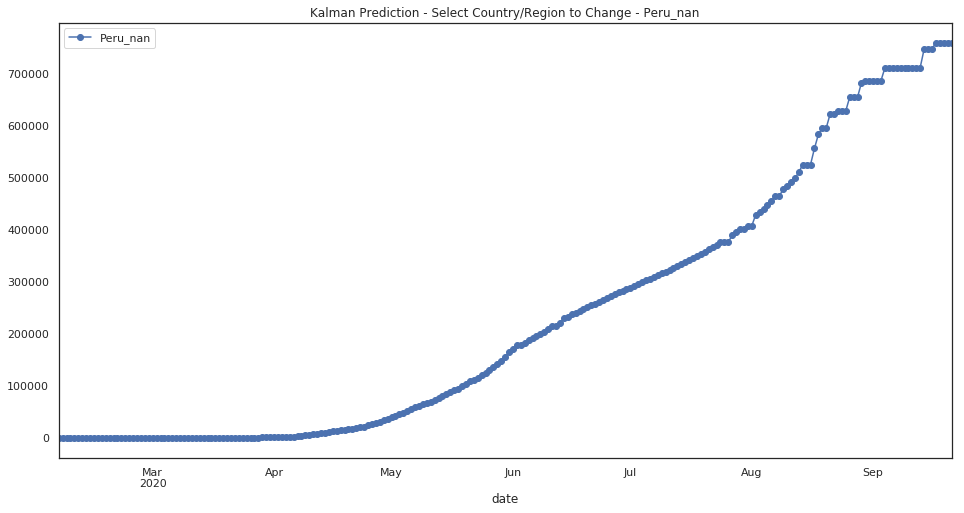

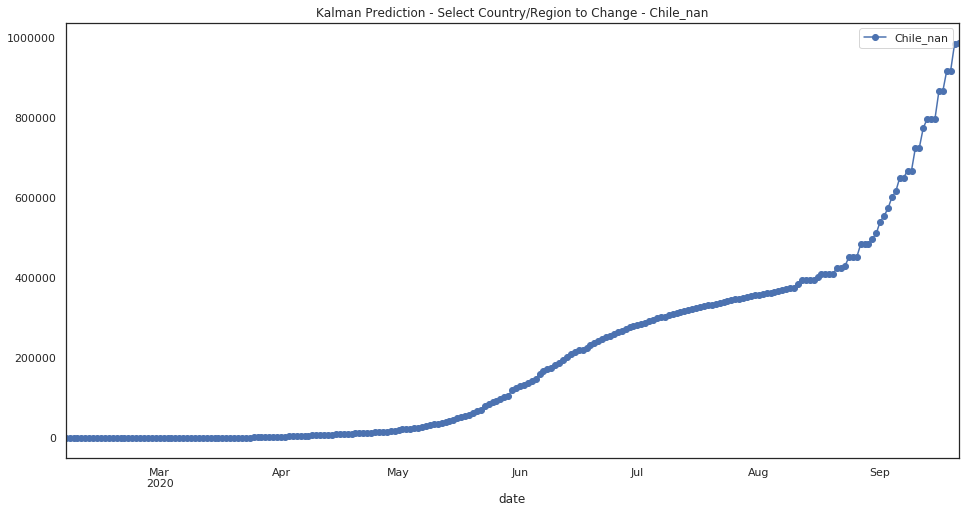

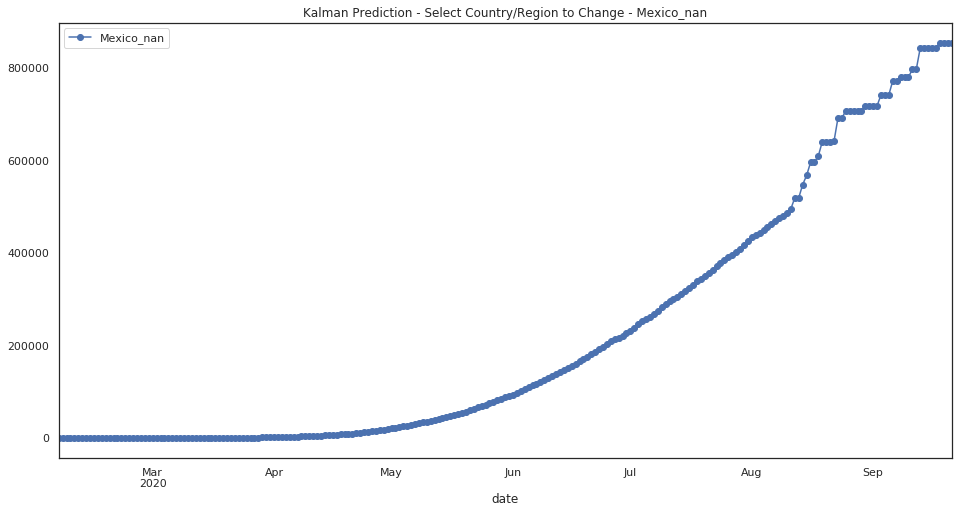

In [65]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [66]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-09-21 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN       7497253.0
Brazil_nan                                    NaN       4106334.0
India_nan                                     NaN       3501069.0
Russia_nan                                    NaN       2341377.0
South Africa_nan                              NaN       1050224.0
Chile_nan                                     NaN        986777.0
Mexico_nan                                    NaN        854340.0
Peru_nan                                      NaN        759525.0
Colombia_nan                                  NaN        697797.0
Pakistan_nan                                  NaN        654044.0
Turkey_nan                                    NaN        541943.0
Iran_nan                                      NaN        514111.0
United Kingdom_nan                            NaN        490469.0
Spain_nan                                     NaN        483686.0
Bangladesh_nan                                NaN        450846.0
Saudi Arabia_nan                              NaN        396344.0
Italy_nan                                     NaN        361464.0
Argentina_nan                                 NaN        359970.0
France_nan                                    NaN        339012.0
Germany_nan                                   NaN        321213.0
Iraq_nan                                      NaN        309592.0
Philippines_nan                               NaN        296417.0
Qatar_nan                                     NaN        264182.0
Ecuador_nan                                   NaN        204357.0
Indonesia_nan                                 NaN        194975.0
Kazakhstan_nan                                NaN        177192.0
Kuwait_nan                                    NaN        168424.0
Ukraine_nan                                   NaN        154431.0
Panama_nan                                    NaN        146255.0
United Arab Emirates_nan                      NaN        145612.0
...                                           ...             ...
Saint Vincent and the Grenadines_nan          NaN            89.0
Canada_Prince Edward Island                   NaN            67.0
China_Macau                                   NaN            66.0
Netherlands_Curacao                           NaN            60.0
Saint Lucia_nan                               NaN            45.0
France_New Caledonia                          NaN            44.0
Fiji_nan                                      NaN            44.0
Australia_Northern Territory                  NaN            39.0
Timor-Leste_nan                               NaN            37.0
Grenada_nan                                   NaN            36.0
Dominica_nan                                  NaN            31.0
China_Qinghai                                 NaN            29.0
United Kingdom_Falkland Islands (Malvinas)    NaN            28.0
Laos_nan                                      NaN            28.0
Denmark_Greenland                             NaN            24.0
France_Saint Barthelemy                       NaN            23.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN            22.0
Canada_Grand Princess                         NaN            21.0
Saint Kitts and Nevis_nan                     NaN            20.0
Canada_Yukon                                  NaN            19.0
United Kingdom_Montserrat                     NaN            17.0
Holy See_nan                                  NaN            12.0
Western Sahara_nan                            NaN            10.0
MS Zaandam_nan                                NaN             9.0
United Kingdom_British Virgin Islands         NaN             9.0
Canada_Northwest Territories                  NaN             5.0
France_Saint Pierre and Miquelon              NaN             4.0
United Kingdom_Anguilla                       NaN             3.0
China_Tibet                                   NaN             1.0
Canada_Diamond Princes

In [67]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [68]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [69]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [70]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [71]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [72]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-06             11.0         11.0         11.0         11.0   
2020-02-07             11.0         11.0         11.0         11.0   
2020-02-08             11.0         11.0         11.0         11.0   
2020-02-09             11.0         11.0         11.0         11.0   
2020-02-10             11.0         11.0         11.0         11.0   
2020-02-11             11.0         11.0         11.0         11.0   
2020-02-12             11.0         11.0         11.0         11.0   
2020-02-13             11.0         11.0         11.0         11.0   
2020-02-14             11.0         11.0         11.0         11.0   
2020-02-15             11.0         11.0         11.0         11.0   
2020-02-16             11.0         11.0         11.0         11.0   
2020-02-17             11.0         11.0         11.0         11.0   
2020-02-18             23.0         11.0         32.0         11.0   
2020-02-19             20.0         11.0         33.0         11.0   
2020-02-20             21.0         11.0         35.0         11.0   
2020-02-21             23.0         11.0         35.0         11.0   
2020-02-22             26.0         11.0         34.0         11.0   
2020-02-23             26.0         11.0         33.0         11.0   
2020-02-24             29.0         11.0         31.0         11.0   
2020-02-25             29.0         11.0         35.0         11.0   
2020-02-26             10.0         11.0         35.0         11.0   
2020-02-27             21.0         11.0         23.0         11.0   
2020-02-28             13.0         11.0         25.0         11.0   
2020-02-29             14.0         11.0         28.0         11.0   
2020-03-01             15.0         11.0         30.0         11.0   
2020-03-02             16.0         11.0         30.0         10.0   
2020-03-03             18.0         11.0         17.0         12.0   
2020-03-04             13.0         11.0         40.0          1.0   
2020-03-05             12.0         11.0         73.0          1.0   
2020-03-06             13.0         11.0         63.0          4.0   
...                     ...          ...          ...          ...   
2020-08-24          42990.0       8572.0      43722.0       1178.0   
2020-08-25          42896.0       8735.0      43763.0       1178.0   
2020-08-26          45812.0       8556.0      43923.0       1238.0   
2020-08-27          46098.0       8538.0      43962.0       1238.0   
2020-08-28          47810.0       8826.0      43079.0       1283.0   
2020-08-29          47338.0       9479.0      46262.0       1356.0   
2020-08-30          47530.0       9564.0      44964.0       1424.0   
2020-08-31          47788.0      10394.0      47282.0       1449.0   
2020-09-01          47789.0      10296.0      47157.0       1449.0   
2020-09-02          46718.0      10072.0      47072.0       1449.0   
2020-09-03          49042.0      11641.0      47419.0       1533.0   
2020-09-04          48190.0      11194.0      47421.0       1614.0   
2020-09-05          48256.0      11373.0      46908.0       1674.0   
2020-09-06          48616.0      11074.0      46909.0       1749.0   
2020-09-07          51999.0      12606.0      46412.0       1780.0   
2020-09-08          50769.0      12226.0      49853.0       1892.0   
2020-09-09          52825.0      12479.0      48813.0       1865.0   
2020-09-10          52561.0      12350.0      51684.0       1992.0   
2020-09-11          52347.0      13437.0      52210.0       1960.0   
2020-09-12          52638.0      14053.0      55194.0       1960.0   
2020-09-13          55455.0      13920.0      53642.0       2150.0   
2020-09-14          54024.0      13609.0      60897.0       2114.0   
2020-09-15          57495.0      14623.0      59228.0       2178.0   
2020-09-16          56846.0      14349.0      57706.0       2178.0   
2020-09-17

In [73]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [74]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'Brazil_nan',
 'India_nan',
 'Russia_nan',
 'South Africa_nan',
 'Chile_nan',
 'Mexico_nan',
 'Peru_nan',
 'Colombia_nan',
 'Pakistan_nan',
 'Turkey_nan',
 'Iran_nan',
 'United Kingdom_nan',
 'Spain_nan',
 'Bangladesh_nan',
 'Saudi Arabia_nan',
 'Italy_nan',
 'Argentina_nan',
 'France_nan',
 'Germany_nan',
 'Iraq_nan',
 'Philippines_nan',
 'Qatar_nan',
 'Ecuador_nan',
 'Indonesia_nan',
 'Kazakhstan_nan',
 'Kuwait_nan',
 'Ukraine_nan',
 'Panama_nan',
 'United Arab Emirates_nan',
 'Egypt_nan',
 'Bolivia_nan',
 'Romania_nan',
 'Belgium_nan',
 'Dominican Republic_nan',
 'Oman_nan',
 'Israel_nan',
 'China_Hubei',
 'Sweden_nan',
 'Guatemala_nan',
 'Singapore_nan',
 'Canada_Quebec',
 'Netherlands_nan',
 'Belarus_nan',
 'Japan_nan',
 'Portugal_nan',
 'Poland_nan',
 'Kyrgyzstan_nan',
 'Canada_Ontario',
 'Azerbaijan_nan',
 'Bahrain_nan',
 'Nigeria_nan',
 'Algeria_nan',
 'Ghana_nan',
 'Afghanistan_nan',
 'Honduras_nan',
 'Moldova_nan',
 'Armenia_nan',
 'Switzerland_nan',
 '

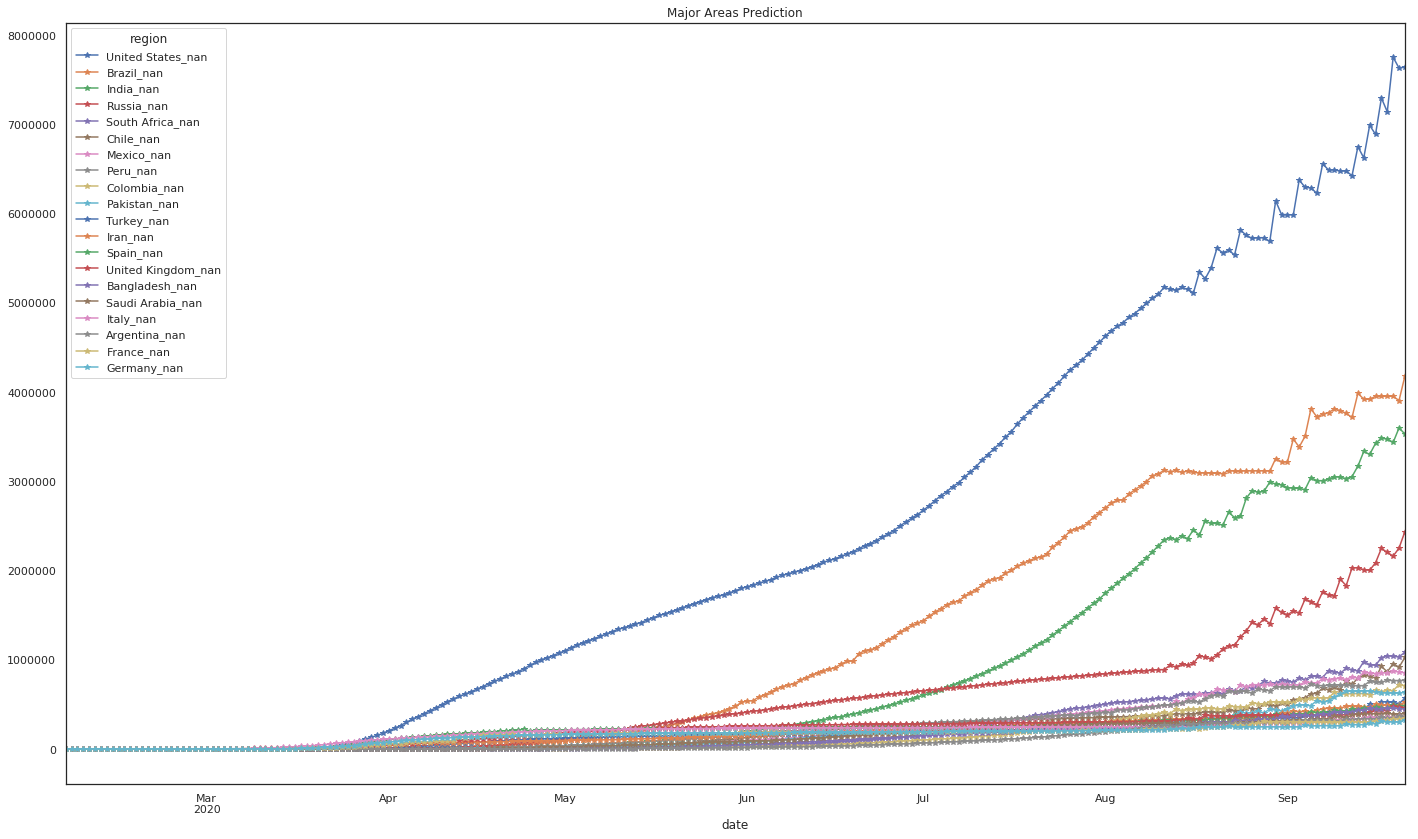

In [75]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

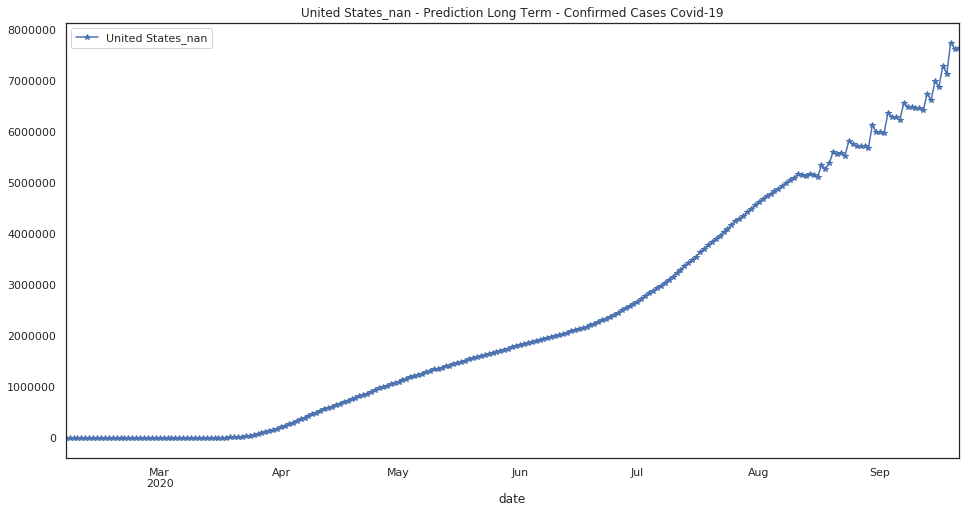

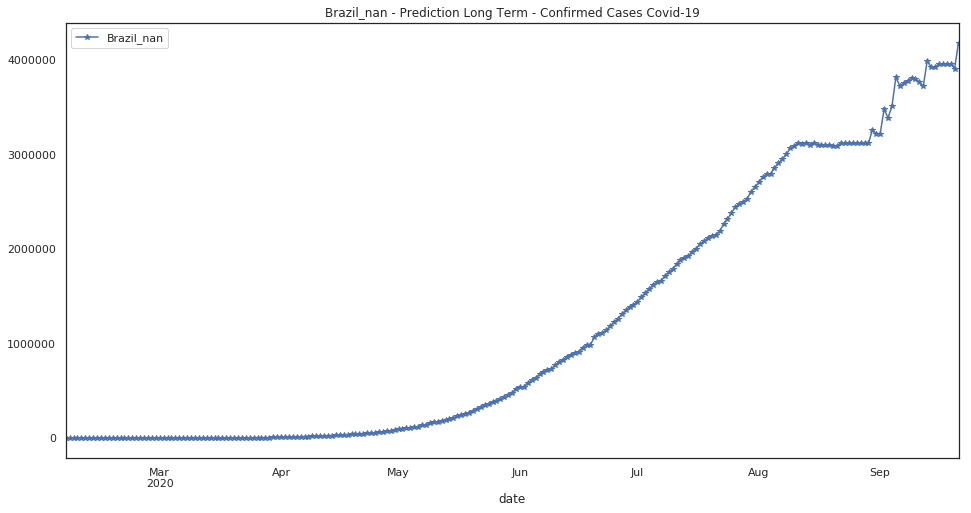

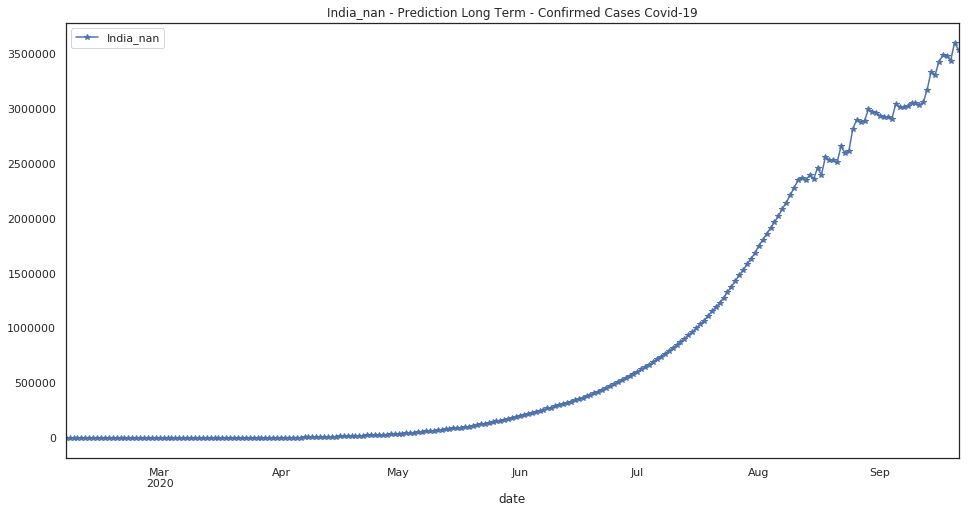

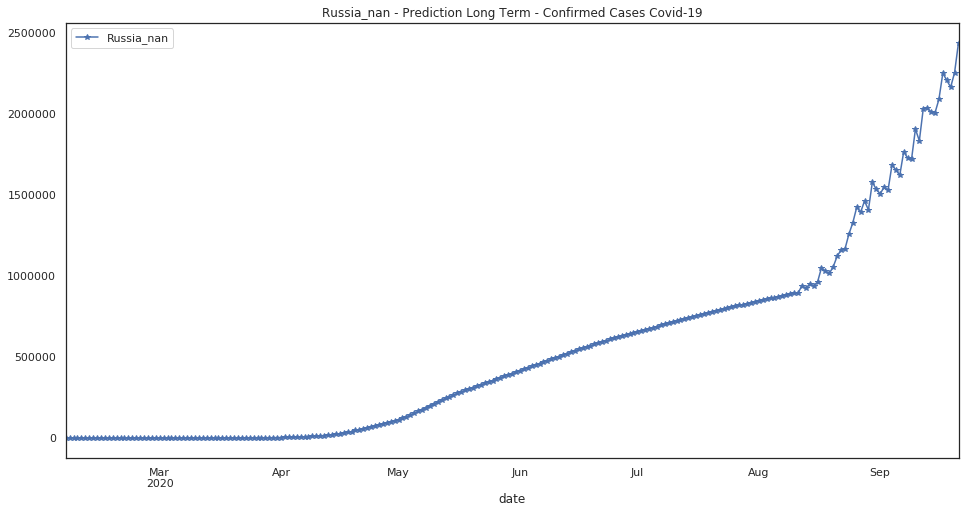

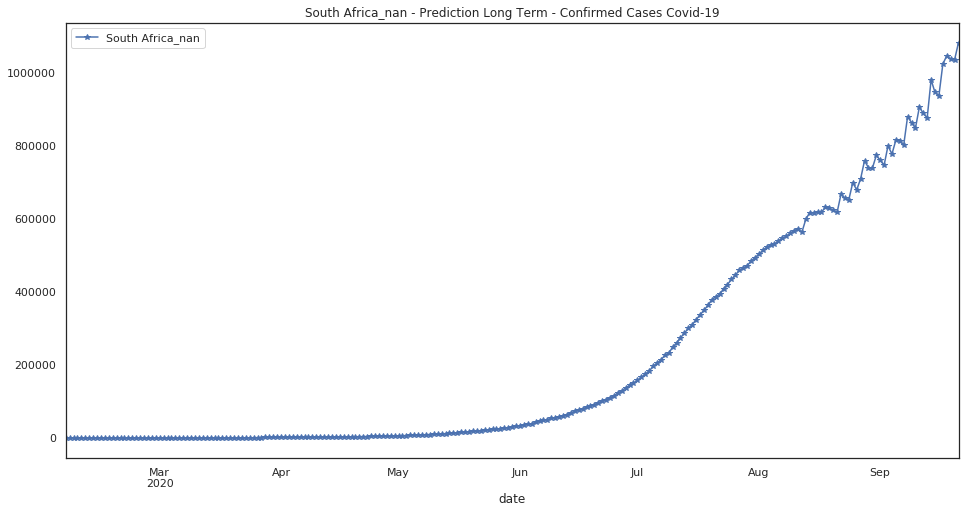

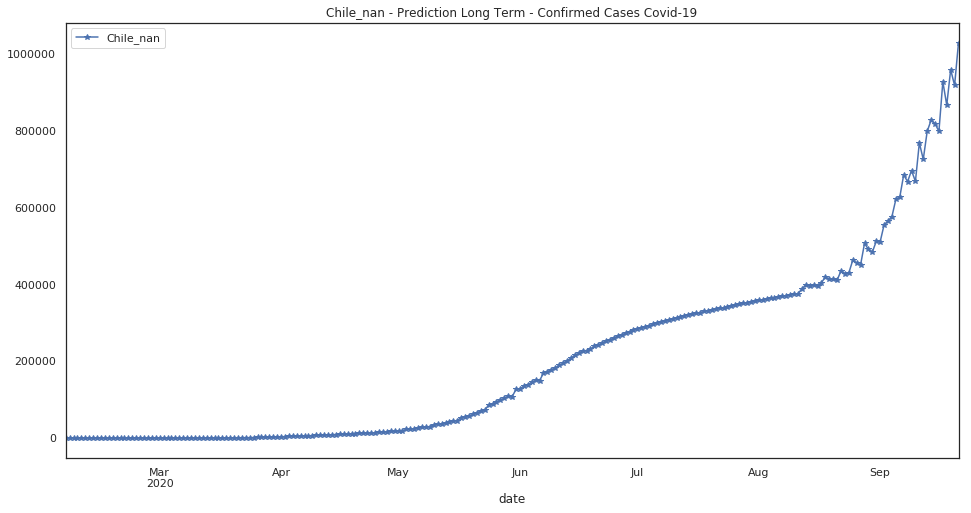

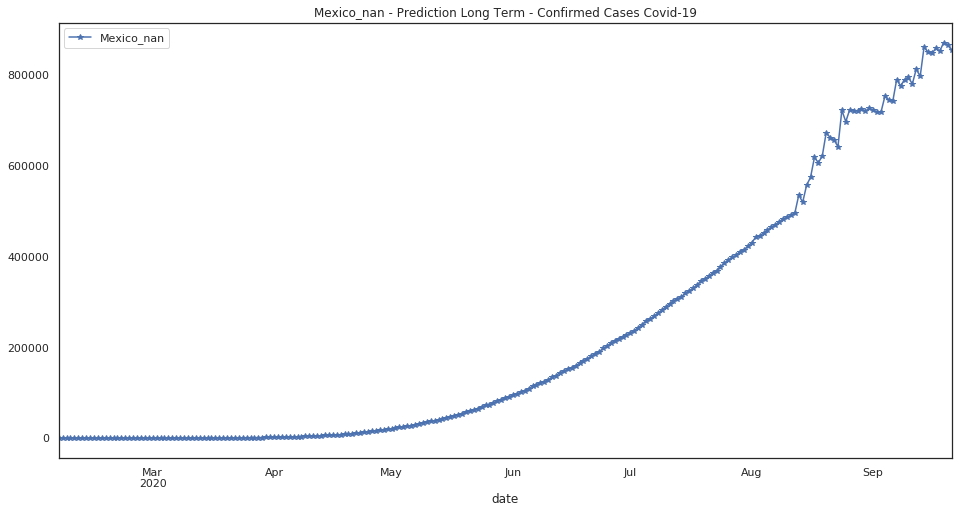

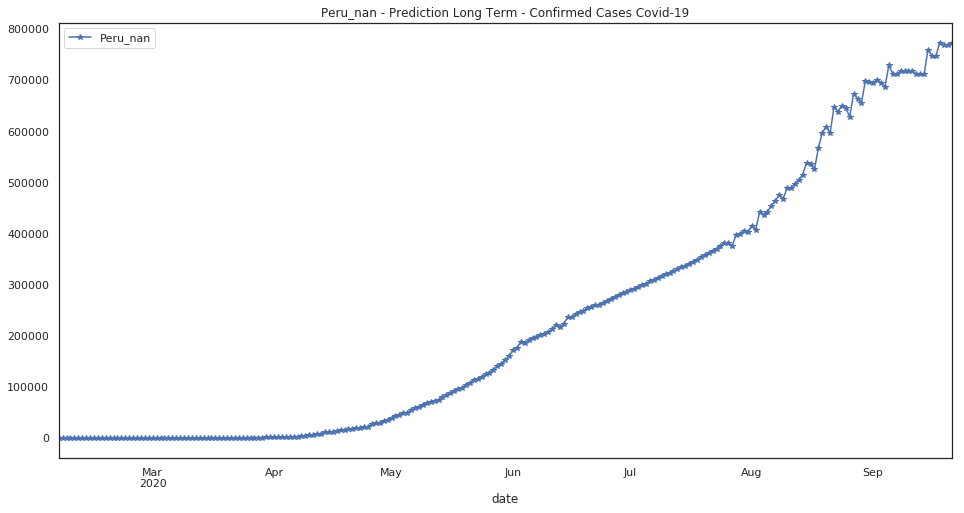

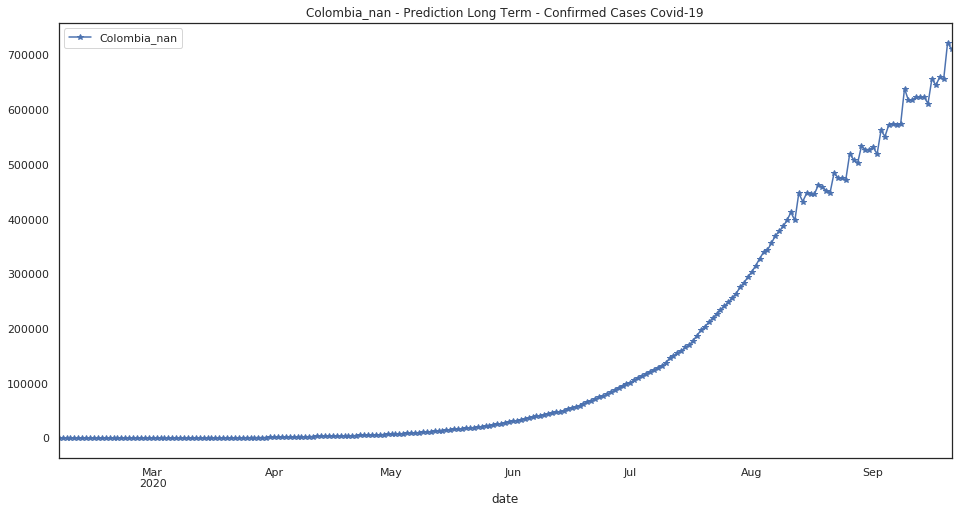

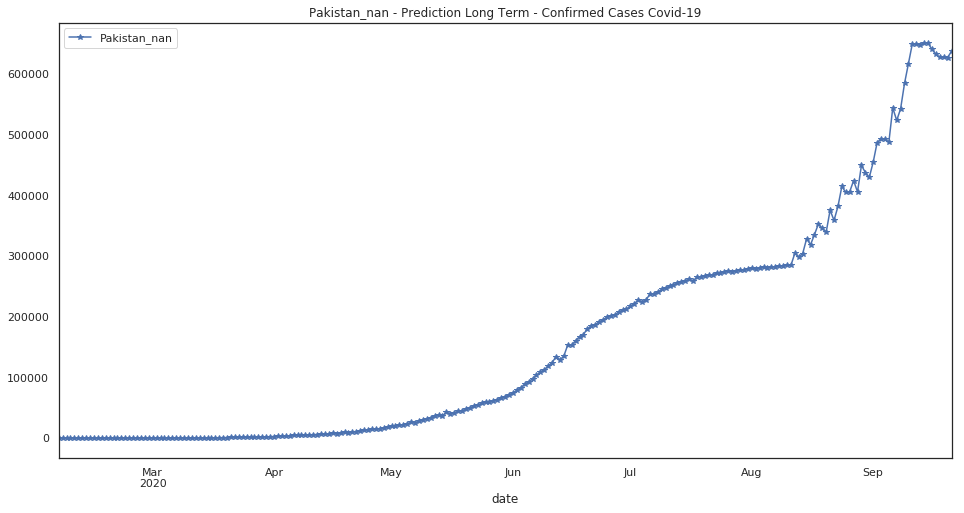

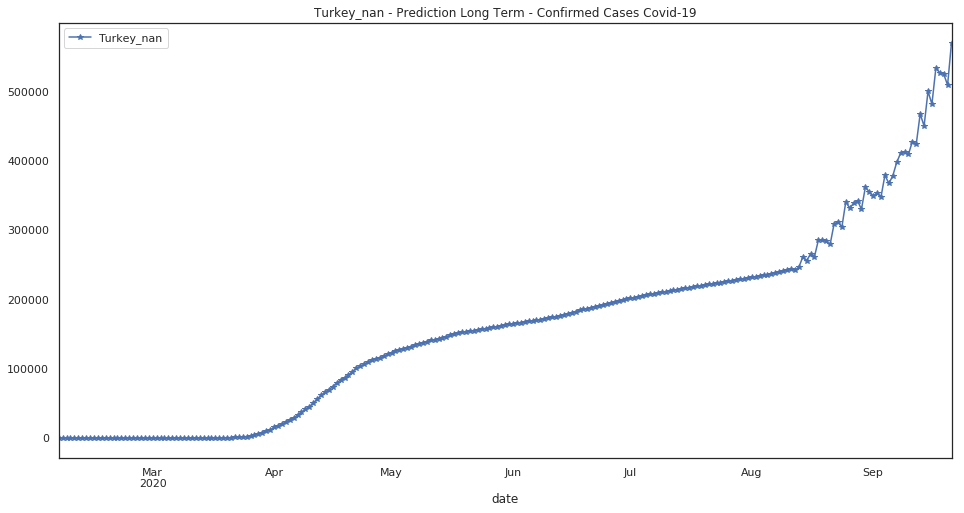

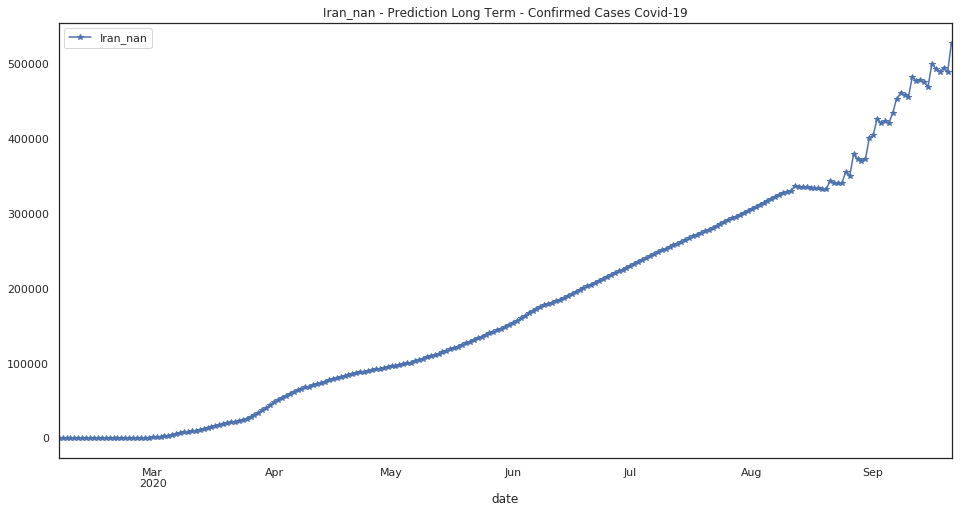

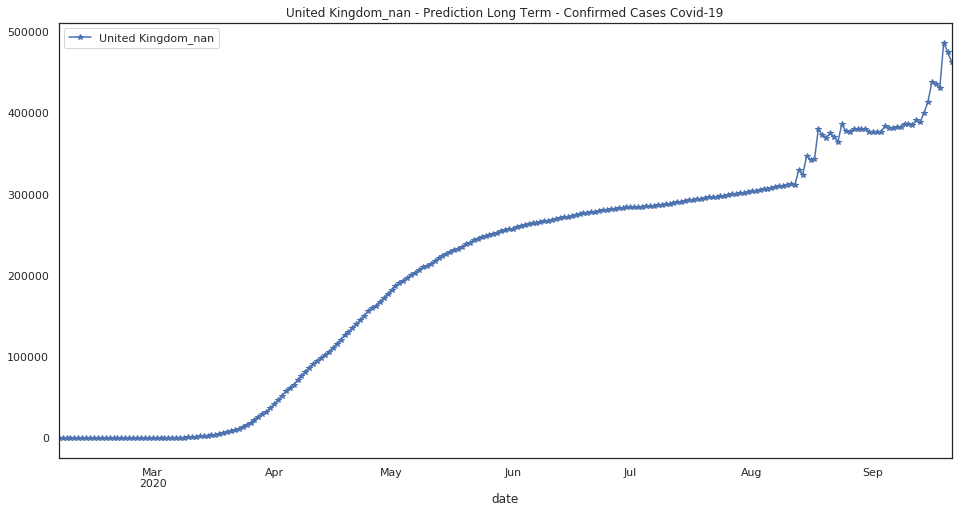

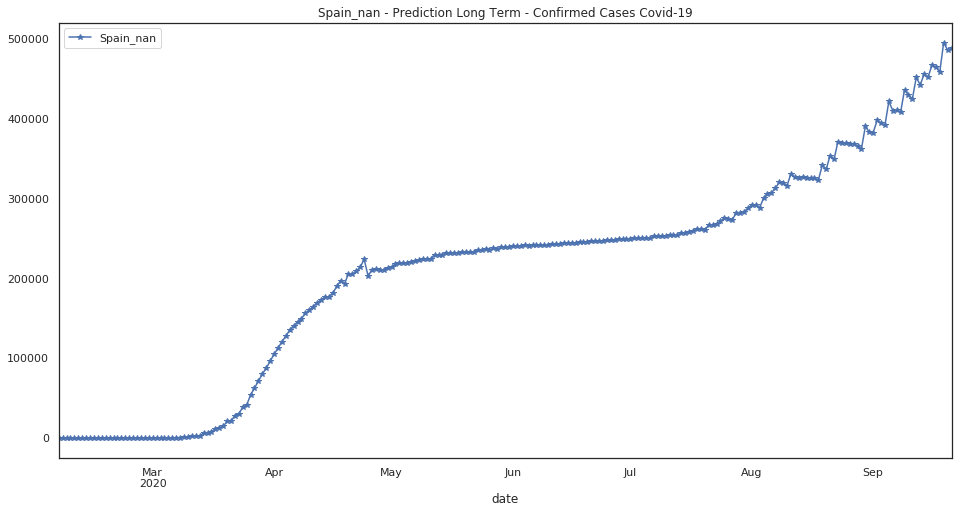

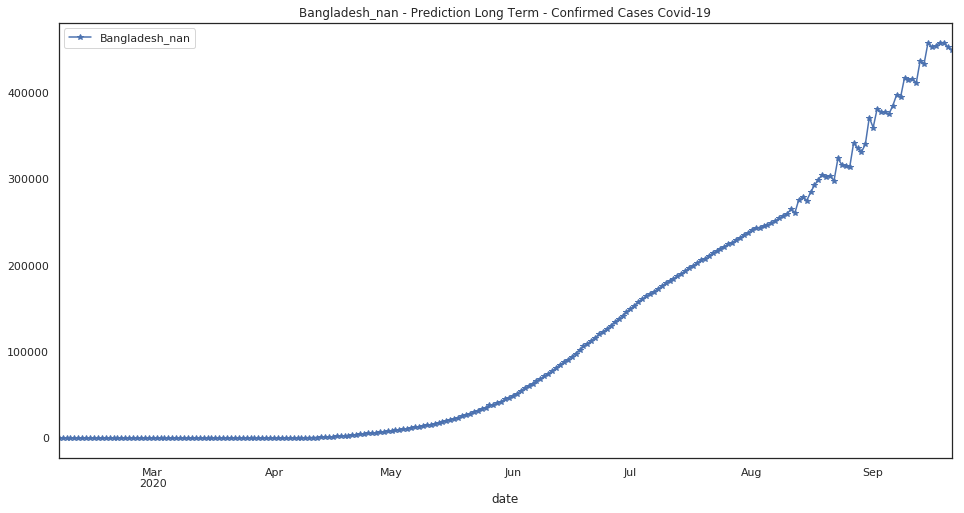

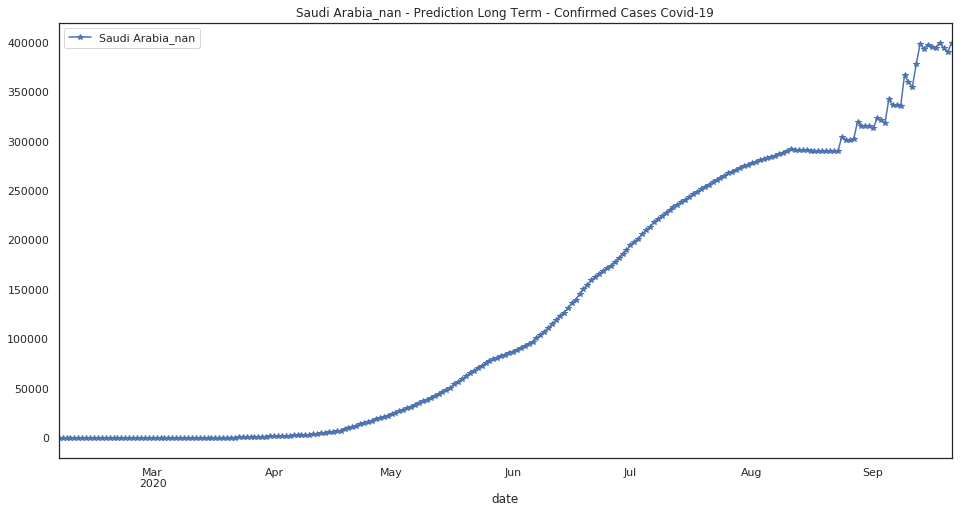

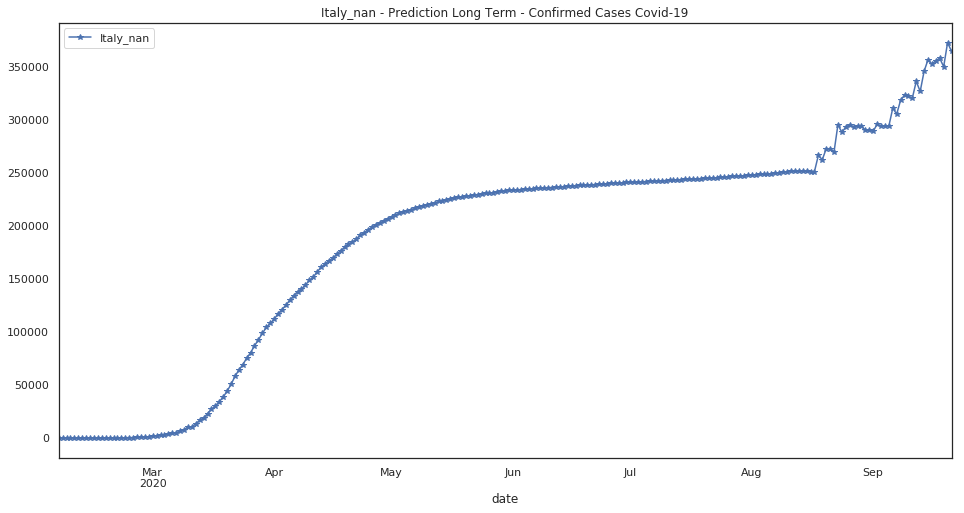

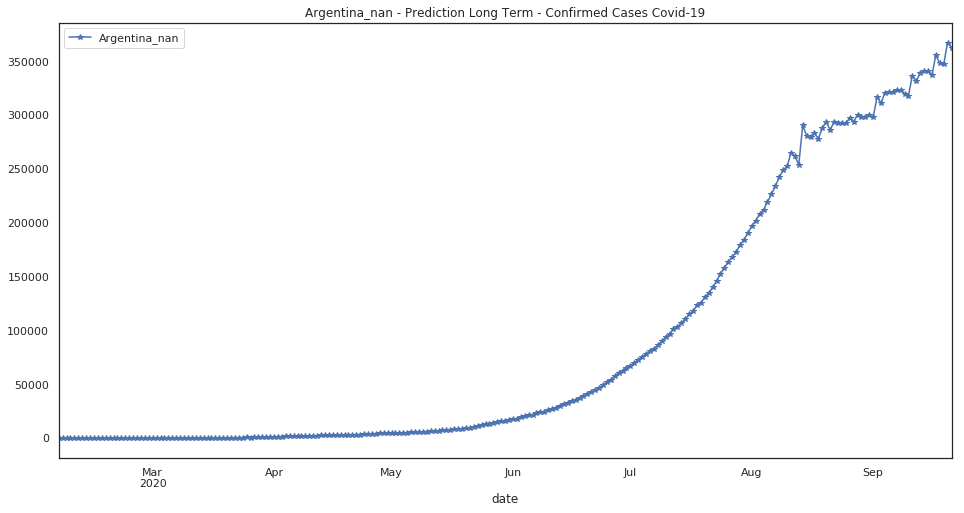

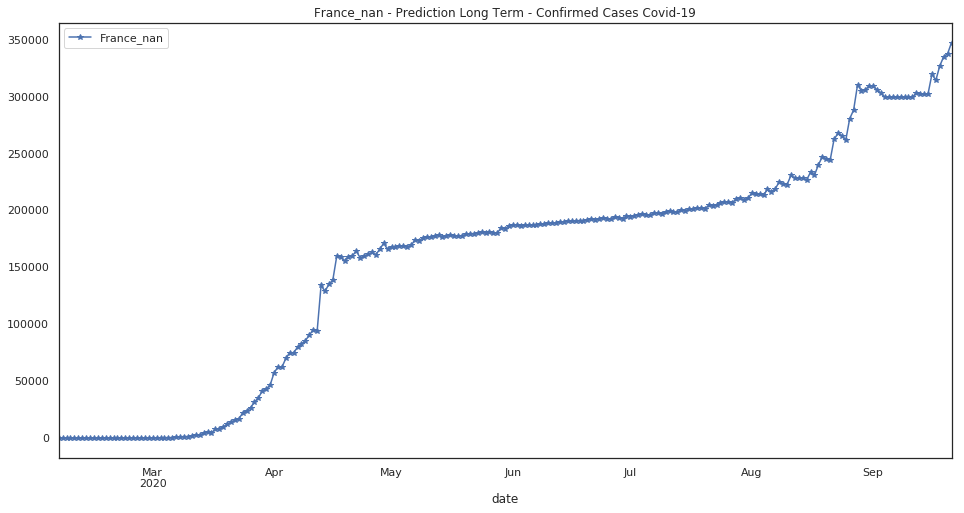

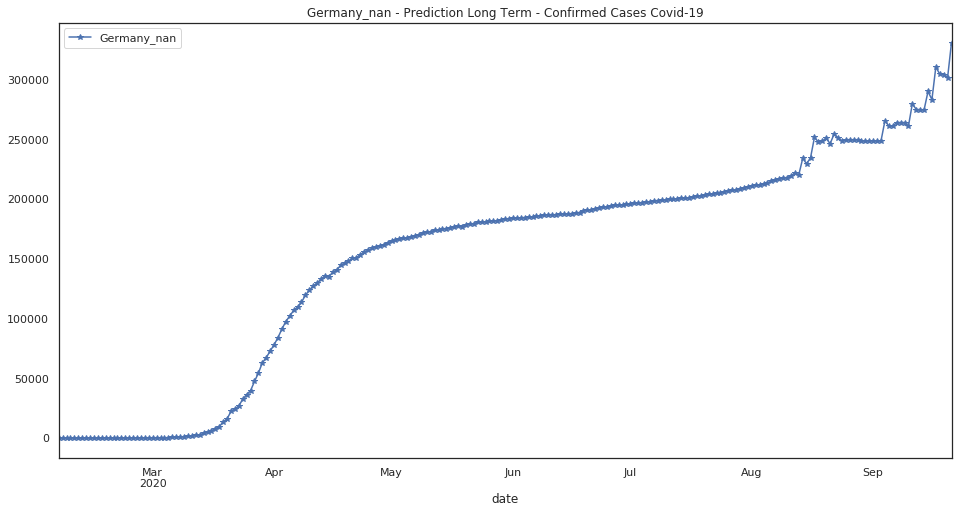

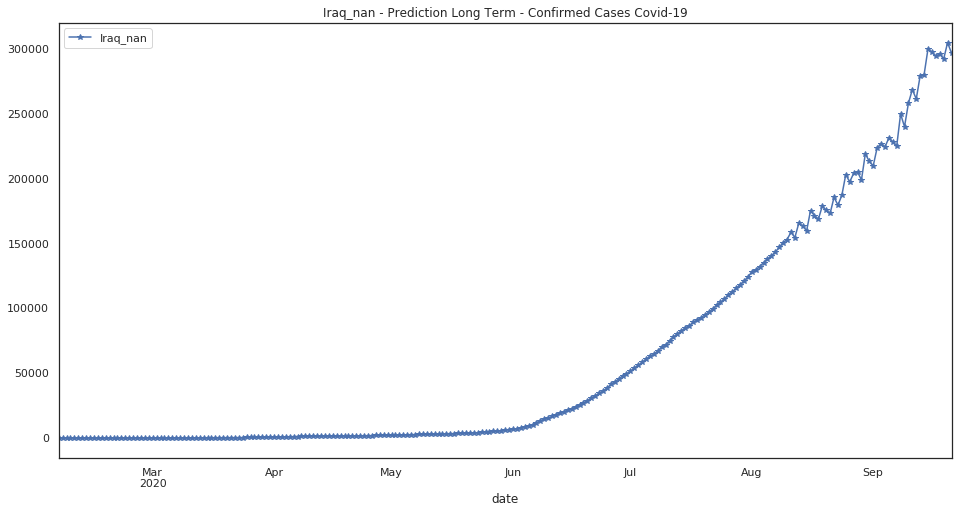

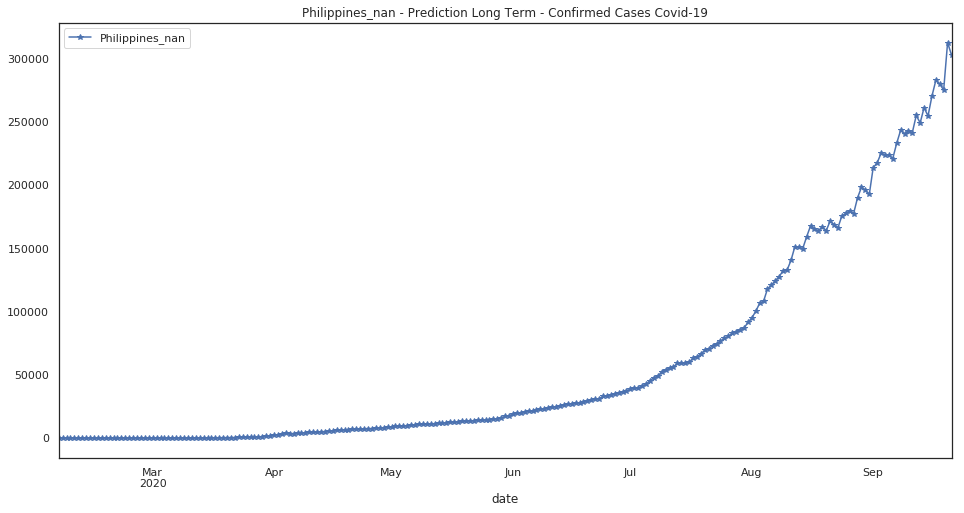

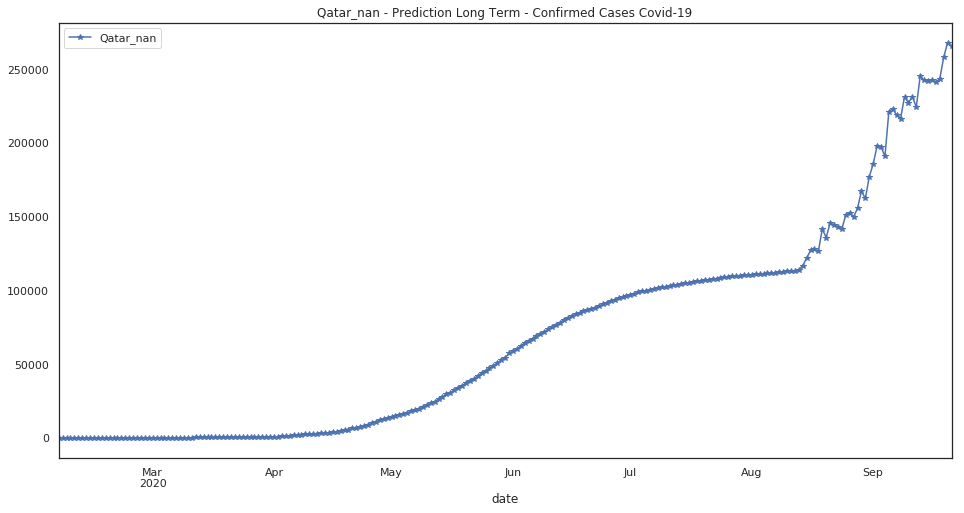

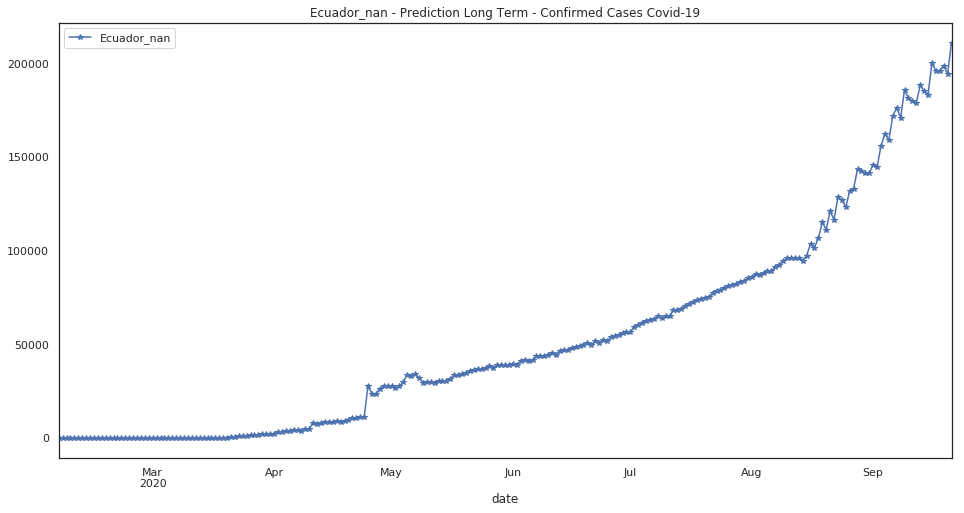

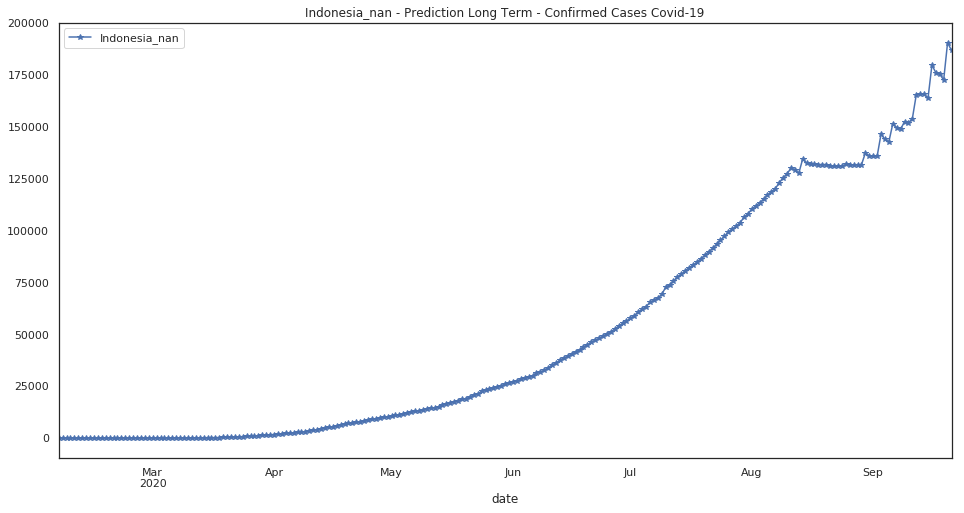

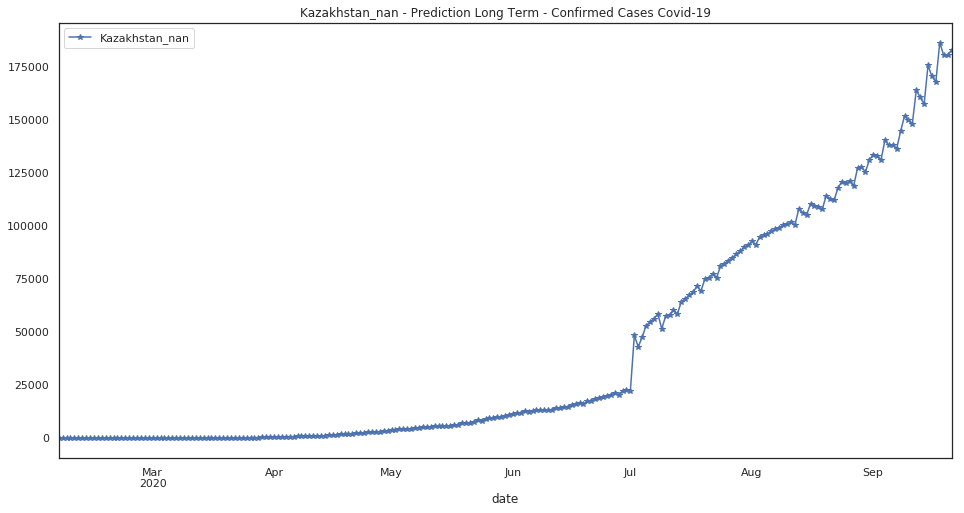

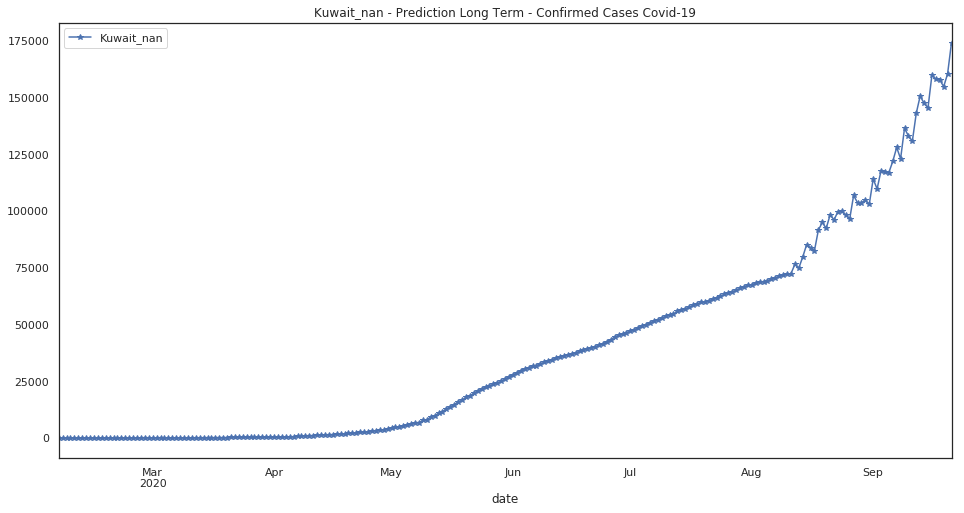

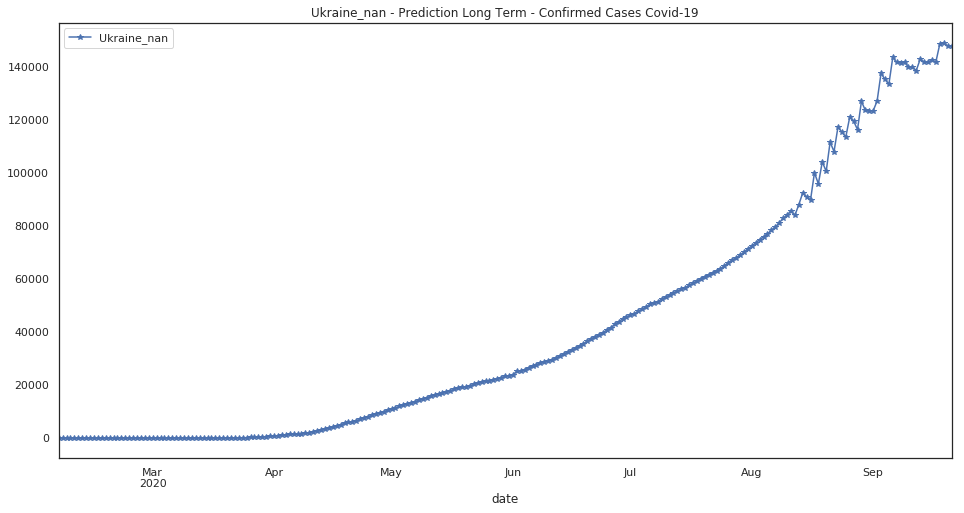

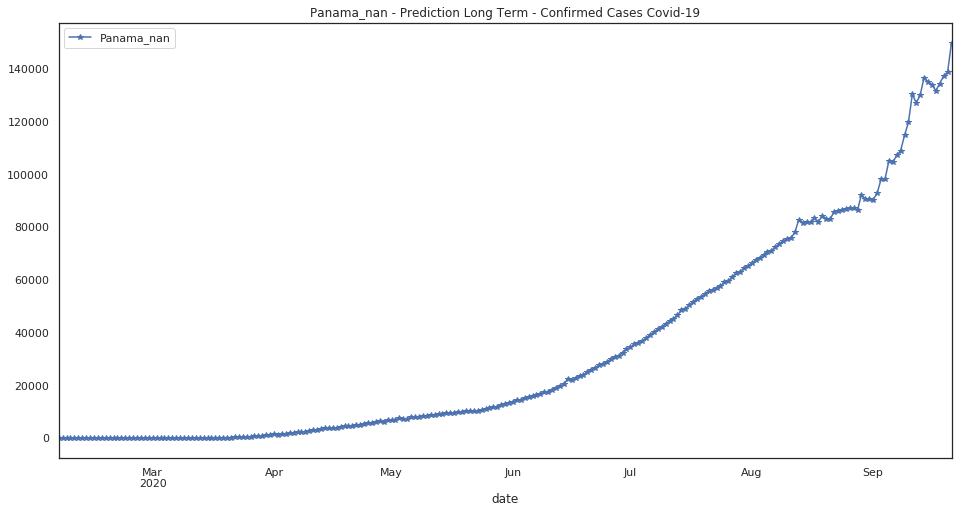

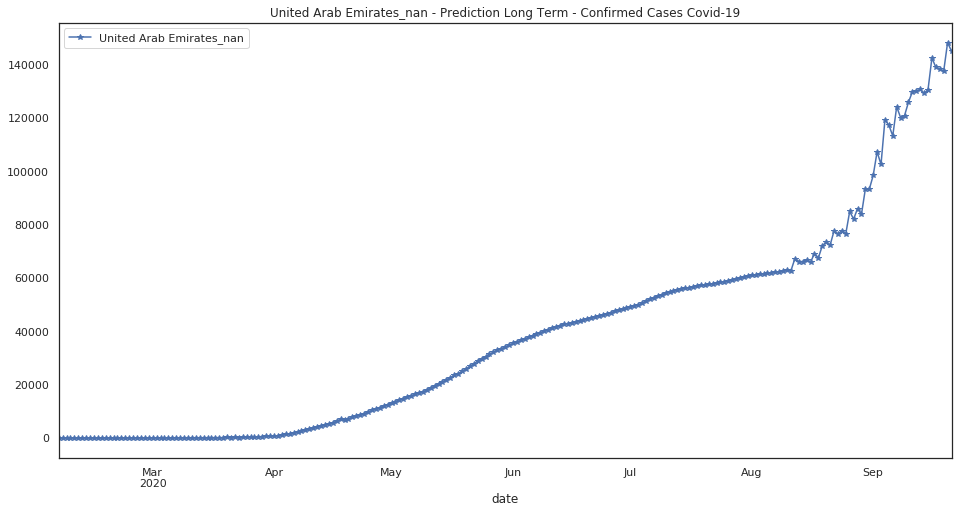

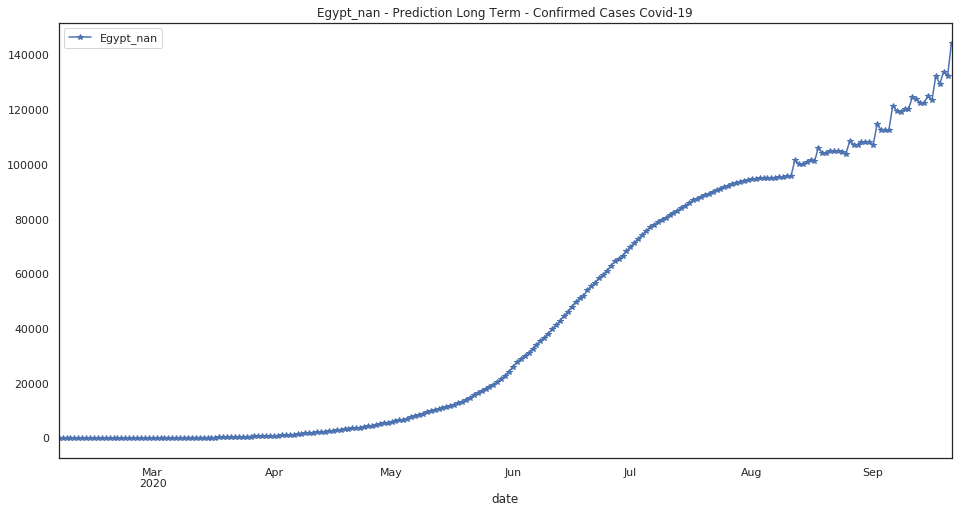

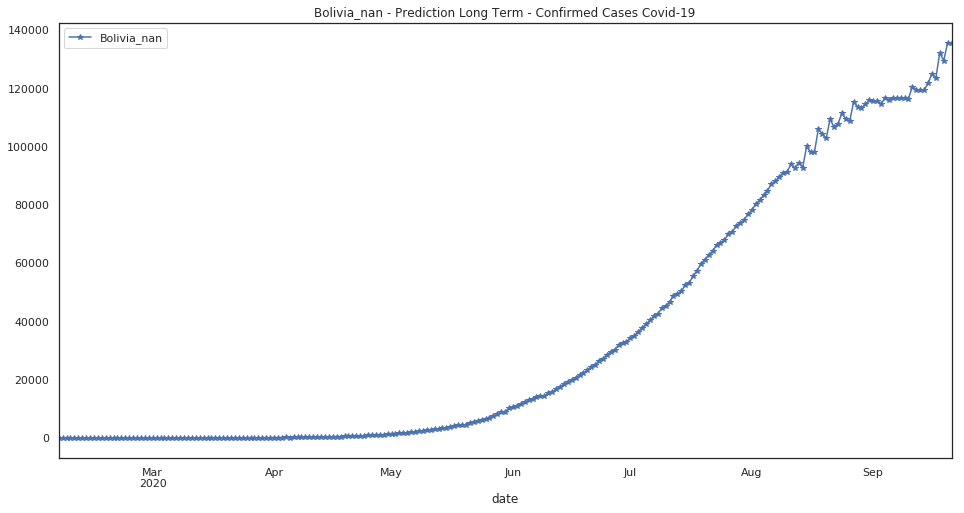

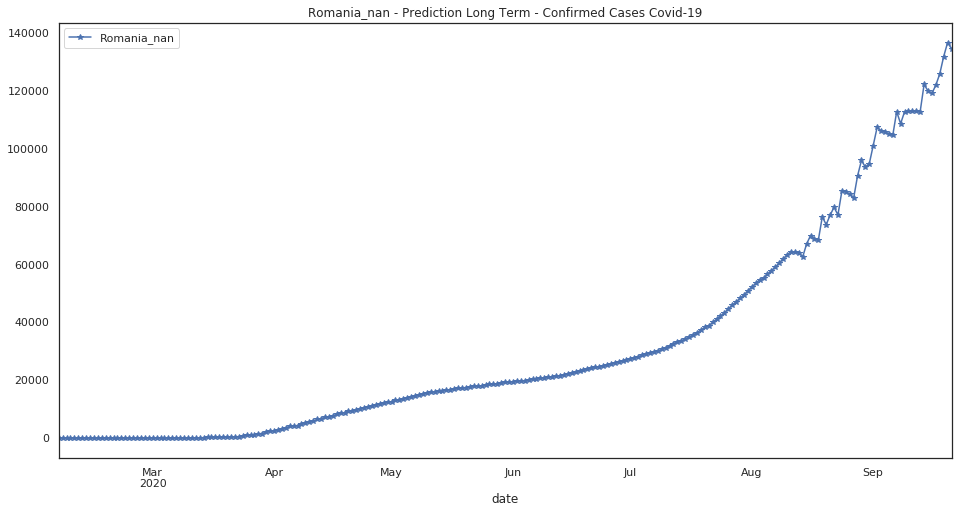

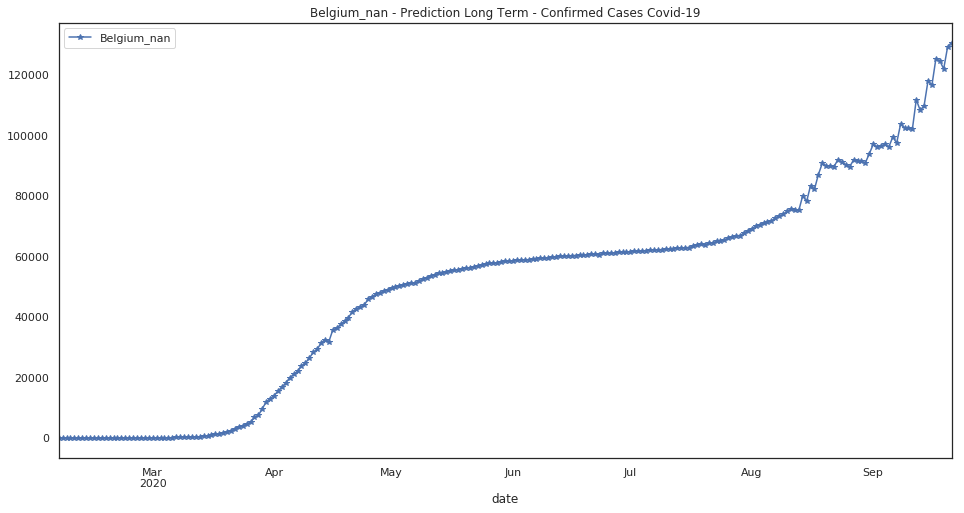

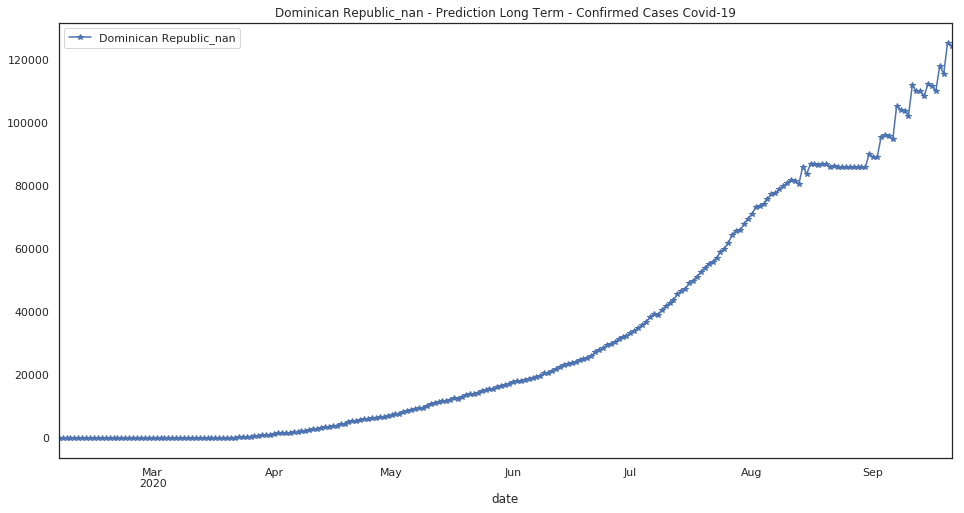

In [76]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

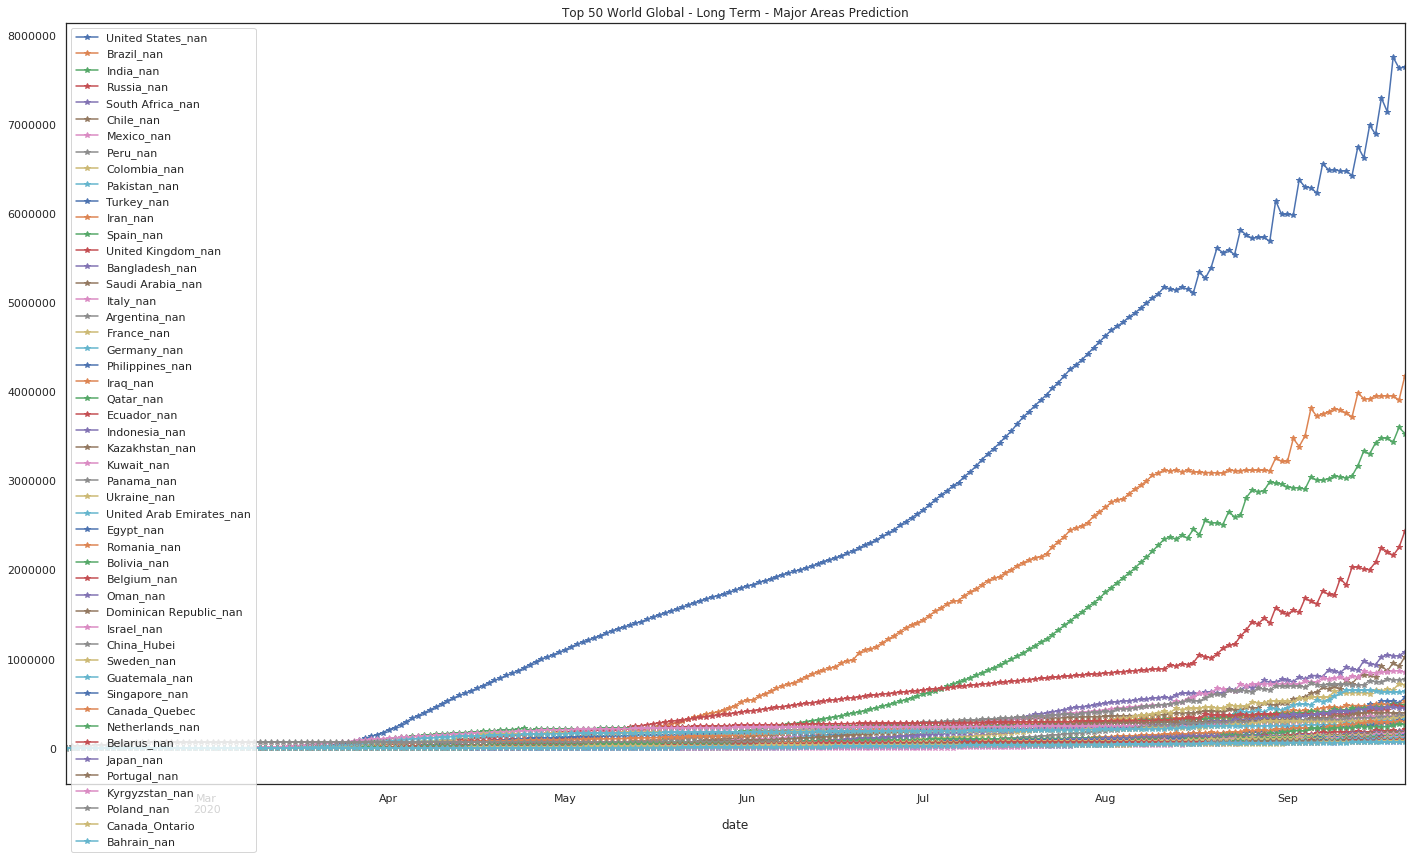

In [77]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

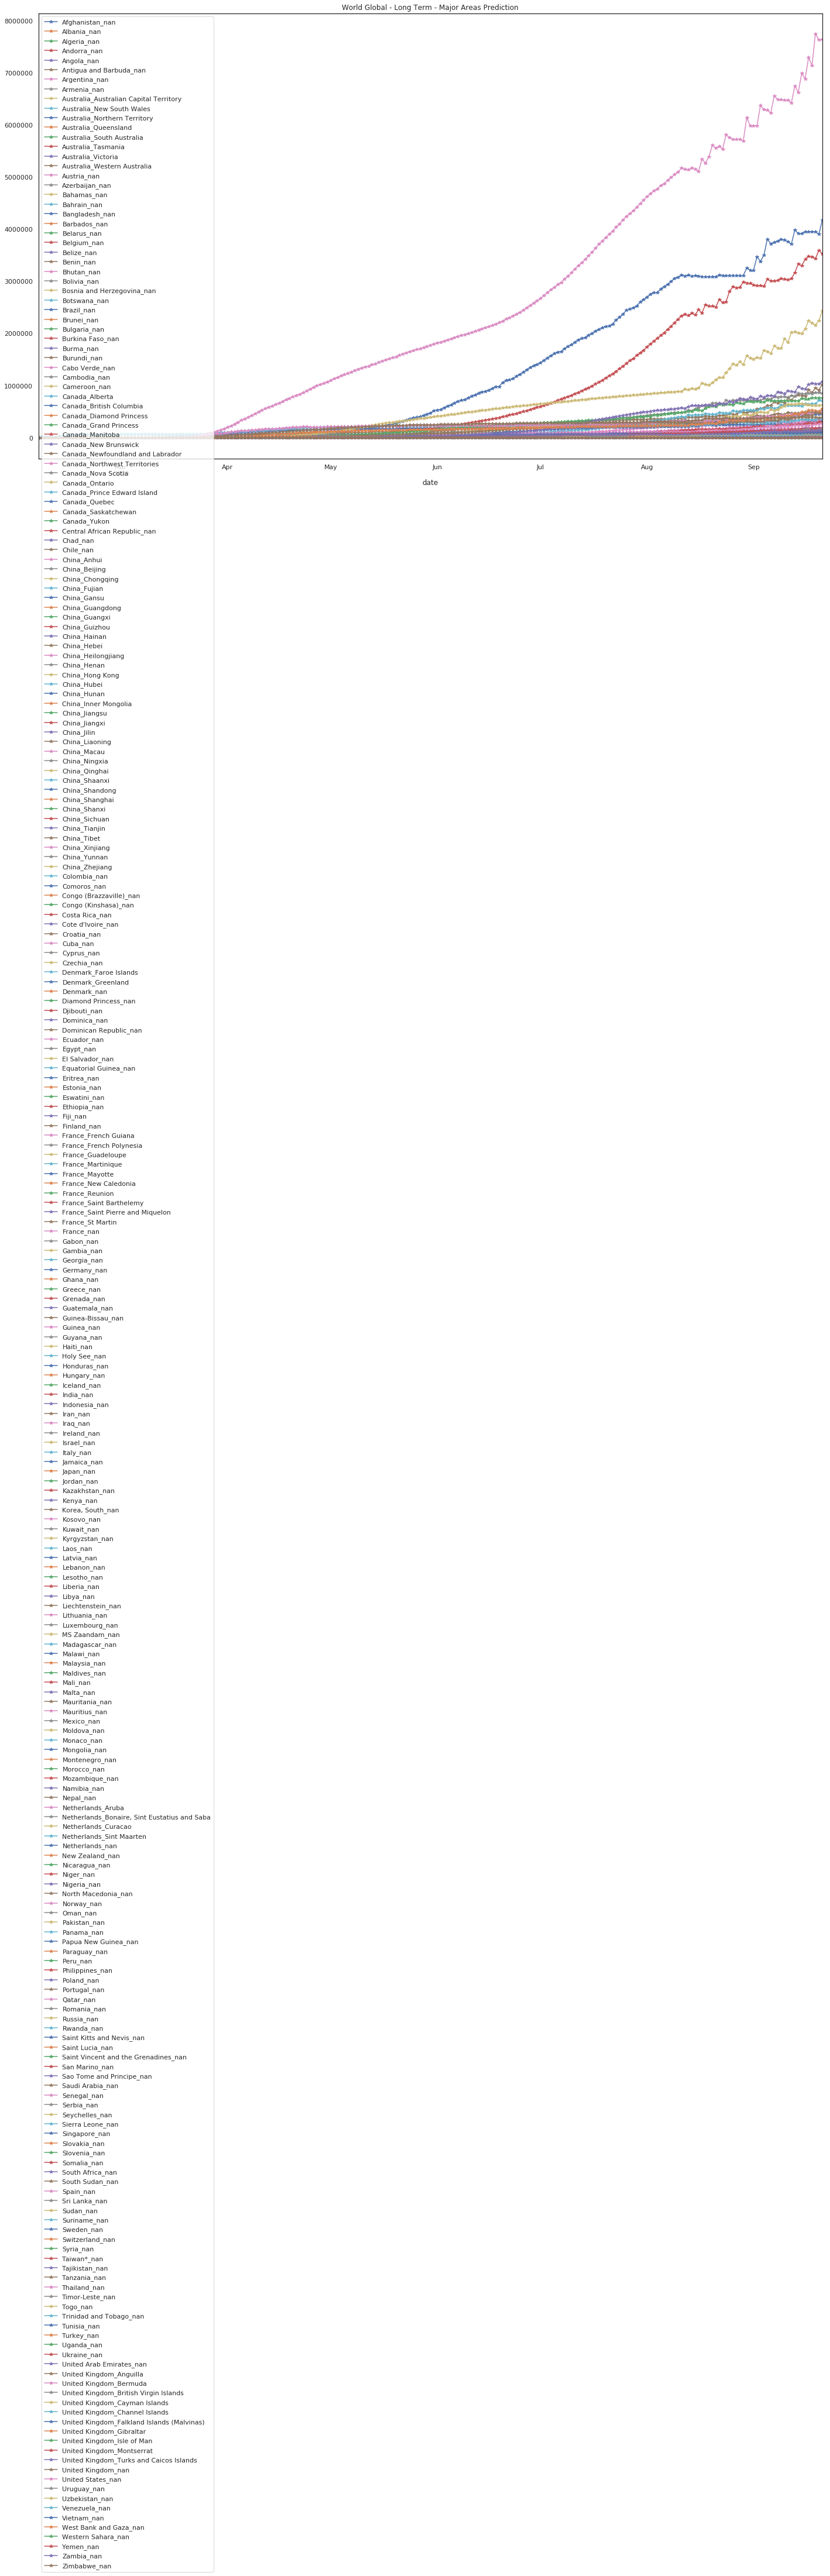

In [78]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [79]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [80]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-03-22             40.0         84.0        171.0        191.0   
2020-03-23             64.0         98.0        259.0        252.0   
2020-03-24             47.0        112.0        278.0        219.0   
2020-03-25            102.0        132.0        321.0        181.0   
2020-03-26            113.0        157.0        359.0        204.0   
2020-03-27            122.0        197.0        450.0        240.0   
2020-03-28            154.0        208.0        493.0        287.0   
2020-03-29            147.0        221.0        529.0        336.0   
2020-03-30            138.0        242.0        582.0        354.0   
2020-03-31            228.0        246.0        638.0        411.0   
2020-04-01            181.0        269.0        798.0        404.0   
2020-04-02            278.0        280.0        933.0        409.0   
2020-04-03            329.0        290.0       1058.0        466.0   
2020-04-04            320.0        322.0       1335.0        449.0   
2020-04-05            341.0        354.0       1405.0        470.0   
2020-04-06            425.0        388.0       1474.0        515.0   
2020-04-07            403.0        409.0       1644.0        529.0   
2020-04-08            494.0        408.0       1625.0        553.0   
2020-04-09            489.0        435.0       1739.0        576.0   
2020-04-10            533.0        441.0       1819.0        591.0   
2020-04-11            583.0        437.0       1893.0        618.0   
2020-04-12            609.0        456.0       1939.0        601.0   
2020-04-13            662.0        459.0       2053.0        650.0   
2020-04-14            732.0        487.0       2104.0        646.0   
2020-04-15            763.0        488.0       2202.0        659.0   
2020-04-16            856.0        507.0       2281.0        676.0   
2020-04-17            907.0        538.0       2370.0        673.0   
2020-04-18            999.0        564.0       2551.0        696.0   
2020-04-19           1004.0        567.0       2673.0        704.0   
2020-04-20           1096.0        581.0       2769.0        713.0   
...                     ...          ...          ...          ...   
2020-08-23          43210.0       7902.0      42449.0       1133.0   
2020-08-24          42990.0       8572.0      43722.0       1178.0   
2020-08-25          42896.0       8735.0      43763.0       1178.0   
2020-08-26          45812.0       8556.0      43923.0       1238.0   
2020-08-27          46098.0       8538.0      43962.0       1238.0   
2020-08-28          47810.0       8826.0      43079.0       1283.0   
2020-08-29          47338.0       9479.0      46262.0       1356.0   
2020-08-30          47530.0       9564.0      44964.0       1424.0   
2020-08-31          47788.0      10394.0      47282.0       1449.0   
2020-09-01          47789.0      10296.0      47157.0       1449.0   
2020-09-02          46718.0      10072.0      47072.0       1449.0   
2020-09-03          49042.0      11641.0      47419.0       1533.0   
2020-09-04          48190.0      11194.0      47421.0       1614.0   
2020-09-05          48256.0      11373.0      46908.0       1674.0   
2020-09-06          48616.0      11074.0      46909.0       1749.0   
2020-09-07          51999.0      12606.0      46412.0       1780.0   
2020-09-08          50769.0      12226.0      49853.0       1892.0   
2020-09-09          52825.0      12479.0      48813.0       1865.0   
2020-09-10          52561.0      12350.0      51684.0       1992.0   
2020-09-11          52347.0      13437.0      52210.0       1960.0   
2020-09-12          52638.0      14053.0      55194.0       1960.0   
2020-09-13          55455.0      13920.0      53642.0       2150.0   
2020-09-14          54024.0      13609.0      60897.0       2114.0   
2020-09-15          57495.0      14623.0      59228.0       2178.0   
2020-09-16

In [81]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [82]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [83]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [84]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.939110   67.709953   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -27.469800  153.025100   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -42.882100  147.327200   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.025885  -78.035889   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.469936   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
238                               Timor-Leste_nan  -8.874217  125.727539   
239                                    Belize_nan  17.189900  -88.497600   
240                                      Laos_nan  19.856270  102.495496   
241                                     Libya_nan  26.335100   17.228331   
242                        West Bank and Gaza_nan  31.952200   35.233200   
243                             Guinea-Bissau_nan  11.803700  -15.180400   
244                                      Mali_nan  17.570692   -3.996166   
245                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
246                  Canada_Northwest Territories  64.825500 -124.845700   
247                                  Canada_Yukon  64.282300 -135.000000   
248                                    Kosovo_nan  42.602636   20.902977   
249                                     Burma_nan  21.916200   95.956000   
250                       United Kingdom_Anguilla  18.220600  -63.068600   
251         United Kingdom_British Virgin Islands  18.420700  -64.640000   
252       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
253                                MS Zaandam_nan   0.000000    0.000000   
254                                  Botswana_nan -22.328500   24.684900   
255                                   Burundi_nan  -3.373100   29.918900   
256                              Sierra Leone_nan   8.460555  -11.779889   
257  Netherlands_Bonaire, Sint Eustatius and Saba  12.178400  -68.238500   
258                                    Malawi_nan -13.254300   34.301500   
259    United K

In [85]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' 1DayChangePred='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [86]:
# Top 50 Regions in the World impacted
region_m2=region[:50]
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      17            Azerbaijan_nan  40.143100   47.576900   
2      20            Bangladesh_nan  23.685000   90.356300   
3      22               Belarus_nan  53.709800   27.953400   
4      23               Belgium_nan  50.833300    4.469936   
5      26               Bolivia_nan -16.290200  -63.588700   
6      28                Brazil_nan -14.235000  -51.925300   
7      42            Canada_Ontario  51.253800  -85.323200   
8      44             Canada_Quebec  52.939900  -73.549100   
9      48                 Chile_nan -35.675100  -71.543000   
10     62               China_Hubei  30.975600  112.270700   
11     82              Colombia_nan   4.570900  -74.297300   
12     96    Dominican Republic_nan  18.735700  -70.162700   
13     97               Ecuador_nan  -1.831200  -78.183400   
14     98                 Egypt_nan  26.820553   30.802498   
15    116                France_nan  46.227600    2.213700   
16    121               Germany_nan  51.165691   10.451526   
17    124             Guatemala_nan  15.783500  -90.230800   
18    132                 India_nan  20.593684   78.962880   
19    133             Indonesia_nan  -0.789300  113.921300   
20    134                  Iran_nan  32.427908   53.688046   
21    135                  Iraq_nan  33.223191   43.679291   
22    137                Israel_nan  31.046051   34.851612   
23    138                 Italy_nan  41.871940   12.567380   
24    140                 Japan_nan  36.204824  138.252924   
25    142            Kazakhstan_nan  48.019600   66.923700   
26    145                Kuwait_nan  29.311660   47.481766   
27    146            Kyrgyzstan_nan  41.204380   74.766098   
28    160                Mexico_nan  23.634500 -102.552800   
29    171           Netherlands_nan  52.132600    5.291300   
30    178                  Oman_nan  21.512583   55.923255   
31    179              Pakistan_nan  30.375300   69.345100   
32    180                Panama_nan   8.538000  -80.782100   
33    183                  Peru_nan  -9.190000  -75.015200   
34    184           Philippines_nan  12.879721  121.774017   
35    185                Poland_nan  51.919400   19.145100   
36    186              Portugal_nan  39.399900   -8.224500   
37    187                 Qatar_nan  25.354800   51.183900   
38    188               Romania_nan  45.943200   24.966800   
39    189                Russia_nan  61.524010  105.318756   
40    194          Saudi Arabia_nan  23.885942   45.079162   
41    198             Singapore_nan   1.283300  103.833300   
42    202          South Africa_nan -30.559500   22.937500   
43    203                 Spain_nan  40.463667   -3.749220   
44    207                Sweden_nan  60.128161   18.643501   
45    215                Turkey_nan  38.963700   35.243300   
46    217               Ukraine_nan  48.379400   31.165600   
47    218  United Arab Emirates_nan  23.424076   53.847818   
48    225        United Kingdom_nan  55.378100   -3.436000   
49    227         United States_nan  40.000000 -100.000000   

    2020-02-06 00:00:00  2020-02-07 00:00:00  2020-02-08 00:00:00  \
0                  11.0                 11.0                 11.0   
1                  11.0                 11.0                 11.0   
2                  11.0                 11.0                 11.0   
3                  11.0                 11.0                 11.0   
4                  16.0                 17.0                 10.0   
5                  11.0                 11.0                 11.0   
6                  11.0                 11.0                 11.0   
7                   6.0                  4.0                  3.0   
8                  11.0                 11.0                 11.0   
9                  11.0                 11.0                 11.0   
10             -10374.0              22112.0              24953.0   
11           

In [87]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' 1DayChangePred='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [88]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [89]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [90]:
exit()